In [1]:
# -*- coding: utf-8 -*-
# 
#----------------------------------------------------------
# script name:
#----------------------------------------------------------
# creator: zhidong.lu
# create date: 2019-05-30
# update date: 2021-01-01
# version: 1.0
#----------------------------------------------------------
# 
# 
#----------------------------------------------------------
import os
import re
import sys
import csv
import json
import time
import pytz
import datetime
strptime = datetime.datetime.strptime
strftime = datetime.datetime.strftime
from dateutil.relativedelta import relativedelta
from dateutil import rrule

from collections import OrderedDict
from itertools import product
import pickle

import gc
import multiprocessing

import math
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import random

pd.pandas.set_option("display.max_columns", 100)
pd.pandas.set_option("display.max_rows", 300)

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import plot_tree
from sklearn.ensemble import GradientBoostingClassifier

# pd.set_option('max_colwidth', 200)
# pd.set_option('display.max_rows', 40)
# pd.set_option('display.max_columns', None)

import tensorflow as tf
import tensorflow.keras as keras
# import tensorflow.experimental.numpy as tnp
import tensorflow_probability as tfp

import lifelines
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from lifelines import CoxTimeVaryingFitter

# import multiprocessing as mp

# import h5py

inf = np.inf


In [2]:
plt.style.use({"figure.figsize": [s0*1 for s0 in (5, 3)]})
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

sns.set(
    style="whitegrid",
    rc={"figure.figsize": [s0*1 for s0 in (5, 3)]},
    font="SimHei",
)

In [3]:
# package_path = r"D:\luzd"
# package_path = r"/Users/luzhidong/Desktop"
package_path = r"C:\Users\luzhidong-alienware\Desktop"
# package_path = r"/tf/luzd"
os.chdir(package_path)

from ModelingToolkit.LogisticModel import *
from ModelingToolkit.FeatureEngineering import *
from ModelingToolkit.BoostrapSampling import *
from ModelingToolkit.TensorProcessing import *


In [4]:
# import pyodbc
# hive_conn = pyodbc.connect("DSN=hive")
# hive_cursor = hive_conn.cursor()


In [5]:
# 启用 / 禁用 GPU
_gpus = tf.config.list_physical_devices('GPU')
# 设置显存自增长
_ = [tf.config.experimental.set_memory_growth(s0, True) for s0 in _gpus]
print(_gpus)
print()

tf.config.set_visible_devices(
#     devices=[],
    devices=tf.config.list_physical_devices('GPU'),
    device_type="GPU",
#     device_type="CPU",
)

print(tf.config.get_visible_devices())
print(len(tf.config.get_visible_devices("GPU")))
print()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
1



In [35]:
# data_path = r"/Users/luzhidong/Desktop"
data_path = r"C:\Users\luzhidong-alienware\Desktop\vzoom_data"
# data_path = r"/tf/luzd"

with open(
        file=r"{}/data/df_lzd_gzl/df_lzd_gzl_sample_202108.pkl".format(data_path),
        mode="rb",
    ) as fr:
    df_lzd_gzl_sample_202108 = pickle.load(fr)

with open(
        file=r"{}/data/df_lzd_gzl/df_lzd_gzl_202108_zb_m_sbse_zzs.pkl".format(data_path),
        mode="rb",
    ) as fr:
    df_lzd_gzl_202108_zb_m_sbse_zzs = pickle.load(fr)

with open(
        file=r"{}/data/df_lzd_gzl/df_lzd_gzl_202108_zb_m_zsse_zzs.pkl".format(data_path),
        mode="rb",
    ) as fr:
    df_lzd_gzl_202108_zb_m_zsse_zzs = pickle.load(fr)

with open(
        file=r"{}/data/df_lzd_gzl/df_lzd_gzl_202108_zb_m_sbse_qysds.pkl".format(data_path),
        mode="rb",
    ) as fr:
    df_lzd_gzl_202108_zb_m_sbse_qysds = pickle.load(fr)

with open(
        file=r"{}/data/df_lzd_gzl/df_lzd_gzl_202108_zb_m_zsse_qysds.pkl".format(data_path),
        mode="rb",
    ) as fr:
    df_lzd_gzl_202108_zb_m_zsse_qysds = pickle.load(fr)

with open(
        file=r"{}/data/df_lzd_gzl/df_lzd_gzl_202108_zb_m_zcfzb.pkl".format(data_path),
        mode="rb",
    ) as fr:
    df_lzd_gzl_202108_zb_m_zcfzb = pickle.load(fr)

with open(
        file=r"{}/data/df_lzd_gzl/df_lzd_gzl_202108_zb_m_lrb.pkl".format(data_path),
        mode="rb",
    ) as fr:
    df_lzd_gzl_202108_zb_m_lrb = pickle.load(fr)

with open(
        file=r"{}/data/df_lzd_gzl/df_lzd_gzl_202108_zb_v_jcxx.pkl".format(data_path),
        mode="rb",
    ) as fr:
    df_lzd_gzl_202108_zb_v_jcxx = pickle.load(fr)

with open(
        file=r"{}/data/df_lzd_gzl/df_lzd_gzl_202108_zb_v_sbzs.pkl".format(data_path),
        mode="rb",
    ) as fr:
    df_lzd_gzl_202108_zb_v_sbzs = pickle.load(fr)

with open(
        file=r"{}/data/df_lzd_gzl/df_lzd_gzl_202108_zb_v_hgxx.pkl".format(data_path),
        mode="rb",
    ) as fr:
    df_lzd_gzl_202108_zb_v_hgxx = pickle.load(fr)

with open(
        file=r"{}/data/df_lzd_gzl/df_lzd_gzl_202108_zb_v_xxbg.pkl".format(data_path),
        mode="rb",
    ) as fr:
    df_lzd_gzl_202108_zb_v_xxbg = pickle.load(fr)

with open(
        file=r"{}/data/df_lzd_gzl/df_lzd_gzl_202108_zb_v_cw.pkl".format(data_path),
        mode="rb",
    ) as fr:
    df_lzd_gzl_202108_zb_v_cw = pickle.load(fr)

with open(
        file=r"{}/data/df_lzd_gzl/df_lzd_gzl_202108_zb_v_cw_chk.pkl".format(data_path),
        mode="rb",
    ) as fr:
    df_lzd_gzl_202108_zb_v_cw_chk = pickle.load(fr)


df_lzd_gzl_202108_zb_v_jcxx["observation_dt"] = df_lzd_gzl_202108_zb_v_jcxx["observation_dt"].apply(lambda s0: strftime(s0, "%Y-%m-%d"))
df_lzd_gzl_202108_zb_v_hgxx["observation_dt"] = df_lzd_gzl_202108_zb_v_hgxx["observation_dt"].apply(lambda s0: strftime(s0, "%Y-%m-%d"))
df_lzd_gzl_202108_zb_v_xxbg["observation_dt"] = df_lzd_gzl_202108_zb_v_xxbg["observation_dt"].apply(lambda s0: strftime(s0, "%Y-%m-%d"))
df_lzd_gzl_202108_zb_v_cw["observation_dt"] = df_lzd_gzl_202108_zb_v_cw["observation_dt"].apply(lambda s0: strftime(s0, "%Y-%m-%d"))

df_lzd_gzl_202108_zb_m_sbse_qysds["observation_dt"] = df_lzd_gzl_202108_zb_m_sbse_qysds["observation_dt"].apply(lambda s0: strftime(s0, "%Y-%m-%d"))
df_lzd_gzl_202108_zb_m_zsse_qysds["observation_dt"] = df_lzd_gzl_202108_zb_m_zsse_qysds["observation_dt"].apply(lambda s0: strftime(s0, "%Y-%m-%d"))
df_lzd_gzl_202108_zb_m_zcfzb["observation_dt"] = df_lzd_gzl_202108_zb_m_zcfzb["observation_dt"].apply(lambda s0: strftime(s0, "%Y-%m-%d"))
df_lzd_gzl_202108_zb_m_lrb["observation_dt"] = df_lzd_gzl_202108_zb_m_lrb["observation_dt"].apply(lambda s0: strftime(s0, "%Y-%m-%d"))

# df_lzd_gzl_202108_zb_v_jcxx["jcxx_nsr_types"] = df_lzd_gzl_202108_zb_v_jcxx["jcxx_nsr_types"] \
#     .fillna("").apply(lambda s0: s0.replace(" ", ""))


In [36]:
# with open(
#         file=r"{}/data/df_lzd_zbv5_sc_jcxx/df_lzd_zbv5_sc_jcxx.pkl".format(data_path),
#         mode="rb",
#     ) as fr:
#     df_lzd_zbv5_sc_jcxx = pickle.load(fr)

# with open(
#         file=r"{}/data/df_lzd_zbv5_sc_jcxx/df_lzd_zbv5_sc_jcxx_nsrsbh.pkl".format(data_path),
#         mode="rb",
#     ) as fr:
#     df_lzd_zbv5_sc_jcxx_nsrsbh = pickle.load(fr)



In [ ]:
_cols_jcxx_ohe = [
    "jcxx_nsr_status", "jcxx_nsr_types", "jcxx_industry_class",
    "jcxx_tax_credit_rating", "jcxx_tax_auth_prov",
]
enc = OneHotEncoder(
    sparse=False,
)
enc = enc.fit(
    X=df_lzd_gzl_202108_zb_v_jcxx[_cols_jcxx_ohe].fillna("MISSING"),
)



#     .merge(
#         right=df_lzd_gzl_202108_zb_m_sbse_zzs[
#             ["nsrsbh", "observation_dt"]+
#             [
#                 s0
#                 for s0 in df_lzd_gzl_202108_zb_m_sbse_zzs.columns.tolist()
#                 if re.search("(_amount_mon_sum)", s0)!=None
#             ]+
# #             [
# #                 s0
# #                 for s0 in df_lzd_gzl_202108_zb_m_sbse_zzs.columns.tolist()
# #                 if re.search("(_zzs_ovd_days)", s0)!=None
# #             ]+
#             []
#         ],
#         how="left", left_on=["nsrsbh", "observation_dt"], right_on=["nsrsbh", "observation_dt"],
#     ) \

df_wb = df_lzd_gzl_sample_202108[[
#         "nsrsbh", "observation_dt", "y", "bank_name",
        "nsrsbh", "observation_dt", "y",
    ]] \
    .merge(
        right=df_lzd_gzl_202108_zb_v_jcxx[[
                    "nsrsbh", "observation_dt",
                    "jcxx_reg_capital", "jcxx_emp_cnt", "jcxx_opening_months", "jcxx_fr_age",
                    "tzf_shareholder_cnt", "tzf_shareholding_hhi",
#                 ]] \
                ]], \
#                 .merge(
#                     right=pd.DataFrame(
#                         data=enc.transform(
#                             X=df_lzd_gzl_202108_zb_v_jcxx[[
#                                 "jcxx_nsr_status", "jcxx_nsr_types", "jcxx_industry_class",
#                                 "jcxx_tax_credit_rating", "jcxx_tax_auth_prov",
#                             ]].fillna("MISSING"),
#                         ),
#                         columns=enc.get_feature_names(input_features=_cols_jcxx_ohe),
#                     ),
#                     how="left", left_index=True, right_index=True,
#                 ),
#         right=df_lzd_gzl_202108_zb_v_jcxx,
        how="left", left_on=["nsrsbh", "observation_dt"], right_on=["nsrsbh", "observation_dt"],
    ) \
    .merge(
        right=df_lzd_gzl_202108_zb_v_hgxx,
        how="left", left_on=["nsrsbh", "observation_dt"], right_on=["nsrsbh", "observation_dt"],
    ) \
    .merge(
        right=df_lzd_gzl_202108_zb_v_xxbg,
        how="left", left_on=["nsrsbh", "observation_dt"], right_on=["nsrsbh", "observation_dt"],
    ) \
    .merge(
        right=df_lzd_gzl_202108_zb_m_sbse_zzs[
            [
                s0
                for s0 in df_lzd_gzl_202108_zb_m_sbse_zzs.columns.tolist()
                if re.search("_sssq[qz]_", s0)==None
            ]
        ],
        how="left", left_on=["nsrsbh", "observation_dt"], right_on=["nsrsbh", "observation_dt"],
    ) \
    .merge(
        right=df_lzd_gzl_202108_zb_m_sbse_qysds[
            [
                s0
                for s0 in df_lzd_gzl_202108_zb_m_sbse_qysds.columns.tolist()
                if re.search("_sssq[qz]_", s0)==None
            ]
        ],
        how="left", left_on=["nsrsbh", "observation_dt"], right_on=["nsrsbh", "observation_dt"],
    ) \
    .merge(
        right=df_lzd_gzl_202108_zb_m_zsse_zzs[
            [
                s0
                for s0 in df_lzd_gzl_202108_zb_m_zsse_zzs.columns.tolist()
                if re.search("_sssq[qz]_", s0)==None
            ]
        ],
        how="left", left_on=["nsrsbh", "observation_dt"], right_on=["nsrsbh", "observation_dt"],
    ) \
    .merge(
        right=df_lzd_gzl_202108_zb_m_zsse_qysds[
            [
                s0
                for s0 in df_lzd_gzl_202108_zb_m_zsse_qysds.columns.tolist()
                if re.search("_sssq[qz]_", s0)==None
            ]
        ],
        how="left", left_on=["nsrsbh", "observation_dt"], right_on=["nsrsbh", "observation_dt"],
    ) \
    .merge(
        right=df_lzd_gzl_202108_zb_v_sbzs[
            [
                s0
                for s0 in df_lzd_gzl_202108_zb_v_sbzs.columns.tolist()
                if re.search("_sssqz_max", s0)==None
            ]
        ],
        how="left", left_on=["nsrsbh", "observation_dt"], right_on=["nsrsbh", "observation_dt"],
    ) \
    .merge(
        right=df_lzd_gzl_202108_zb_v_cw[
            [
                s0
                for s0 in df_lzd_gzl_202108_zb_v_cw.columns.tolist()
                if re.search("_sssqz_max", s0)==None
            ]
        ],
        how="left", left_on=["nsrsbh", "observation_dt"], right_on=["nsrsbh", "observation_dt"],
    ) \
    .merge(
        right=df_lzd_gzl_202108_zb_v_cw_chk,
        how="left", left_on=["nsrsbh", "observation_dt"], right_on=["nsrsbh", "observation_dt"],
    ) \
    .reset_index(drop=True)

# df_wb["chk_cwbb_score_bin"] = func_binning_continuous_v1(
#     in_data=df_wb["chk_cwbb_score"],
# #     bins=[-inf, 500, 600, 700, 750, 800, inf],
#     bins=[-inf, 500, 550, 600, 650, 700, 750, 800, inf],
#     right_border=True, include_lowest=True,
# )




In [ ]:
df_wb["flag"] = df_wb["y"]
df_wb["target_label"] = df_wb["y"].apply(lambda s0: ("1_bad" if s0==1 else "0_good"))


############################################################
_cols_base = [
    "nsrsbh", "observation_dt", "y", "flag", "target_label",
#     "chk_cwbb_score_bin",
]

# _cols_v = [s0 for s0 in df_wb.columns if s0 not in _cols_base]

# _cols_v = [
#     "sb_12m_zzs_qbxse_growth_rate_yoy",
#     "sb_06m_zzs_qbxse_growth_rate_mom_avg",
#     "sb_12mvs24m_ynse_avg_ratio",
#     "zs_12m_zzs_tbr",
#     "zs_24m_zzs_adv_cv",
#     "sb_lately_non_zero_months",
#     "zs_12m_zzs_ge03_adv_cnt",
#     "zs_24m_zzs_ge01_ovd_cnt",
#     "cw_debt_to_asset_ratio",
#     "cw_receivables_turnover",
# ]

# np.random.seed(9999)
# _cols_v = np.random.choice(
#     [s0 for s0 in df_wb.columns if s0 not in _cols_base],
#     size=200, replace=False,
# ).tolist()

_cols_v = [s0 for s0 in df_wb.columns if s0 not in _cols_base]

df_wb = df_wb[
        _cols_base+_cols_v
    ] \
    .reset_index(drop=True)


In [46]:
#################################################################################
df_wb_dev, df_wb_oot = train_test_split(
    df_wb,
    train_size=0.8,
    random_state=12345678,
    shuffle=True,
)

#################################################################################
df_wb_train, df_wb_test = train_test_split(
    df_wb_dev,
    train_size=0.7,
    random_state=12345678,
    shuffle=True,
)

df_wb_dev = df_wb_dev.reset_index(drop=True)
df_wb_train = df_wb_train.reset_index(drop=True)
df_wb_test = df_wb_test.reset_index(drop=True)
df_wb_oot = df_wb_oot.reset_index(drop=True)


#################################################################################
print("dev: ", df_wb_dev.shape[0], df_wb_dev.query("flag==1").shape[0], dict(df_wb_dev["flag"].value_counts(dropna=False, normalize=True)))
print("train: ", df_wb_train.shape[0], df_wb_train.query("flag==1").shape[0], dict(df_wb_train["flag"].value_counts(dropna=False, normalize=True)))
print("test: ", df_wb_test.shape[0], df_wb_test.query("flag==1").shape[0], dict(df_wb_test["flag"].value_counts(dropna=False, normalize=True)))
print("oot: ", df_wb_oot.shape[0], df_wb_oot.query("flag==1").shape[0], dict(df_wb_oot["flag"].value_counts(dropna=False, normalize=True)))


dev:  39512 2178 {0.0: 0.9448775055679287, 1.0: 0.05512249443207127}
train:  27658 1545 {0.0: 0.9441391279195893, 1.0: 0.05586087208041073}
test:  11854 633 {0.0: 0.9466003036949553, 1.0: 0.05339969630504471}
oot:  9879 526 {0.0: 0.9467557445085535, 1.0: 0.053244255491446506}


In [47]:
df_wb_train[_cols_v].sample(10)

jcxx_reg_capital  jcxx_emp_cnt  jcxx_opening_months  jcxx_fr_age  \
20919         3000000.0           3.0                 43.0          NaN   
19432         8000000.0          15.0                 29.0          NaN   
19443        10000000.0           0.0                 26.0          NaN   
5025                0.0           0.0                 26.0          NaN   
25091         6180000.0          12.0                 60.0          NaN   
15045         2000000.0           0.0                 25.0          NaN   
21693         1000000.0           2.0                 28.0          NaN   
21321        10000000.0           7.0                 14.0          NaN   
24289         2000000.0          10.0                192.0          NaN   
10712         1680000.0          10.0                 57.0          NaN   

       tzf_shareholder_cnt  tzf_shareholding_hhi  wfwz_last_months  \
20919                  1.0                1.0000               NaN   
19432                  2.0                0.5000               NaN   
19443                  2.0                0.5002               NaN   
5025                   NaN                   NaN              22.0   
25091                  2.0                0.5648               NaN   
15045                  2.0                0.6800               NaN   
21693                  1.0                1.0000               NaN   
21321                  NaN                   NaN               NaN   
24289                  NaN                   NaN              32.0   
10712                  2.0                0.5800               NaN   

       wfwz_01m_cnt  wfwz_02m_cnt  wfwz_03m_cnt  wfwz_06m_cnt  wfwz_09m_cnt  \
20919             0             0             0             0             0   
19432             0             0             0             0             0   
19443             0             0             0             0             0   
5025              0             0             0             0             0   
25091             0             0             0             0             0   
15045             0             0             0             0             0   
21693             0             0             0             0             0   
21321             0             0             0             0             0   
24289             0             0             0             0             0   
10712             0             0             0             0             0   

       wfwz_12m_cnt  wfwz_24m_cnt  wfwz_01m_non_severe_cnt  \
20919             0             0                        0   
19432             0             0                        0   
19443             0             0                        0   
5025              0             1                        0   
25091             0             0                        0   
15045             0             0                        0   
21693             0             0                        0   
21321             0             0                        0   
24289             0             0                        0   
10712             0             0                        0   

       wfwz_02m_non_severe_cnt  wfwz_03m_non_severe_cnt  \
20919                        0                        0   
19432                        0                        0   
19443                        0                        0   
5025                         0                        0   
25091                        0                        0   
15045                        0                        0   
21693                        0                        0   
21321                        0                        0   
24289                        0                        0   
10712                        0                        0   

       wfwz_06m_non_severe_cnt  wfwz_09m_non_severe_cnt  \
20919                        0                        0   
19432                        0                        0   
19443                        0

# tensorflow

In [48]:
_df = pd.concat([
        df_wb_train.query("flag==0").sample(n=50000, replace=True, random_state=9999),
        df_wb_train.query("flag==1").sample(n=50000, replace=True, random_state=9999),
    ]) \
    .reset_index(drop=True)



_df_dev = df_wb_dev \
    .reset_index(drop=True)

# _df_dev = _df \
#     .reset_index(drop=True)



## layer_01_calc_percentile

In [49]:
###########################################################################
# with tf.device(device_name="/GPU:0"):
# with tf.device(device_name="/CPU:0"):

floating_point=1e-4
# random_seed = 123456789
random_seed = 12345678

_total_size = df_wb_dev.shape[0]
_batch_min_bad_cnt = 512
# _batch_min_bad_cnt = 256
# _batch_min_bad_cnt = 128
# _batch_min_bad_cnt = 64
_batch_cnt = df_wb_dev.query("y==1").shape[0]//_batch_min_bad_cnt
_batch_size = int(df_wb_dev.shape[0]/_batch_cnt)+1
# _batch_size = 100000

_dataset_dev = tf.data.Dataset.from_tensor_slices(
    tensors=(
        _df_dev[_cols_v].values,
        _df_dev["y"].values,
    )
) \
    .shuffle(buffer_size=_total_size, seed=random_seed) \
    .batch(batch_size=_batch_size)


In [69]:
########################################################################
layer_01_calc_percentile = TFLayer_boostrap_calc_percentile(
    q=[0.5, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 99, 99.5],
#     q=[0.5, 1, 5, 10, 25, 50, 75, 90, 95, 99, 99.5],
#     q=[1, 5, 10, 25, 50, 75, 90, 95, 99],
#     q=[10, 25, 50, 75, 90],
    trainable=False,
#     output_with_onehot_trans=True,
    output_with_onehot_trans=False,
    right_border=True,
    include_lowest=False,
    out_type="03_onehot_vector",
#     out_type="02_onehot_class",
#     out_type="01_info",
    alpha=0.05,
    lower_q=None,
    upper_q=None,
    result_lst_cnt=10000,
#     result_lst_cnt=None,
#     result_lst_cnt=0,
    dtype=tf.float64,
    with_update_result=True,
    with_calc_confidence_interval=True,
)

layer_01_calc_percentile.column_names = _cols_v


###########################################################################
# data_path = r"/Users/luzhidong/Desktop/data"
data_path = r"C:\Users\luzhidong-alienware\Desktop\vzoom_data"
# data_path = r"/tf/luzd"

# # # with open(file=r"{}/layer_01_calc_percentile.pkl".format(data_path), mode="wb") as fw:
# # with open(file=r"{}/layer_01_calc_percentile_100.pkl".format(data_path), mode="wb") as fw:
# #     pickle.dump(layer_01_calc_percentile, file=fw)
# # 
# # layer_01_calc_percentile.write_layer_info_data(file=r"{}/layer_01_calc_percentile_info_data_100.pkl".format(data_path))

# # with open(file=r"{}/layer_01_calc_percentile.pkl".format(data_path), mode="rb") as fr:
# with open(file=r"{}/layer_01_calc_percentile_100.pkl".format(data_path), mode="rb") as fr:
#     layer_01_calc_percentile = pickle.load(file=fr)

layer_01_calc_percentile.read_layer_info_data(
    file=r"{}/layer_01_calc_percentile_info_data_100.pkl".format(data_path),
)

In [73]:
# # i = 644
# i = 645
# print(layer_01_calc_percentile.column_names[i])
# print()
# print(layer_01_calc_percentile.cut_point[i])
# print()
# print(layer_01_calc_percentile.ci_lst[i])
# print()

In [63]:
# ###########################################################################
# _time_0 = time.time()

# # idx = 0
# idx = len(layer_01_calc_percentile.result_list_lst)

# # with tf.device(device_name="/GPU:0"):
# with tf.device(device_name="/CPU:0"):

#     for _epoch in range(100):
# #     for _epoch in range(400):
#     # for _epoch in range(500):

#     # for _epoch in range(1):
#     #     if _epoch%10==0:
#     #         print(_epoch)

#         print(_epoch, time.time()-_time_0)
#         for _tensor_X, _tensor_y in _dataset_dev.take(count=9999):
#             _tensor_X_onehot_vector_quantile = \
#                 layer_01_calc_percentile(
#                     inputs=_tensor_X,
#                 )
#     #         _tensor_tmp = \
#     #             layer_02_calc_woe(
#     #                 tensor_X_onehot_vector=_tensor_X_onehot_vector_quantile,
#     #                 tensor_y=_tensor_y,
#     #             )
#             idx = idx+1

#     print(idx, layer_01_calc_percentile.fit_count)
#     #     print(idx, layer_02_calc_woe.fit_count)


# _time = time.time()
# print()
# print(_time-_time_0)


In [186]:
# ###########################################################################
# with tf.device(device_name="/CPU:0"):

#     layer_01_calc_percentile.output_with_onehot_trans = True
#     layer_01_calc_percentile.out_type = "03_onehot_vector"
#     layer_01_calc_percentile.with_update_result = False

#     _X = []
#     for idx in range(len(layer_01_calc_percentile.column_names)):
#         # print(idx)
#         _X.append(
#             layer_01_calc_percentile(
#                 _df_dev[
#                     layer_01_calc_percentile.column_names[idx:idx+1]
#                 ].values
#             )
#         )


In [52]:
###########################################################################
# with tf.device(device_name="/GPU:0"):
with tf.device(device_name="/CPU:0"):

    floating_point=1e-4
    random_seed = 123456789
    # random_seed = 12345678

    _total_size = df_wb_dev.shape[0]
    _batch_min_bad_cnt = 512
#     _batch_min_bad_cnt = 256
#     _batch_min_bad_cnt = 128
    # _batch_min_bad_cnt = 64
    _batch_cnt = df_wb_dev.query("y==1").shape[0]//_batch_min_bad_cnt
    _batch_size = int(df_wb_dev.shape[0]/_batch_cnt)+1
    # _batch_size = 100000

    _dataset_dev = tf.data.Dataset.from_tensor_slices(
        tensors=(
            tf.concat(values=_X, axis=1),
            _df_dev["y"].values,
        )
    ) \
        .shuffle(buffer_size=_total_size, seed=random_seed) \
        .batch(batch_size=_batch_size)


## layer_02_calc_woe

In [233]:
#########################################################################
layer_02_calc_woe = TFLayer_boostrap_calc_woe(
    in_type="03_onehot_vector",
#     in_type="02_onehot_class",
#     output_with_woe_trans=True,
    output_with_woe_trans=False,
#     with_wls_adj=False,
    with_wls_adj=True,
#     output_with_wls_adj_details=False,
    output_with_wls_adj_details=True,
    trainable=False,
    alpha=0.05,
    lower_q=None,
    upper_q=None,
    result_lst_cnt=10000,
#     result_lst_cnt=None,
    dtype=tf.float64,
    with_update_result=True,
    with_calc_confidence_interval=True,
)

layer_02_calc_woe.column_names = layer_01_calc_percentile.column_names


In [234]:
###########################################################################
_time_0 = time.time()

idx = 0
# idx = len(layer_02_calc_woe.result_list_lst)

# with tf.device(device_name="/GPU:0"):
with tf.device(device_name="/CPU:0"):

#     for _epoch in range(100):
    for _epoch in range(5):

    # for _epoch in range(1):
    #     if _epoch%10==0:
    #         print(_epoch)

        print(_epoch, time.time()-_time_0)
        for _tensor_X_onehot_vector_quantile, _tensor_y in _dataset_dev.take(count=9999):
#             _tensor_X_onehot_vector_quantile = \
#                 layer_01_calc_percentile(
#                     inputs=_tensor_X,
#                 )
            _tensor_tmp = \
                layer_02_calc_woe(
                    tensor_X_onehot_vector=_tensor_X_onehot_vector_quantile,
                    tensor_y=_tensor_y,
                )
            idx = idx+1

#     print(idx, layer_01_calc_percentile.fit_count)
    print(idx, layer_02_calc_woe.fit_count)


_time = time.time()
print()
print(_time-_time_0)


###########################################################################
# data_path = r"/Users/luzhidong/Desktop/data"
data_path = r"C:\Users\luzhidong-alienware\Desktop\vzoom_data"
# data_path = r"/tf/luzd"

# # with open(file=r"{}/layer_02_calc_woe.pkl".format(data_path), mode="wb") as fw:
# with open(file=r"{}/layer_02_calc_woe_100.pkl".format(data_path), mode="wb") as fw:
# # with open(file=r"{}/layer_02_calc_woe_1000.pkl".format(data_path), mode="wb") as fw:
#     pickle.dump(layer_02_calc_woe, file=fw)

# # with open(file=r"{}/layer_02_calc_woe.pkl".format(data_path), mode="rb") as fr:
# with open(file=r"{}/layer_02_calc_woe_100.pkl".format(data_path), mode="rb") as fr:
# # with open(file=r"{}/layer_02_calc_woe_1000.pkl".format(data_path), mode="rb") as fr:
#     layer_02_calc_woe = pickle.load(file=fr)

0 0.0
1 2.017364740371704
2 4.014232635498047
3 5.963278532028198
4 7.954290390014648
5 5

9.933591365814209


In [235]:
# _tensor_X.shape
_tensor_X_onehot_vector_quantile.shape


TensorShape([1000, 2146, 24])

In [ ]:
layer_02_calc_woe.with_update_result = False
layer_02_calc_woe.output_with_woe_trans = True

In [189]:
self = layer_02_calc_woe

In [190]:
_tensor_tmp = \
    layer_02_calc_woe(
        tensor_X_onehot_vector=_tensor_X_onehot_vector_quantile,
        tensor_y=_tensor_y,
    )

In [208]:
_df_dev["zs_21m_qysds_se_amount_3mon_sum"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
39507   NaN
39508   NaN
39509   NaN
39510   NaN
39511   NaN
Name: zs_21m_qysds_se_amount_3mon_sum, Length: 39512, dtype: float64

In [78]:
# x = _df_dev["sb_12m_zzs_qbxse_growth_rate_yoy"]
# bins = [-np.inf, -0.1, 0, 0.1, 0.5, 1, np.inf]

# x_binning = func_binning_continuous_v1(
#     in_data=x, bins=bins,
#     out_type="01_info",
#     right_border=True, include_lowest=False,
# )



In [79]:
# # bst_est = BoostrapSamplingEstimator_statistics(
# #     data=x,
# #     epochs=10000,
# # #     epochs=1000,
# #     batch_pct=0.5,
# #     batch_size=None,
# # #     batch_size=100000,
# #     sample_replace=True,
# #     method="mean",
# # #     reduce_udf=lambda s0: np.median(s0),
# #     alpha=0.05,
# #     lower_q=None,
# #     upper_q=None,
# # #     resample_replace=False,
# #     random_seed=12345,
# #     result_lst_cnt=1000,
# # )
# # self = bst_est

# # bst_est = BoostrapSamplingEstimator_percentile(
# #     data=x,
# #     q=50,
# # #     q=75,
# # #     epochs=10000,
# #     epochs=10000,
# #     batch_pct=0.5,
# #     batch_size=None,
# # #     batch_size=100000,
# #     sample_replace=True,
# #     alpha=0.05,
# #     lower_q=None,
# #     upper_q=None,
# # #     resample_replace=False,
# #     random_seed=12345,
# #     result_lst_cnt=1000,
# # )
# # self = bst_est

# bst_est = BoostrapSamplingEstimator_woe(
#     in_var=x_binning,
#     in_target=_df_dev["y"].apply(lambda s0: ("0_good" if s0==0 else "1_bad")),
# #     epochs=1000,
#     epochs=100,
#     batch_pct=0.2,
# #     batch_size=None,
# #     batch_size=10,
#     sample_replace=True,
#     alpha=0.01,
#     lower_q=None,
#     upper_q=None,
# #     resample_replace=False,
#     random_seed=12345,
#     result_lst_cnt=50,
# )
# self = bst_est


In [80]:
# in_var = x_binning
# in_target = _df_dev["y"].apply(lambda s0: ("0_good" if s0==0 else "1_bad"))

# func_woe_report_v1(
#     in_var=in_var, in_target=in_target,
#     with_total=False, good_label_val="0_good", bad_label_val="1_bad",
#     floating_point=1e-4,
#     with_lift_ks=False, lift_calc_ascending=True,
#     with_wls_adj_woe=False,
# )

In [81]:
# # self.main(calc_confidence_interval=True, clear_result_list=False, epochs=1000, print_log_epochs=1000)
# # self.main(calc_confidence_interval=True, clear_result_list=False, epochs=100, print_log_epochs=1000)
# # self.main(calc_confidence_interval=True, clear_result_list=False, print_log_epochs=100)
# # self.main(calc_confidence_interval=True, clear_result_list=True)
# self.main(calc_confidence_interval=True, clear_result_list=False)
# # self.main()

# self.result


In [82]:
# self.ci
# # self.lower_ci, self.upper_ci

In [83]:
# self.ci_lst
# # self.lower_ci_lst, self.upper_ci_lst

In [84]:
# print(len(self.result_list), len(self.result_list_lst))

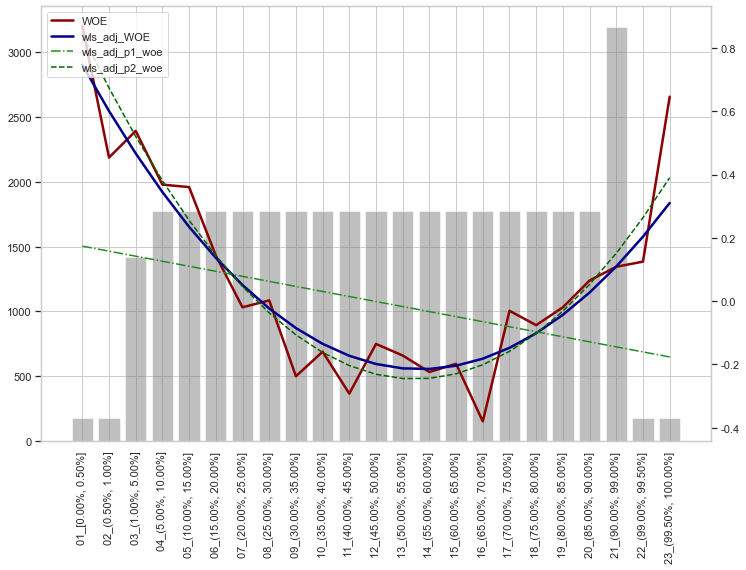

,0_good_#,1_bad_#,0_good_%,1_bad_%,WOE,IV,total,total_pct,bad_rate,wls_adj_WOE,_wls_adj_woe_details
"00_(NaN, NaN]",3845,188,0.102989,0.086318,-0.176402,2.940890e-03,4033,0.102070,0.046615,NaN,NaN
"01_[0.00%, 0.50%]",156,22,0.004178,0.010101,0.868885,5.145983e-03,178,0.004505,0.123596,0.746450,"{'wls_p1_WOE': 0.17379441025001569, 'wls_p2_WO..."
"02_(0.50%, 1.00%]",162,15,0.004339,0.006887,0.453583,1.155658e-03,177,0.004480,0.084746,0.600482,"{'wls_p1_WOE': 0.15788300282188822, 'wls_p2_WO..."
"03_(1.00%, 5.00%]",1290,129,0.034553,0.059229,0.537709,1.326835e-02,1419,0.035913,0.090909,0.466527,"{'wls_p1_WOE': 0.14197159539376078, 'wls_p2_WO..."
"04_(5.00%, 10.00%]",1636,138,0.043821,0.063361,0.368039,7.191572e-03,1774,0.044898,0.077790,0.344584,"{'wls_p1_WOE': 0.12606018796563334, 'wls_p2_WO..."
"05_(10.00%, 15.00%]",1637,137,0.043847,0.062902,0.360168,6.862759e-03,1774,0.044898,0.077227,0.234653,"{'wls_p1_WOE': 0.1101487805375059, 'wls_p2_WOE..."
"06_(15.00%, 20.00%]",1662,112,0.044517,0.051423,0.143918,9.939372e-04,1774,0.044898,0.063134,0.136734,"{'wls_p1_WOE': 0.09423737310937845, 'wls_p2_WO..."
"07_(20.00%, 25.00%]",1678,96,0.044946,0.044077,-0.019469,1.690825e-05,1774,0.044898,0.054115,0.050828,"{'wls_p1_WOE': 0.078325965681251, 'wls_p2_WOE'..."
"08_(25.00%, 30.00%]",1676,98,0.044892,0.044995,0.002295,2.371445e-07,1774,0.044898,0.055242,-0.023066,"{'wls_p1_WOE': 0.06241455825312356, 'wls_p2_WO..."
"09_(30.00%, 35.00%]",1696,78,0.045428,0.035813,-0.237232,2.281007e-03,1774,0.044898,0.043968,-0.084948,"{'wls_p1_WOE': 0.04650315082499612, 'wls_p2_WO..."


In [106]:
_col = "sb_12m_zzs_qbxse_growth_rate_yoy"
# _col = "sb_06m_zzs_qbxse_growth_rate_mom_avg"
# _col = "sb_12mvs24m_ynse_avg_ratio"
# _col = "zs_12m_zzs_tbr"
# _col = "zs_24m_zzs_adv_cv"
# _col = "sb_lately_non_zero_months"
# _col = "zs_12m_zzs_ge03_adv_cnt"
# _col = "zs_24m_zzs_ge01_ovd_cnt"
# _col = "cw_debt_to_asset_ratio"
# _col = "cw_receivables_turnover"

bins_q = [0.5, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 99, 99.5]
# bins_q = [1, 5, 10, 25, 50, 75, 90, 95, 99]
# bins_q = [5, 10, 25, 50, 75, 90, 95]
# bins_q = [10, 25, 50, 75, 90]
# bins_q = [25, 50, 75]
# bins_q = [50, 75, 90]
# bins_q = [50, 75]

_crosstab = func_woe_report_v1(
    in_var=func_binning_continuous_quantile_v1(
        in_data=_df_dev[_col],
        bins_q=bins_q,
    ),
    in_target=_df_dev["y"].apply(lambda s0: ("1_bad" if s0==1 else "0_good")),
    with_total=True, good_label_val="0_good", bad_label_val="1_bad", floating_point=0.0001,
#     with_lift_ks=True,
    with_wls_adj_woe=True,
)

crosstab = _crosstab

func_plot_woe(_crosstab, plot_badrate=False, with_nan_info=False, with_wls_adj_woe=True)
# func_plot_woe(_crosstab, plot_badrate=False, with_nan_info=True, with_wls_adj_woe=True)
# func_plot_woe(_crosstab, plot_badrate=True, with_nan_info=True, with_wls_adj_woe=True)
_crosstab

In [168]:
# # _cols_feature = [
# #     "jcxx_emp_cnt",
# #     "sb_24m_zzs_adv_cv",
# #     "zs_24m_zzs_ge01_adv_cnt",
# #     "cw_inventory_turnover",
# #     "chk_cwbb_score",
# # ]

# _cols_feature = _cols_v

# train_ds = tf.data.Dataset.from_tensor_slices(
#     tensors=(df_wb_train[_cols_feature].values, df_wb_train["flag"].values),
# ) \
#     .shuffle(buffer_size=df_wb_train.shape[0], seed=9999) \
#     .batch(5000)


# def get_compiled_model():
#     model = tf.keras.Sequential([
#         tf.keras.layers.Flatten(),
# #         tf.keras.layers.Dense(128, activation="relu"),
#         tf.keras.layers.Dense(1, activation="sigmoid"),
#     ])

#     model.compile(
#         optimizer="rmsprop",
#         loss="binary_crossentropy",
#         metrics=["accuracy"],
#     )
#     return model

# model = get_compiled_model()

# # for _tensor_X, _tensor_y in train_ds.take(5).repeat(10):
# for _tensor_X, _tensor_y in train_ds.take(100).repeat(10):
# #     print("X: {}, y: {}".format(_tensor_X.shape, _tensor_y.shape))
#     _tensor_X_q_ohe = _func_map(_tensor_X)
    
#     model.fit(
#         x=_tensor_X_q_ohe,
#         y=_tensor_y,
#     )

In [ ]:
_ks_0, _ = func_calc_ks_cross(
    y_labels=df_wb_train["flag"].apply(lambda s0: "1_bad" if s0==1 else "0_good"),
    y_pred=model.predict(_func_map(df_wb_train[_cols_feature].values))[:, 0],
#     plot=False,
    plot=True,
)
_ks_0 = _ks_0["gap"].values[0]

print(_ks_0)

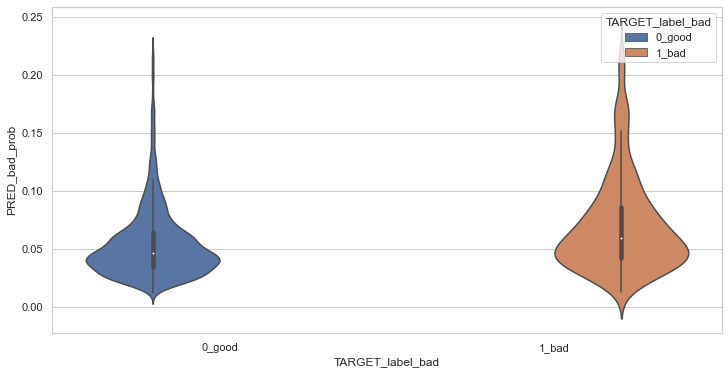

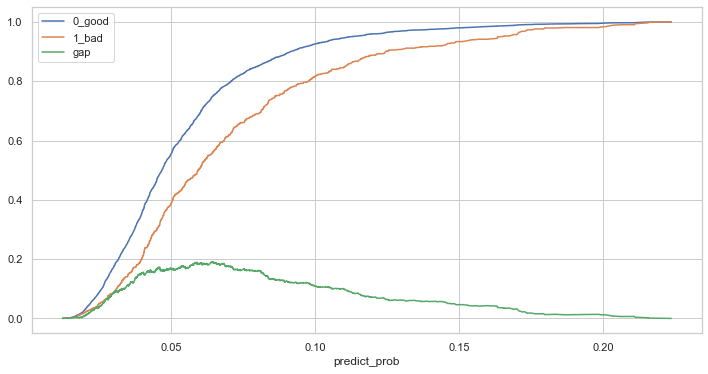

0.19162304711615397


In [1070]:
_ks_0, _ = func_calc_ks_cross(
    y_labels=df_wb_test["flag"].apply(lambda s0: "1_bad" if s0==1 else "0_good"),
    y_pred=model.predict(_func_map(df_wb_test[_cols_feature].values))[:, 0],
#     plot=False,
    plot=True,
)
_ks_0 = _ks_0["gap"].values[0]

print(_ks_0)

# xgboost

In [20]:
# # y = df_wb_train["flag"]
# # X = df_wb_train[_cols_v]



# _df = pd.concat([
#         df_wb_train.query("flag==0").sample(n=50000, replace=True, random_state=9999),
#         df_wb_train.query("flag==1").sample(n=50000, replace=True, random_state=9999),
#     ]) \
#     .reset_index(drop=True)
# dmatrix_train = xgb.DMatrix(
#     data=_df[_cols_v],
#     label=_df["flag"],
# )

# dmatrix_test = xgb.DMatrix(
#     data=df_wb_test[_cols_v],
#     label=df_wb_test["flag"],
# )

# dmatrix_oot = xgb.DMatrix(
#     data=df_wb_oot[_cols_v],
#     label=df_wb_oot["flag"],
# )

# dmatrix_dev = xgb.DMatrix(
#     data=df_wb_dev[_cols_v],
#     label=df_wb_dev["flag"],
# )

# dmatrix = xgb.DMatrix(
#     data=df_wb[_cols_v],
#     label=df_wb["flag"],
# )



In [21]:
# params = {
    
#     "n_estimators": 1000000,
    
# #     "booster": "gblinear",
#     "booster": "gbtree",
    
#     "eta": 0.3,
#     "gamma": 0.001,
#     "max_depth": 2,
# #     "min_child_weight": 0.5,
#     "subsample": 0.8,
#     "colsample_bytree": 0.2,
#     "tree_method": "hist",
#     "alpha": 10,
#     "lambda": 10,
    
    
#     "objective": "binary:logistic",
    
#     "nthread": 10,
#     "base_score": 0.5,
# #     "eval_metric": "rmse",
#     "verbosity": 0,
    
# }
# num_boost_round = 20


# model_xgb = xgb.train(
#     params=params,
#     dtrain=dmatrix_train,
#     num_boost_round=num_boost_round,
# )

In [23]:
# sns.distplot(model_xgb.predict(dmatrix))

In [26]:
# _ks_0, _ = func_calc_ks_cross(
#     y_labels=pd.Series(dmatrix_train.get_label()),
#     y_pred=model_xgb.predict(dmatrix_train),
#     plot=True,
# )
# _ks_0 = _ks_0["gap"].values[0]

# print(_ks_0)

In [29]:
# _ks_0, _ = func_calc_ks_cross(
#     y_labels=pd.Series(dmatrix_test.get_label()),
#     y_pred=model_xgb.predict(dmatrix_test),
#     plot=True,
# )
# _ks_0 = _ks_0["gap"].values[0]

# print(_ks_0)

In [28]:
# _ks_0, _ = func_calc_ks_cross(
#     y_labels=pd.Series(dmatrix_oot.get_label()),
#     y_pred=model_xgb.predict(dmatrix_oot),
#     plot=True,
# )
# _ks_0 = _ks_0["gap"].values[0]

# print(_ks_0)

In [30]:
# _t = func_calc_lift(
#     y_labels=pd.Series(dmatrix.get_label()).apply(lambda s0: "1_bad" if s0==1 else "0_good"),
#     y_pred=pd.Series(model_xgb.predict(dmatrix)),
#     bucket_cnt=20,
#     bad_label='1_bad',
#     plot=False,
# )

# _t.to_clipboard()
# _t


In [ ]:
inf = np.inf

# _col = "zs_24m_zzs_ge01_adv_cnt"
# _col = "zs_24m_gt0_znj_cnt"
_col = "chk_cwbb_score"
_bin = [-inf, 500, 550, 600, 650, 700, 750, 800, inf]
# _bin = [-inf, 500, 600, 700, 750, 800, inf]

_crosstab = func_woe_report_v1(
    in_var=func_binning_continuous_v1(
        in_data=df[_col],
        bins=_bin, right_border=True, include_lowest=True,
    ),
    in_target=df["y"].apply(lambda s0: ("1_bad" if s0==1 else "0_good")),
    with_total=True, good_label_val="0_good", bad_label_val="1_bad", floating_point=0.0001,
)

# _, _crosstab, _bin = func_auto_binning_continuous_v1(
#     in_var=df_wb[_col],
#     in_target=df_wb["y"].apply(lambda s0: ("1_bad" if s0==1 else "0_good")),
# #     min_pct=0.05, max_bins_cnt=20,
# #     min_pct=0.05, max_bins_cnt=6,
#     min_pct=0.05, max_bins_cnt=5,
# #     min_pct=0.05, max_bins_cnt=4,
# #     min_pct=0.05, max_bins_cnt=3,
# #     min_pct=0.05, max_bins_cnt=2,
# #     min_pct=0.1, max_bins_cnt=6,
#     right_border=True, include_lowest=True,
# #     method="02_decision_tree",
#     method="01_equal_freq",
# )

print(_col)
print(_bin)
func_plot_woe(_crosstab, plot_badrate=True, with_nan_info=False)
# func_plot_woe(_crosstab, plot_badrate=False, with_nan_info=False)
# func_plot_woe(_crosstab, plot_badrate=False, with_nan_info=True)

_crosstab

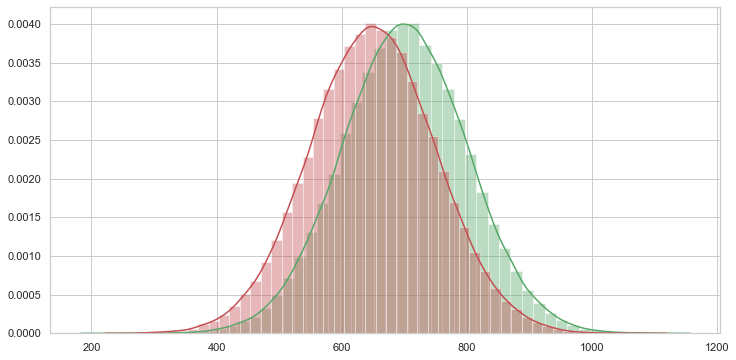

In [11]:
import numpy as np
import seaborn as sns

# 好/负样本分布
mu = 700
sigma = 100
sample_no = 100000
np.random.seed(0)
good_score_list = list(np.random.normal(mu, sigma, sample_no)) 
good_label_list = [0] * sample_no

# 坏/正样本分布
mu = 650
sigma = 100
sample_no = 100000
np.random.seed(2)
bad_score_list = list(np.random.normal(mu, sigma, sample_no))
bad_label_list = [1] * sample_no

sns.distplot(good_score_list, color='g')
sns.distplot(bad_score_list,  color='r')

In [13]:
from scipy.stats import ks_2samp
from sklearn import metrics
bad_cnt_list = []
ks_list = []
auc_list = []

for bad_cnt in range(50, 10000, 1):
    sampled_bad_score_list = list(np.random.choice(bad_score_list, size=bad_cnt))
    sampled_bad_label_list = [1] * bad_cnt
    ks = ks_2samp(sampled_bad_score_list, good_score_list).statistic
    fpr, tpr, thresholds = metrics.roc_curve(good_label_list + sampled_bad_label_list, 
                                             good_score_list + sampled_bad_score_list, pos_label=0)
    auc = metrics.auc(fpr, tpr)
    bad_cnt_list.append(bad_cnt)
    ks_list.append(ks)
    auc_list.append(auc)

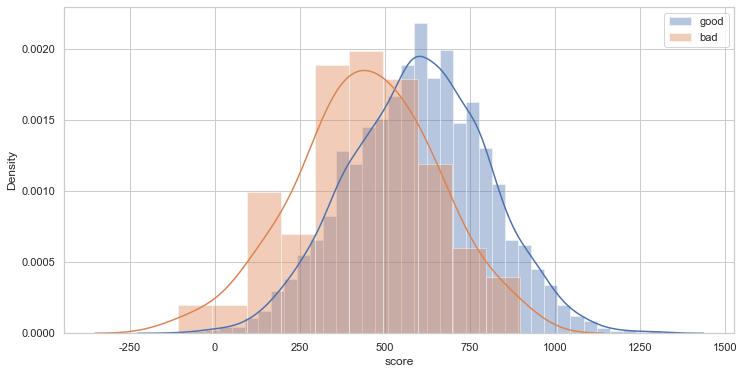

In [5]:
# np.random.seed(seed=None)
np.random.seed(seed=123456)

_data_good = np.random.normal(loc=600, scale=200, size=3000)
_data_bad = np.random.normal(loc=450, scale=180, size=100)


df_sample = pd.concat([
        pd.DataFrame([
            {
                "flag": 0,
                "target_label": "0_good",
                "score": s0,
            }
            for s0 in _data_good
        ]),
        pd.DataFrame([
            {
                "flag": 1,
                "target_label": "1_bad",
                "score": s0,
            }
            for s0 in _data_bad
        ]),
    ],
    ignore_index=True,
) \
    .reset_index(drop=False) \
    .rename(columns={"index": "idx"})

df_sample["pred"] = \
    (df_sample["score"].max()-df_sample["score"])/(df_sample["score"].max()-df_sample["score"].min())

####################################################################################
sns.distplot(df_sample.query("flag==0")["score"], label="good")
sns.distplot(df_sample.query("flag==1")["score"], label="bad")
plt.legend()


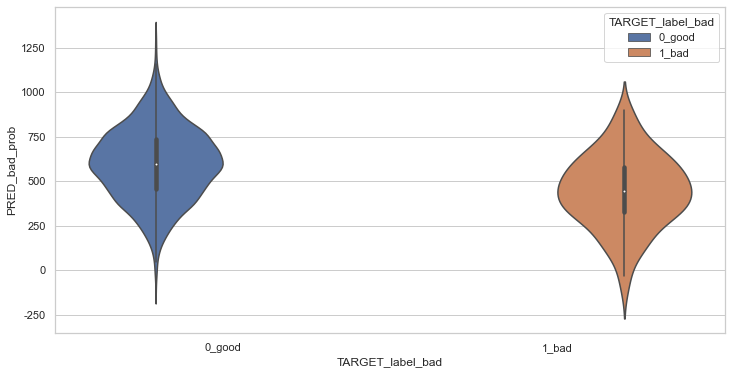

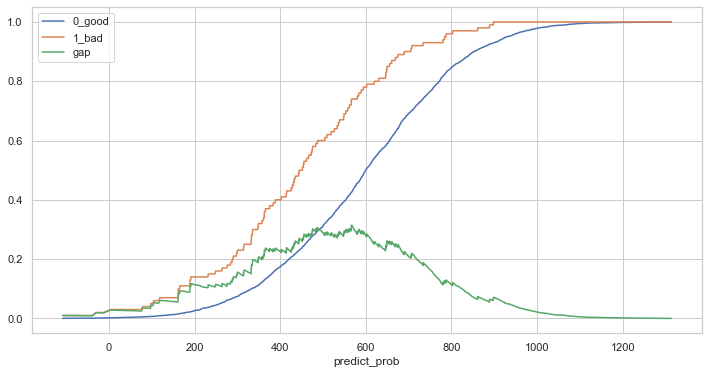

0.31466666666666665


In [6]:
_ks_0, _ = func_calc_ks_cross(
    y_labels=df_sample["target_label"],
    y_pred=df_sample["score"],
    plot=True,
)
_ks_0 = _ks_0["gap"].values[0]

print(_ks_0)

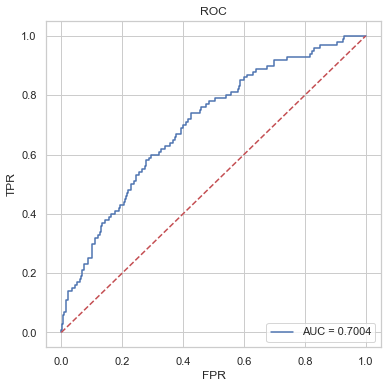

0.7004066666666666


In [7]:
_auc_0 = func_calc_auc_roc(
    y_labels=df_sample["flag"],
    y_pred=df_sample["pred"],
    plot=True,
)

print(_auc_0)

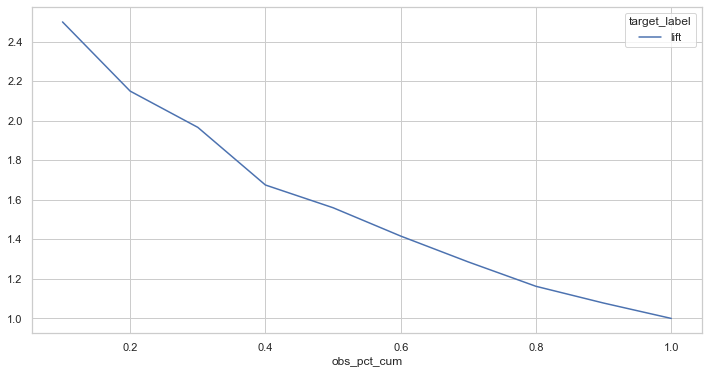

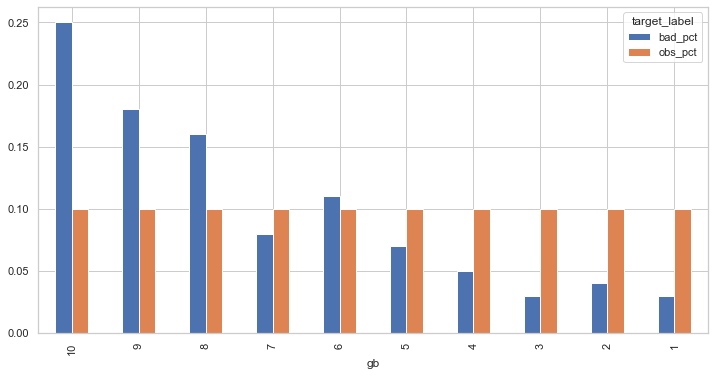

target_label,gb,bad_cnt,obs_cnt,predict_prob_gte,bad_pct,obs_pct,bad_pct_cum,obs_pct_cum,lift,bad_rate
0,10,25,310,0.693873,0.25,0.1,0.25,0.1,2.500000,0.080645
1,9,18,310,0.631630,0.18,0.1,0.43,0.2,2.150000,0.058065
2,8,16,310,0.582876,0.16,0.1,0.59,0.3,1.966667,0.051613
3,7,8,310,0.539218,0.08,0.1,0.67,0.4,1.675000,0.025806
4,6,11,310,0.504702,0.11,0.1,0.78,0.5,1.560000,0.035484
5,5,7,310,0.464967,0.07,0.1,0.85,0.6,1.416667,0.022581
6,4,5,310,0.430171,0.05,0.1,0.90,0.7,1.285714,0.016129
7,3,3,310,0.382553,0.03,0.1,0.93,0.8,1.162500,0.009677
8,2,4,310,0.325627,0.04,0.1,0.97,0.9,1.077778,0.012903
9,1,3,310,0.000000,0.03,0.1,1.00,1.0,1.000000,0.009677


In [8]:
func_calc_lift(
    y_labels=df_sample["target_label"],
    y_pred=df_sample["pred"],
    bucket_cnt=10,
    bad_label='1_bad',
    plot=True,
)

In [9]:
times = 10000

df_stats_bootstrap = []
for _idx in range(times):
    _df = pd.concat([
            df_sample.query("flag==1").sample(frac=1, replace=True, random_state=np.random.randint(100000)),
            df_sample.query("flag==0").sample(frac=1, replace=True, random_state=np.random.randint(100000)),
        ],
        ignore_index=True,
    )

    # ####################################################################################
    # sns.distplot(_df.query("flag==0")["score"], label="good")
    # sns.distplot(_df.query("flag==1")["score"], label="bad")
    # plt.legend()

    _ks, _ = func_calc_ks_cross(
        y_labels=_df["target_label"],
        y_pred=_df["score"],
        plot=False,
    )

    _auc = func_calc_auc_roc(
        y_labels=_df["flag"],
        y_pred=_df["pred"],
        plot=False,
    )
    
    df_stats_bootstrap.append(OrderedDict({
        "idx": _idx,
        "ks": _ks["gap"].values[0],
        "auc": _auc,
    }))

df_stats_bootstrap = pd.DataFrame(df_stats_bootstrap)


In [148]:
print("80% ks: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["ks"], q=[10, 90])]))
print("90% ks: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["ks"], q=[5, 95])]))
print("95% ks: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["ks"], q=[2.5, 97.5])]))
print("99% ks: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["ks"], q=[0.5, 99.5])]))
print()
print("80% auc: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["auc"], q=[10, 90])]))
print("90% auc: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["auc"], q=[5, 95])]))
print("95% auc: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["auc"], q=[2.5, 97.5])]))
print("99% auc: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["auc"], q=[0.5, 99.5])]))
print()


80% ks: [0.2766666666666667, 0.3866666666666667]
90% ks: [0.26164999999999994, 0.40199999999999997]
95% ks: [0.24933333333333335, 0.416]
99% ks: [0.22666333333333336, 0.44099999999999995]

80% auc: [0.6663193333333334, 0.7323913333333335]
90% auc: [0.6565948333333333, 0.7418373333333333]
95% auc: [0.6490498333333333, 0.74867025]
99% auc: [0.6332896833333332, 0.7655438333333333]



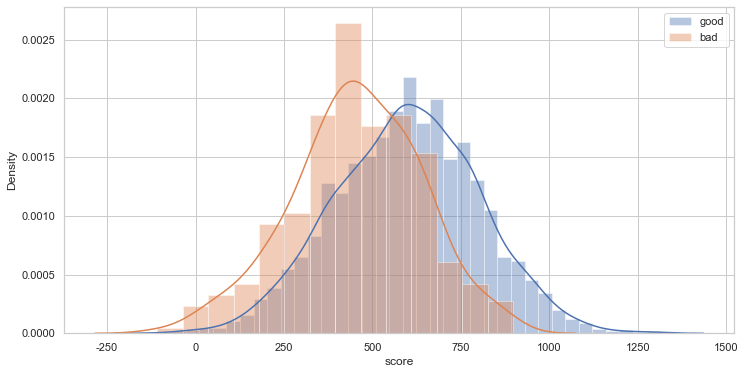

In [190]:
# np.random.seed(seed=None)
np.random.seed(seed=123456)


_data_good = np.random.normal(loc=600, scale=200, size=3000)
_data_bad = np.random.normal(loc=450, scale=180, size=300)


df_sample = pd.concat([
        pd.DataFrame([
            {
                "flag": 0,
                "target_label": "0_good",
                "score": s0,
            }
            for s0 in _data_good
        ]),
        pd.DataFrame([
            {
                "flag": 1,
                "target_label": "1_bad",
                "score": s0,
            }
            for s0 in _data_bad
        ]),
    ],
    ignore_index=True,
) \
    .reset_index(drop=False) \
    .rename(columns={"index": "idx"})

df_sample["pred"] = \
    (df_sample["score"].max()-df_sample["score"])/(df_sample["score"].max()-df_sample["score"].min())

####################################################################################
sns.distplot(df_sample.query("flag==0")["score"], label="good")
sns.distplot(df_sample.query("flag==1")["score"], label="bad")
plt.legend()


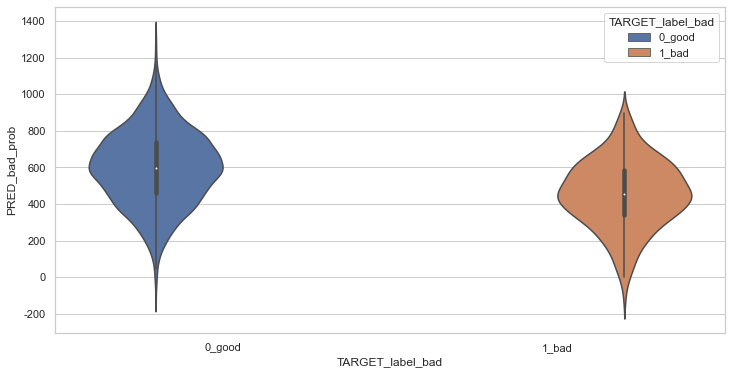

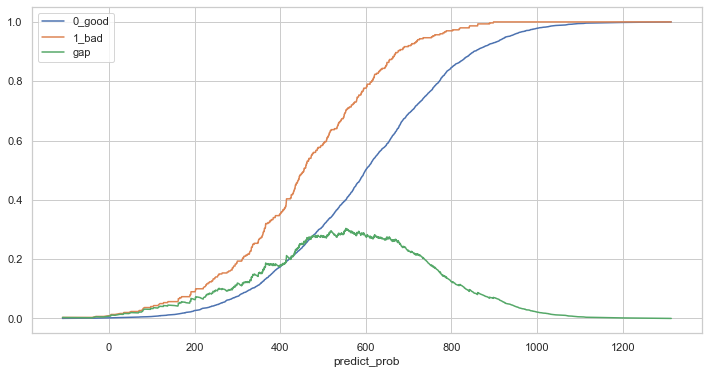

0.3036666666666667


In [191]:
_ks_0, _ = func_calc_ks_cross(
    y_labels=df_sample["target_label"],
    y_pred=df_sample["score"],
    plot=True,
)
_ks_0 = _ks_0["gap"].values[0]

print(_ks_0)

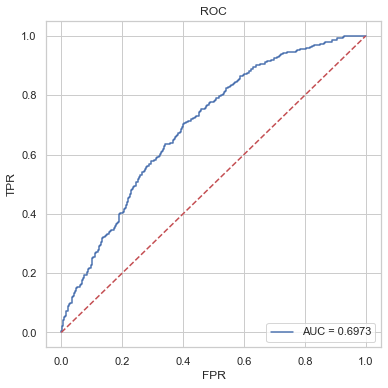

0.6972888888888888


In [192]:
_auc_0 = func_calc_auc_roc(
    y_labels=df_sample["flag"],
    y_pred=df_sample["pred"],
    plot=True,
)

print(_auc_0)

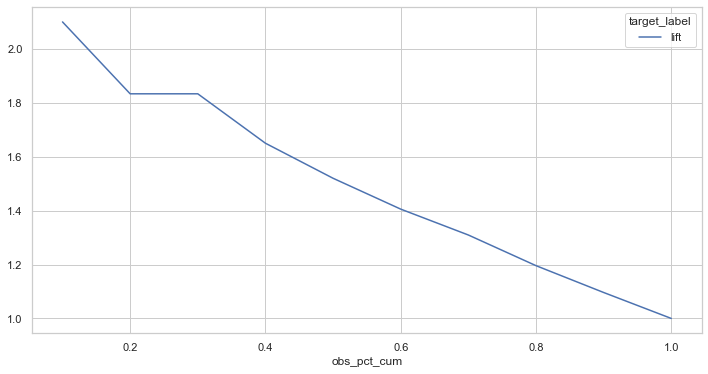

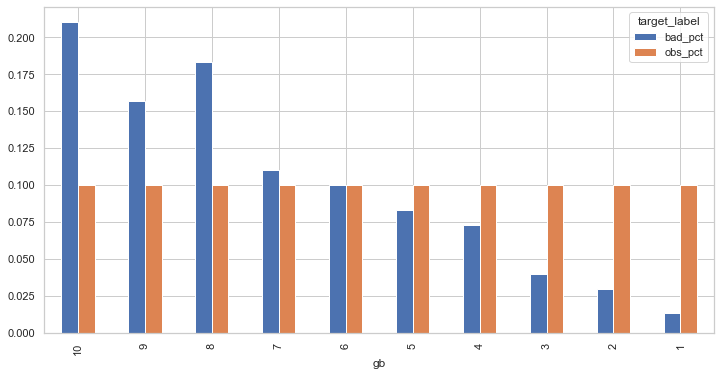

target_label,gb,bad_cnt,obs_cnt,predict_prob_gte,bad_pct,obs_pct,bad_pct_cum,obs_pct_cum,lift,bad_rate
0,10,63,330,0.699128,0.210000,0.1,0.210000,0.1,2.100000,0.190909
1,9,47,330,0.636716,0.156667,0.1,0.366667,0.2,1.833333,0.142424
2,8,55,330,0.591171,0.183333,0.1,0.550000,0.3,1.833333,0.166667
3,7,33,330,0.546007,0.110000,0.1,0.660000,0.4,1.650000,0.100000
4,6,30,330,0.509246,0.100000,0.1,0.760000,0.5,1.520000,0.090909
5,5,25,330,0.472331,0.083333,0.1,0.843333,0.6,1.405556,0.075758
6,4,22,330,0.436329,0.073333,0.1,0.916667,0.7,1.309524,0.066667
7,3,12,330,0.388538,0.040000,0.1,0.956667,0.8,1.195833,0.036364
8,2,9,330,0.329809,0.030000,0.1,0.986667,0.9,1.096296,0.027273
9,1,4,330,0.000000,0.013333,0.1,1.000000,1.0,1.000000,0.012121


In [193]:
func_calc_lift(
    y_labels=df_sample["target_label"],
    y_pred=df_sample["pred"],
    bucket_cnt=10,
    bad_label='1_bad',
    plot=True,
)

In [195]:
times = 10000

df_stats_bootstrap = []
for _idx in range(times):
    _df = pd.concat([
            df_sample.query("flag==1").sample(frac=1, replace=True, random_state=np.random.randint(100000)),
            df_sample.query("flag==0").sample(frac=1, replace=True, random_state=np.random.randint(100000)),
        ],
        ignore_index=True,
    )

    # ####################################################################################
    # sns.distplot(_df.query("flag==0")["score"], label="good")
    # sns.distplot(_df.query("flag==1")["score"], label="bad")
    # plt.legend()

    _ks, _ = func_calc_ks_cross(
        y_labels=_df["target_label"],
        y_pred=_df["score"],
        plot=False,
    )

    _auc = func_calc_auc_roc(
        y_labels=_df["flag"],
        y_pred=_df["pred"],
        plot=False,
    )
    
    df_stats_bootstrap.append(OrderedDict({
        "idx": _idx,
        "ks": _ks["gap"].values[0],
        "auc": _auc,
    }))

df_stats_bootstrap = pd.DataFrame(df_stats_bootstrap)


In [196]:
print("80% ks: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["ks"], q=[10, 90])]))
print("90% ks: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["ks"], q=[5, 95])]))
print("95% ks: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["ks"], q=[2.5, 97.5])]))
print("99% ks: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["ks"], q=[0.5, 99.5])]))
print()
print("80% auc: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["auc"], q=[10, 90])]))
print("90% auc: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["auc"], q=[5, 95])]))
print("95% auc: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["auc"], q=[2.5, 97.5])]))
print("99% auc: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["auc"], q=[0.5, 99.5])]))
print()


80% ks: [0.2780000000000001, 0.34400000000000003]
90% ks: [0.2693333333333333, 0.354]
95% ks: [0.2616666666666667, 0.36233333333333334]
99% ks: [0.2473333333333334, 0.3803349999999997]

80% auc: [0.6784425555555554, 0.7156501111111113]
90% auc: [0.6731348888888888, 0.7208078333333333]
95% auc: [0.6681455555555555, 0.7251129166666666]
99% auc: [0.6582609333333332, 0.7341586]



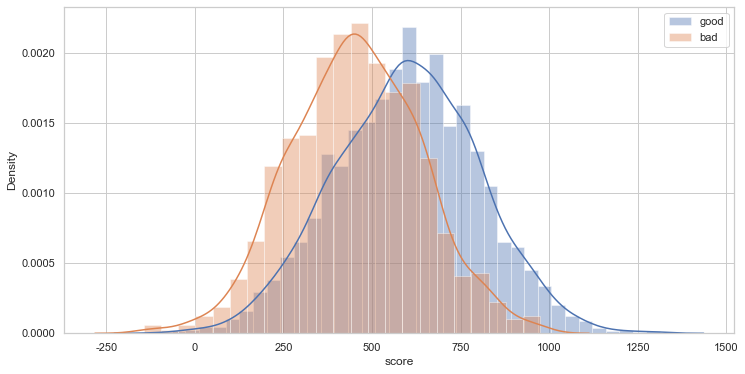

In [202]:
# np.random.seed(seed=None)
np.random.seed(seed=123456)


_data_good = np.random.normal(loc=600, scale=200, size=3000)
_data_bad = np.random.normal(loc=450, scale=180, size=1000)


df_sample = pd.concat([
        pd.DataFrame([
            {
                "flag": 0,
                "target_label": "0_good",
                "score": s0,
            }
            for s0 in _data_good
        ]),
        pd.DataFrame([
            {
                "flag": 1,
                "target_label": "1_bad",
                "score": s0,
            }
            for s0 in _data_bad
        ]),
    ],
    ignore_index=True,
) \
    .reset_index(drop=False) \
    .rename(columns={"index": "idx"})

df_sample["pred"] = \
    (df_sample["score"].max()-df_sample["score"])/(df_sample["score"].max()-df_sample["score"].min())

####################################################################################
sns.distplot(df_sample.query("flag==0")["score"], label="good")
sns.distplot(df_sample.query("flag==1")["score"], label="bad")
plt.legend()


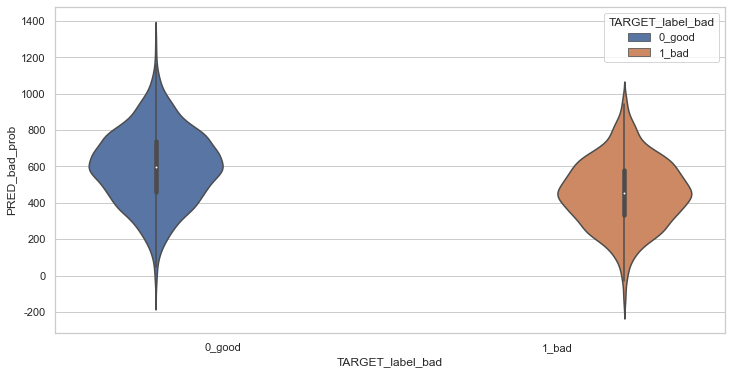

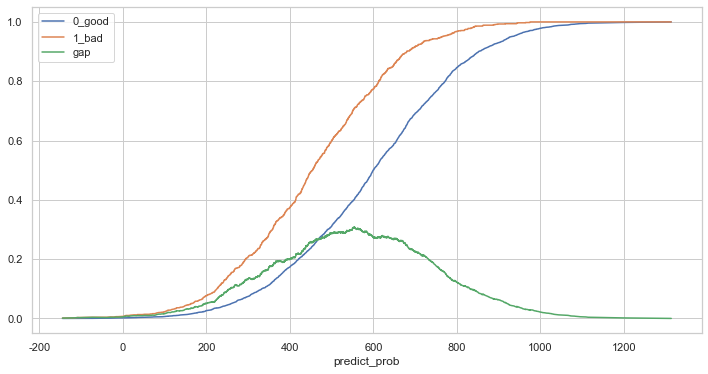

0.30766666666666664


In [203]:
_ks_0, _ = func_calc_ks_cross(
    y_labels=df_sample["target_label"],
    y_pred=df_sample["score"],
    plot=True,
)
_ks_0 = _ks_0["gap"].values[0]

print(_ks_0)

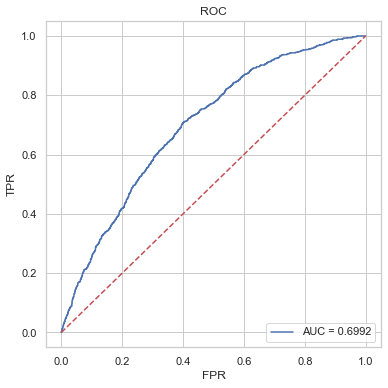

0.699214


In [204]:
_auc_0 = func_calc_auc_roc(
    y_labels=df_sample["flag"],
    y_pred=df_sample["pred"],
    plot=True,
)

print(_auc_0)

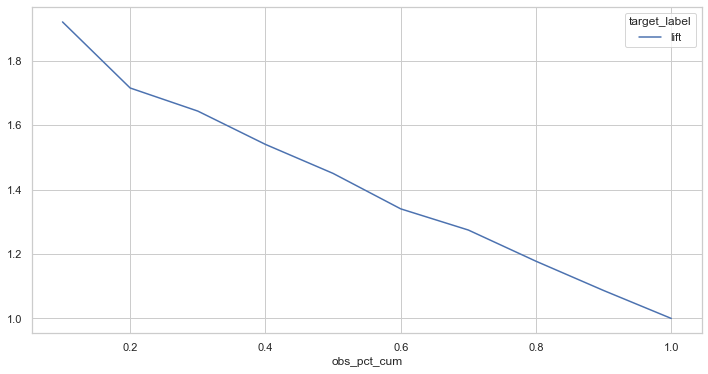

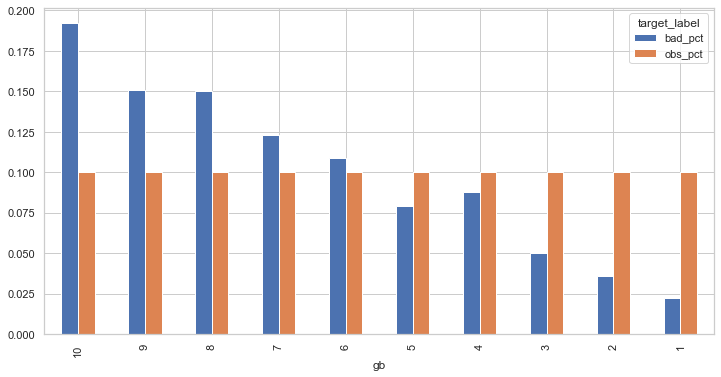

target_label,gb,bad_cnt,obs_cnt,predict_prob_gte,bad_pct,obs_pct,bad_pct_cum,obs_pct_cum,lift,bad_rate
0,10,192,400,0.701831,0.192,0.1,0.192,0.1,1.920000,0.4800
1,9,151,400,0.638888,0.151,0.1,0.343,0.2,1.715000,0.3775
2,8,150,400,0.592815,0.150,0.1,0.493,0.3,1.643333,0.3750
3,7,123,400,0.551727,0.123,0.1,0.616,0.4,1.540000,0.3075
4,6,109,400,0.512662,0.109,0.1,0.725,0.5,1.450000,0.2725
5,5,79,400,0.478547,0.079,0.1,0.804,0.6,1.340000,0.1975
6,4,88,400,0.439562,0.088,0.1,0.892,0.7,1.274286,0.2200
7,3,50,400,0.392255,0.050,0.1,0.942,0.8,1.177500,0.1250
8,2,36,400,0.332361,0.036,0.1,0.978,0.9,1.086667,0.0900
9,1,22,400,0.000000,0.022,0.1,1.000,1.0,1.000000,0.0550


In [205]:
func_calc_lift(
    y_labels=df_sample["target_label"],
    y_pred=df_sample["pred"],
    bucket_cnt=10,
    bad_label='1_bad',
    plot=True,
)

In [206]:
times = 10000

df_stats_bootstrap = []
for _idx in range(times):
    _df = pd.concat([
            df_sample.query("flag==1").sample(frac=1, replace=True, random_state=np.random.randint(100000)),
            df_sample.query("flag==0").sample(frac=1, replace=True, random_state=np.random.randint(100000)),
        ],
        ignore_index=True,
    )

    # ####################################################################################
    # sns.distplot(_df.query("flag==0")["score"], label="good")
    # sns.distplot(_df.query("flag==1")["score"], label="bad")
    # plt.legend()

    _ks, _ = func_calc_ks_cross(
        y_labels=_df["target_label"],
        y_pred=_df["score"],
        plot=False,
    )

    _auc = func_calc_auc_roc(
        y_labels=_df["flag"],
        y_pred=_df["pred"],
        plot=False,
    )
    
    df_stats_bootstrap.append(OrderedDict({
        "idx": _idx,
        "ks": _ks["gap"].values[0],
        "auc": _auc,
    }))

df_stats_bootstrap = pd.DataFrame(df_stats_bootstrap)


In [207]:
print("80% ks: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["ks"], q=[10, 90])]))
print("90% ks: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["ks"], q=[5, 95])]))
print("95% ks: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["ks"], q=[2.5, 97.5])]))
print("99% ks: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["ks"], q=[0.5, 99.5])]))
print()
print("80% auc: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["auc"], q=[10, 90])]))
print("90% auc: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["auc"], q=[5, 95])]))
print("95% auc: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["auc"], q=[2.5, 97.5])]))
print("99% auc: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["auc"], q=[0.5, 99.5])]))
print()


80% ks: [0.2886666666666666, 0.3313333333333333]
90% ks: [0.283, 0.33699999999999997]
95% ks: [0.27799999999999997, 0.3423333333333333]
99% ks: [0.26699999999999996, 0.3516683333333331]

80% auc: [0.6875752333333333, 0.7109388666666666]
90% auc: [0.6843843500000001, 0.7142974833333333]
95% auc: [0.6813438916666665, 0.7170040666666667]
99% auc: [0.675565825, 0.722047515]



In [197]:
print("80% ks: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["ks"], q=[10, 90])]))
print("90% ks: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["ks"], q=[5, 95])]))
print("95% ks: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["ks"], q=[2.5, 97.5])]))
print("99% ks: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["ks"], q=[0.5, 99.5])]))
print()
print("80% auc: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["auc"], q=[10, 90])]))
print("90% auc: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["auc"], q=[5, 95])]))
print("95% auc: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["auc"], q=[2.5, 97.5])]))
print("99% auc: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["auc"], q=[0.5, 99.5])]))
print()


80% ks: [0.2780000000000001, 0.34400000000000003]
90% ks: [0.2693333333333333, 0.354]
95% ks: [0.2616666666666667, 0.36233333333333334]
99% ks: [0.2473333333333334, 0.3803349999999997]

80% auc: [0.6784425555555554, 0.7156501111111113]
90% auc: [0.6731348888888888, 0.7208078333333333]
95% auc: [0.6681455555555555, 0.7251129166666666]
99% auc: [0.6582609333333332, 0.7341586]



In [148]:
print("80% ks: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["ks"], q=[10, 90])]))
print("90% ks: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["ks"], q=[5, 95])]))
print("95% ks: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["ks"], q=[2.5, 97.5])]))
print("99% ks: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["ks"], q=[0.5, 99.5])]))
print()
print("80% auc: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["auc"], q=[10, 90])]))
print("90% auc: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["auc"], q=[5, 95])]))
print("95% auc: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["auc"], q=[2.5, 97.5])]))
print("99% auc: {}".format([s0 for s0 in np.percentile(df_stats_bootstrap["auc"], q=[0.5, 99.5])]))
print()


80% ks: [0.2766666666666667, 0.3866666666666667]
90% ks: [0.26164999999999994, 0.40199999999999997]
95% ks: [0.24933333333333335, 0.416]
99% ks: [0.22666333333333336, 0.44099999999999995]

80% auc: [0.6663193333333334, 0.7323913333333335]
90% auc: [0.6565948333333333, 0.7418373333333333]
95% auc: [0.6490498333333333, 0.74867025]
99% auc: [0.6332896833333332, 0.7655438333333333]



# 特征工程

In [33]:
######################################################################
# df_wb = df_wb_0.reset_index(drop=True)

######################################################################
_cols_0 = [s0 for s0 in df_wb_0.columns if s0 not in _cols_derive_var]

# random_seed = random.randint(1, 100000)
random_seed = 26272627
# random_seed = 12345

df_wb = pd.concat([
    df_wb_0.query("flag==1"),
#     df_wb_0.query("flag==0").sample(n=5000, random_state=random_seed),
    df_wb_0.query("flag==0"),
], ignore_index=True).reset_index(drop=True)


## 特征宽表描述统计分析

In [34]:
df_t_describe_summary = func_dataframe_describe(
    in_df=df_wb_0,
#     in_df=df_wb,
    var_names=_cols_derive_var,
).reset_index(drop=False)
# df_t_describe_summary.to_clipboard(index=False)

In [35]:
# # ####################################################################################
# # with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_t_describe_summary.pkl", "wb") as fw:
# # # with open(r"/Users/luzhidong/Desktop/71_企业债券项目（众联评级）/01_模型开发/data/df_t_describe_summary.pkl", "wb") as fw:
# #     pickle.dump(df_t_describe_summary, fw)

# # with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_t_describe_summary.pkl", "rb") as fr:
# with open(r"/Users/luzhidong/Desktop/71_企业债券项目（众联评级）/01_模型开发/data/df_t_describe_summary.pkl", "rb") as fr:
#     df_t_describe_summary = pickle.load(fr)

# print(df_t_describe_summary.shape)


(2357, 20)


## 自动分箱处理（等频20等份）

In [36]:
###########################################################################
# 计算变量自动分箱后WOE、IV（fine binning）
def _func_calc_fine_iv(date_type, in_df, var_name, target_label):
    rt = OrderedDict({
        "crosstab_converted": None,
        "fine_IV": None,
        "boundary": None,
        "mapping_gb_class": None,
    })
    if date_type=="Numerical":
        _, rt["crosstab_converted"], rt["boundary"] = func_auto_binning_continuous_v2(
            in_df=in_df, var_name=var_name, target_label=target_label,
            min_pct=0.05-0.0001, max_bins_cnt=20,
            # min_pct=0.1-0.0001, max_bins_cnt=9,
            method="01_equal_freq",
            # method="02_decision_tree",
            # method="03_best_ks",
        )
    elif date_type=="Categorical":
        _, rt["crosstab_converted"], rt["mapping_gb_class"] = func_auto_combining_discrete_v2(
            in_df=in_df, var_name=var_name, target_label=target_label,
            min_pct=0.05-0.0001, max_bins_cnt=5,
            # method="01_equal_freq",
            method="02_best_ks",
        )
    _crosstab_converted = rt["crosstab_converted"]
    rt["fine_IV"] = _crosstab_converted.loc["total", "IV"]
    _d = _crosstab_converted["WOE"].reset_index(drop=True).dropna().reset_index().values
    _X = _d[:, 0]
    _y = _d[:, 1]
    return rt

df_t_features_fine_iv = df_t_describe_summary \
    [df_t_describe_summary["column_name"].isin(_cols_derive_var[:])] \
    [["column_name", "data_type"]].reset_index(drop=True)

##########################################################################
_time = time.time()

_fine_binning_result = []
for _column_name, _data_type in df_t_features_fine_iv.values:
    _fine_binning_result.append(
        _func_calc_fine_iv(
            date_type=_data_type,
            in_df=df_wb.query("data_role in ['01_train', '02_test']"),
            var_name=_column_name, target_label="target_label",
        )
    )
print("cost time: {} sec.".format(time.time()-_time))

df_t_features_fine_iv["fine_IV"] = [s0["fine_IV"] for s0 in _fine_binning_result]
# df_t_features_fine_iv["boundary"] = [([-np.inf, np.inf] if s0["boundary"]==None else [round(t, 4) for t in s0["boundary"]]) for s0 in _fine_binning_result]
df_t_features_fine_iv["boundary"] = [([round(t, 4) for t in s0["boundary"]] if s0["boundary"]!=None else None) for s0 in _fine_binning_result]
df_t_features_fine_iv["mapping_gb_class"] = [s0["mapping_gb_class"] for s0 in _fine_binning_result]
df_t_features_fine_iv["crosstab_converted"] = [s0["crosstab_converted"] for s0 in _fine_binning_result]
df_t_features_fine_iv["bin_cnt"] = df_t_features_fine_iv["crosstab_converted"].apply(lambda s0: s0[s0.index!="total"].shape[0])

df_t_features_fine_iv = df_t_features_fine_iv.sort_values(by=["fine_IV"], ascending=False).reset_index(drop=True)
# df_t_features_fine_iv.drop(labels=["crosstab_converted"], axis=1).to_clipboard(index=False)

In [37]:
###########################################################################
# 计算开发样本的WOE报告
_t_features_fine_woe_report = []
for _column_name, _data_type, _crosstab_converted, _boundary, _mapping_gb_class in \
            df_t_features_fine_iv[["column_name", "data_type", "crosstab_converted", "boundary", "mapping_gb_class"]].values[:]:
    _crosstab_converted = _crosstab_converted.reset_index().rename(columns={"index": "gb_idx"}).query("gb_idx!='total'")
    _crosstab_converted.insert(loc=_crosstab_converted.columns.tolist().index("gb_idx"), column="feature_name", value=_column_name)
    if _data_type=="Categorical":
        _mapping_gb_label = dict(
            pd.Series(_mapping_gb_class).reset_index().rename(columns={"index": "value_label", 0: "gb_idx"}) \
                .groupby(by=["gb_idx"])["value_label"].apply(lambda s0: "/".join(s0.sort_values(ascending=True).tolist()))
        )
        _data_label = _crosstab_converted["gb_idx"].apply(lambda s0: _mapping_gb_label.get(s0, ""))
    elif _data_type=="Numerical":
        _data_label = _crosstab_converted["gb_idx"].apply(lambda s0: (s0.split("_")[-1] if s0!="total" else ""))
    _crosstab_converted.insert(loc=_crosstab_converted.columns.tolist().index("gb_idx")+1, column="label", value=_data_label)
    _t_features_fine_woe_report.append(_crosstab_converted)
df_t_features_fine_woe_report = pd.concat(_t_features_fine_woe_report, ignore_index=True).reset_index(drop=True)

# df_t_features_fine_woe_report.to_clipboard(index=False)

## 细分箱woe编码转换

In [38]:
df_wb_woe = df_wb[_cols_0].reset_index(drop=True)

for _var, _data in list(df_wb[_cols_derive_var].to_dict(orient="Series").items())[:]:
    _woe_mapping = dict(zip(df_t_features_fine_iv.columns.tolist(), df_t_features_fine_iv.query("column_name=='{}'".format(_var)).values[0]))
    _crosstab = _woe_mapping["crosstab_converted"]
    _crosstab = _crosstab[_crosstab.index!="total"]
    _woe = _crosstab["WOE"]
    
    if _woe_mapping["data_type"]=="Numerical":
        _woe.index = [int(s0.split("_")[0]) for s0 in _woe.index]
        _woe[0] = 0
        _bins = pd.Series(
            [
                np.float64(re.sub("[ \[()\]]", "", s0.split(",")[1])) for s0 in _crosstab.index
                if int(s0.split("_")[0])!=0
            ]+[-np.inf, np.inf]) \
            .drop_duplicates() \
            .sort_values().tolist()
        
        _data_converted = func_binning_continuous_v1(
            in_data=_data,
            bins=_bins,
            right_border=True, include_lowest=False,
        )
        df_wb_woe["BIN_{}".format(_var)] = _data_converted
        df_wb_woe["WOE_{}".format(_var)] = _data_converted.apply(
            lambda s0: _woe.get(int(s0.split("_")[0]))
        )
        
#         _woe.index = [re.sub("[ \[()\]]", "", s0.split("_")[1]) for s0 in _woe.index.tolist()]
#         _woe = _woe[_woe.index!="{:.4f},{:.4f}".format(-9999999999, -9999999999)]
#         _woe.index = [s0.split(",")[1] for s0 in _woe.index]
#         _woe["{:.4f}".format(-9999999999)] = 0
#         _bins = pd.Series([np.float64(s0) for s0 in _woe.index]+[-np.inf, np.inf]) \
#             .drop_duplicates() \
#             .sort_values().tolist()
        
#         _data_converted = func_binning_continuous_v1(
#             in_data=_data,
#             bins=_bins,
#             fillna_value=-9999999999, right_border=True, include_lowest=False,
#         )
#         df_wb_woe["BIN_{}".format(_var)] = _data_converted
#         df_wb_woe["WOE_{}".format(_var)] = _data_converted.apply(
#             lambda s0: re.sub("[ \[()\]]", "", s0.split("_")[1])
#         ).apply(
#             lambda s0: (
#                 "{:.4f}".format(min([s0 for s0 in _bins if s0 not in [-9999999999, -np.inf]]))
#                 if s0=="{:.4f},{:.4f}".format(-9999999999, -9999999999)
#                 else s0.split(",")[1]
#             )
#         ).apply(lambda s0: _woe.get(s0))
        
    elif _woe_mapping["data_type"]=="Categorical":
        _cvt = _woe_mapping.get("mapping_gb_class")
        _data_converted = func_combining_discrete_v1(
            in_data=_data.fillna("NaN"), mapping_gb_class=_cvt,
            fillna_value="NaN", cvt_fillna_value=1,
        )
        df_wb_woe["BIN_{}".format(_var)] = _data_converted
        df_wb_woe["WOE_{}".format(_var)] = _data_converted.apply(lambda s0: _woe.get(s0))

In [39]:
df_t_features_fine_iv_eq20 = df_t_features_fine_iv.reset_index(drop=True)
df_t_features_fine_woe_report_eq20 = df_t_features_fine_woe_report.reset_index(drop=True)

df_wb_woe_eq20 = df_wb_woe.reset_index(drop=True)

# df_t_features_fine_iv_eq20.drop(labels=["crosstab_converted"], axis=1).to_clipboard(index=False)
# df_t_features_fine_woe_report_eq20.to_clipboard(index=False)

In [40]:
# # ####################################################################################
# # with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_wb_woe_eq20.pkl", "wb") as fw:
# #     pickle.dump(df_wb_woe_eq20, fw)

# with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_wb_woe_eq20.pkl", "rb") as fr:
#     df_wb_woe_eq20 = pickle.load(fr)

# print(df_wb_woe_eq20.shape)


In [41]:
# # ####################################################################################
# # with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_t_features_fine_iv_eq20.pkl", "wb") as fw:
# #     pickle.dump(df_t_features_fine_iv_eq20, fw)

# with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_t_features_fine_iv_eq20.pkl", "rb") as fr:
#     df_t_features_fine_iv_eq20 = pickle.load(fr)

# print(df_t_features_fine_iv_eq20.shape)


## 自动分箱处理（决策树算法最优分箱，最大9箱）

In [42]:
###########################################################################
# 计算变量自动分箱后WOE、IV（fine binning）
def _func_calc_fine_iv(date_type, in_df, var_name, target_label):
    rt = OrderedDict({
        "crosstab_converted": None,
        "fine_IV": None,
        "boundary": None,
        "mapping_gb_class": None,
    })
    if date_type=="Numerical":
        _, rt["crosstab_converted"], rt["boundary"] = func_auto_binning_continuous_v2(
            in_df=in_df, var_name=var_name, target_label=target_label,
            # min_pct=0.05-0.0001, max_bins_cnt=20,
            min_pct=0.1-0.0001, max_bins_cnt=9,
            # method="01_equal_freq",
            method="02_decision_tree",
            # method="03_best_ks",
        )
    elif date_type=="Categorical":
        _, rt["crosstab_converted"], rt["mapping_gb_class"] = func_auto_combining_discrete_v2(
            in_df=in_df, var_name=var_name, target_label=target_label,
            min_pct=0.05-0.0001, max_bins_cnt=5,
            # method="01_equal_freq",
            method="02_best_ks",
        )
    _crosstab_converted = rt["crosstab_converted"]
    rt["fine_IV"] = _crosstab_converted.loc["total", "IV"]
    _d = _crosstab_converted["WOE"].reset_index(drop=True).dropna().reset_index().values
    _X = _d[:, 0]
    _y = _d[:, 1]
    return rt

df_t_features_fine_iv = df_t_describe_summary \
    [df_t_describe_summary["column_name"].isin(_cols_derive_var[:])] \
    [["column_name", "data_type"]].reset_index(drop=True)

##########################################################################
_time = time.time()

_fine_binning_result = []
for _column_name, _data_type in df_t_features_fine_iv.values:
    _fine_binning_result.append(
        _func_calc_fine_iv(
            date_type=_data_type,
            in_df=df_wb.query("data_role in ['01_train', '02_test']"),
            var_name=_column_name, target_label="target_label",
        )
    )
print("cost time: {} sec.".format(time.time()-_time))

df_t_features_fine_iv["fine_IV"] = [s0["fine_IV"] for s0 in _fine_binning_result]
# df_t_features_fine_iv["boundary"] = [([-np.inf, np.inf] if s0["boundary"]==None else [round(t, 4) for t in s0["boundary"]]) for s0 in _fine_binning_result]
df_t_features_fine_iv["boundary"] = [([round(t, 4) for t in s0["boundary"]] if s0["boundary"]!=None else None) for s0 in _fine_binning_result]
df_t_features_fine_iv["mapping_gb_class"] = [s0["mapping_gb_class"] for s0 in _fine_binning_result]
df_t_features_fine_iv["crosstab_converted"] = [s0["crosstab_converted"] for s0 in _fine_binning_result]
df_t_features_fine_iv["bin_cnt"] = df_t_features_fine_iv["crosstab_converted"].apply(lambda s0: s0[s0.index!="total"].shape[0])

df_t_features_fine_iv = df_t_features_fine_iv.sort_values(by=["fine_IV"], ascending=False).reset_index(drop=True)
# df_t_features_fine_iv.drop(labels=["crosstab_converted"], axis=1).to_clipboard(index=False)

In [43]:
###########################################################################
# 计算开发样本的WOE报告
_t_features_fine_woe_report = []
for _column_name, _data_type, _crosstab_converted, _boundary, _mapping_gb_class in \
            df_t_features_fine_iv[["column_name", "data_type", "crosstab_converted", "boundary", "mapping_gb_class"]].values[:]:
    _crosstab_converted = _crosstab_converted.reset_index().rename(columns={"index": "gb_idx"}).query("gb_idx!='total'")
    _crosstab_converted.insert(loc=_crosstab_converted.columns.tolist().index("gb_idx"), column="feature_name", value=_column_name)
    if _data_type=="Categorical":
        _mapping_gb_label = dict(
            pd.Series(_mapping_gb_class).reset_index().rename(columns={"index": "value_label", 0: "gb_idx"}) \
                .groupby(by=["gb_idx"])["value_label"].apply(lambda s0: "/".join(s0.sort_values(ascending=True).tolist()))
        )
        _data_label = _crosstab_converted["gb_idx"].apply(lambda s0: _mapping_gb_label.get(s0, ""))
    elif _data_type=="Numerical":
        _data_label = _crosstab_converted["gb_idx"].apply(lambda s0: (s0.split("_")[-1] if s0!="total" else ""))
    _crosstab_converted.insert(loc=_crosstab_converted.columns.tolist().index("gb_idx")+1, column="label", value=_data_label)
    _t_features_fine_woe_report.append(_crosstab_converted)
df_t_features_fine_woe_report = pd.concat(_t_features_fine_woe_report, ignore_index=True).reset_index(drop=True)

# df_t_features_fine_woe_report.to_clipboard(index=False)

## 细分箱woe编码转换

In [44]:
df_wb_woe = df_wb[_cols_0].reset_index(drop=True)

for _var, _data in list(df_wb[_cols_derive_var].to_dict(orient="Series").items())[:]:
    _woe_mapping = dict(zip(df_t_features_fine_iv.columns.tolist(), df_t_features_fine_iv.query("column_name=='{}'".format(_var)).values[0]))
    _crosstab = _woe_mapping["crosstab_converted"]
    _crosstab = _crosstab[_crosstab.index!="total"]
    _woe = _crosstab["WOE"]
    
    if _woe_mapping["data_type"]=="Numerical":
        _woe.index = [int(s0.split("_")[0]) for s0 in _woe.index]
        _woe[0] = 0
        _bins = pd.Series(
            [
                np.float64(re.sub("[ \[()\]]", "", s0.split(",")[1])) for s0 in _crosstab.index
                if int(s0.split("_")[0])!=0
            ]+[-np.inf, np.inf]) \
            .drop_duplicates() \
            .sort_values().tolist()
        
        _data_converted = func_binning_continuous_v1(
            in_data=_data,
            bins=_bins,
            right_border=True, include_lowest=False,
        )
        df_wb_woe["BIN_{}".format(_var)] = _data_converted
        df_wb_woe["WOE_{}".format(_var)] = _data_converted.apply(
            lambda s0: _woe.get(int(s0.split("_")[0]))
        )
        
#         _woe.index = [re.sub("[ \[()\]]", "", s0.split("_")[1]) for s0 in _woe.index.tolist()]
#         _woe = _woe[_woe.index!="{:.4f},{:.4f}".format(-9999999999, -9999999999)]
#         _woe.index = [s0.split(",")[1] for s0 in _woe.index]
#         _woe["{:.4f}".format(-9999999999)] = 0
#         _bins = pd.Series([np.float64(s0) for s0 in _woe.index]+[-np.inf, np.inf]) \
#             .drop_duplicates() \
#             .sort_values().tolist()
        
#         _data_converted = func_binning_continuous_v1(
#             in_data=_data,
#             bins=_bins,
#             fillna_value=-9999999999, right_border=True, include_lowest=False,
#         )
#         df_wb_woe["BIN_{}".format(_var)] = _data_converted
#         df_wb_woe["WOE_{}".format(_var)] = _data_converted.apply(
#             lambda s0: re.sub("[ \[()\]]", "", s0.split("_")[1])
#         ).apply(
#             lambda s0: (
#                 "{:.4f}".format(min([s0 for s0 in _bins if s0 not in [-9999999999, -np.inf]]))
#                 if s0=="{:.4f},{:.4f}".format(-9999999999, -9999999999)
#                 else s0.split(",")[1]
#             )
#         ).apply(lambda s0: _woe.get(s0))
        
    elif _woe_mapping["data_type"]=="Categorical":
        _cvt = _woe_mapping.get("mapping_gb_class")
        _data_converted = func_combining_discrete_v1(
            in_data=_data.fillna("NaN"), mapping_gb_class=_cvt,
            fillna_value="NaN", cvt_fillna_value=1,
        )
        df_wb_woe["BIN_{}".format(_var)] = _data_converted
        df_wb_woe["WOE_{}".format(_var)] = _data_converted.apply(lambda s0: _woe.get(s0))

In [45]:
df_t_features_fine_iv_dt09 = df_t_features_fine_iv.reset_index(drop=True)
df_t_features_fine_woe_report_dt09 = df_t_features_fine_woe_report.reset_index(drop=True)

df_wb_woe_dt09 = df_wb_woe.reset_index(drop=True)

# df_t_features_fine_iv_dt09.drop(labels=["crosstab_converted"], axis=1).to_clipboard(index=False)
# df_t_features_fine_woe_report_dt09.to_clipboard(index=False)

In [46]:
# # ####################################################################################
# # with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_wb_woe_dt09.pkl", "wb") as fw:
# #     pickle.dump(df_wb_woe_dt09, fw)

# with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_wb_woe_dt09.pkl", "rb") as fr:
#     df_wb_woe_dt09 = pickle.load(fr)

# print(df_wb_woe_dt09.shape)


In [47]:
# # ####################################################################################
# # with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_t_features_fine_iv_dt09.pkl", "wb") as fw:
# #     pickle.dump(df_t_features_fine_iv_dt09, fw)

# with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_t_features_fine_iv_dt09.pkl", "rb") as fr:
#     df_t_features_fine_iv_dt09 = pickle.load(fr)

# print(df_t_features_fine_iv_dt09.shape)


## 粗分箱调整

In [48]:
# ######################################################################################################
# def _func_calc_binning_woe_stats_compare(in_df, var_name, target_label, compare_bin_cnt):
#     _result = []
#     for _max_bins_cnt in compare_bin_cnt[:]:
#         _, _crosstab, _bin = func_auto_binning_continuous_v1(
#             in_var=in_df[var_name],
#             in_target=in_df[target_label],
#             min_pct=0.05, max_bins_cnt=_max_bins_cnt,
#             right_border=True, include_lowest=True,
#         #     method="02_decision_tree",
#             method="01_equal_freq",
#         )
#         _res = func_calc_binning_woe_stats(
#             in_crosstab=_crosstab,
#             plot=False,
#         )
#         _res = OrderedDict(
#             [
#                 ("var_name", var_name),
#                 ("max_bins_cnt", _max_bins_cnt),
#                 ("bin", _bin),
#             ]+
#             list(_res.to_dict(into=OrderedDict).items())
#         )
#         _result.append(_res)
    
#     rt = pd.DataFrame(_result)
#     return rt


In [49]:
# ######################################################################################################
# _col = "t02_glfy_yyzsr_yq_lst02y_gr_yoy_avg"

# _df_eq_binning_compare_result = _func_calc_binning_woe_stats_compare(
#     in_df=df_wb.query("data_role in ['01_train', '02_test']"),
#     var_name=_col,
#     target_label="target_label",
#     compare_bin_cnt=[20, 6, 5, 4, 3],
# )
# _df_eq_binning_compare_result.T

######################################################################################################
_cols_derive_var_mid_cw = [
    "t01_ch_yq_lst03y_cv", "t01_ch_yr_lst01y_gr_yoy", "t01_ch_yr_lst01y_lst03y_ratio", "t01_cqdtfy_yq_lst01q_lst02y_ratio", "t01_cqdtfy_yq_lst02y_cv", "t01_cqdtfy_yq_lst02y_gr_qoq_avg", "t01_cqdtfy_yq_lst03y_cv", "t01_cqdtfy_yq_lst03y_gr_qoq_avg", "t01_cqdtfy_yr_lst01y_gr_yoy", "t01_cqdtfy_yr_lst01y_lst03y_ratio", "t01_cqdysy_yq_lst03y_gr_qoq_avg", "t01_cqdysy_yq_lst03y_gr_yoy_avg", "t01_cqfzbl_yq_lst01q_lst02y_ratio", "t01_cqfzbl_yq_lst02y_gr_qoq_avg", "t01_cqfzbl_yr_lst01y_val", "t01_cqfzbl_yr_lst02y_avg", "t01_cqfzbl_yr_lst03y_avg", "t01_cqgqtz_yq_lst01q_lst02y_ratio", "t01_cqgqtz_yq_lst02y_gr_yoy_avg", "t01_cqgqtz_yq_lst03y_cv", "t01_cqgqtz_yq_lst03y_gr_qoq_avg", "t01_cqgqtz_yq_lst03y_gr_yoy_avg", "t01_cqgqtz_yr_lst01y_gr_yoy", "t01_cqjk_yq_lst01q_lst02y_ratio", "t01_cqjk_yq_lst02y_cv", "t01_cqjk_yr_lst01y_lst03y_ratio", "t01_cqyfk_yq_lst03y_cv", "t01_cqyfzgxc_yq_lst01q_lst02y_ratio", "t01_cqyfzgxc_yq_lst02y_cv", "t01_cqyfzgxc_yq_lst02y_gr_qoq_avg", "t01_cqyfzgxc_yq_lst02y_gr_yoy_avg", "t01_cqyfzgxc_yq_lst03y_cv", "t01_cqyfzgxc_yq_lst03y_gr_qoq_avg", "t01_cqyfzgxc_yq_lst03y_gr_yoy_avg", "t01_cqyfzgxc_yr_lst01y_gr_yoy", "t01_cqyfzgxc_yr_lst01y_lst03y_ratio", "t01_cqysz_yq_lst02y_cv", "t01_cqysz_yq_lst02y_gr_qoq_avg", "t01_cqysz_yq_lst02y_gr_yoy_avg", "t01_cqysz_yq_lst03y_gr_yoy_avg", "t01_cqysz_yr_lst01y_gr_yoy", "t01_cqzbfzl_yq_lst01q_lst02y_ratio", "t01_cqzbfzl_yq_lst02y_gr_qoq_avg", "t01_cqzbfzl_yr_lst01y_lst03y_ratio", "t01_cqzbfzl_yr_lst01y_val", "t01_cqzbfzl_yr_lst02y_avg", "t01_cqzbfzl_yr_lst03y_avg", "t01_cqzwzbhbl_yr_lst01y_lst03y_ratio", "t01_cqzwzbhbl_yr_lst01y_val", "t01_cqzwzbhbl_yr_lst02y_avg", "t01_cqzwzbhbl_yr_lst03y_avg", "t01_dqfzbl_qtr_lst01q_val", "t01_dqfzbl_yq_lst01q_lst02y_ratio", "t01_dqfzbl_yq_lst02y_cv", "t01_dqfzbl_yq_lst02y_gr_qoq_avg", "t01_dqfzbl_yq_lst02y_gr_yoy_avg", "t01_dqfzbl_yq_lst03y_cv", "t01_dqfzbl_yq_lst03y_gr_yoy_avg", "t01_dqfzbl_yr_lst01y_gr_yoy", "t01_dqfzbl_yr_lst01y_lst03y_ratio", "t01_dqfzbl_yr_lst02y_avg", "t01_dqfzbl_yr_lst03y_avg", "t01_dysdsfz_yq_lst01q_lst02y_ratio", "t01_dysdsfz_yq_lst02y_gr_yoy_avg", "t01_dysdszc_yq_lst02y_cv", "t01_dysdszc_yq_lst02y_gr_qoq_avg", "t01_dysdszc_yq_lst02y_gr_yoy_avg", "t01_dysdszc_yq_lst03y_cv", "t01_dysdszc_yq_lst03y_gr_qoq_avg", "t01_dysdszc_yq_lst03y_gr_yoy_avg", "t01_dysdszc_yr_lst01y_lst03y_ratio", "t01_fldfzhj_yq_lst01q_lst02y_ratio", "t01_fldfzhj_yq_lst02y_gr_qoq_avg", "t01_fldfzhj_yq_lst02y_gr_yoy_avg", "t01_fldzchj_yq_lst01q_lst02y_ratio", "t01_fldzchj_yq_lst02y_gr_qoq_avg", "t01_fldzchj_yq_lst02y_gr_yoy_avg", "t01_fldzchj_yq_lst03y_cv", "t01_fldzchj_yq_lst03y_gr_qoq_avg", "t01_fldzchj_yr_lst01y_lst03y_ratio", "t01_gcwz_yq_lst01q_lst02y_ratio", "t01_gdzchj_yq_lst01q_lst02y_ratio", "t01_gdzchj_yq_lst02y_cv", "t01_gdzchj_yq_lst02y_gr_qoq_avg", "t01_gdzchj_yq_lst02y_gr_yoy_avg", "t01_gdzchj_yq_lst03y_cv", "t01_gdzchj_yq_lst03y_gr_qoq_avg", "t01_gdzchj_yq_lst03y_gr_yoy_avg", "t01_gdzchj_yr_lst01y_gr_yoy", "t01_gdzcql_yq_lst01q_lst02y_ratio", "t01_gdzcql_yq_lst02y_cv", "t01_gdzcql_yq_lst02y_gr_yoy_avg", "t01_gdzcql_yq_lst03y_cv", "t01_gdzcql_yq_lst03y_gr_qoq_avg", "t01_gdzcql_yq_lst03y_gr_yoy_avg", "t01_gdzcql_yr_lst01y_gr_yoy", "t01_gdzcql_yr_lst01y_lst03y_ratio", "t01_hbzj_dqjk_qtr_lst01q_val", "t01_hbzj_dqjk_yq_lst01q_lst02y_ratio", "t01_hbzj_dqjk_yq_lst02y_cv", "t01_hbzj_dqjk_yq_lst02y_gr_qoq_avg", "t01_hbzj_dqjk_yq_lst02y_gr_yoy_avg", "t01_hbzj_dqjk_yq_lst03y_gr_qoq_avg", "t01_hbzj_dqjk_yq_lst03y_gr_yoy_avg", "t01_hbzj_dqjk_yr_lst01y_gr_yoy", "t01_hbzj_dqjk_yr_lst01y_lst03y_ratio", "t01_hbzj_dqjk_yr_lst01y_val", "t01_hbzj_dqjk_yr_lst02y_avg", "t01_hbzj_yq_lst01q_lst02y_ratio", "t01_hbzj_yq_lst02y_cv", "t01_hbzj_yq_lst02y_gr_qoq_avg", "t01_hbzj_yq_lst02y_gr_yoy_avg", "t01_hbzj_yq_lst03y_cv", "t01_hbzj_yq_lst03y_gr_qoq_avg", "t01_hbzj_yq_lst03y_gr_yoy_avg", "t01_hbzj_yr_lst01y_gr_yoy", "t01_hbzj_yr_lst01y_lst03y_ratio", "t01_hfwcydsdzc_yq_lst03y_gr_qoq_avg", "t01_hfwcydsdzc_yq_lst03y_gr_yoy_avg", "t01_jfzl_qtr_lst01q_val", "t01_jfzl_yr_lst01y_val", "t01_jfzl_yr_lst02y_avg", "t01_jfzl_yr_lst03y_avg", "t01_jyxjrfz_yq_lst02y_cv", "t01_jyxjrfz_yq_lst03y_gr_qoq_avg", "t01_jyxjrfz_yr_lst01y_gr_yoy", "t01_kgcsjrzc_yq_lst02y_gr_qoq_avg", "t01_kgcsjrzc_yq_lst02y_gr_yoy_avg", "t01_kgcsjrzc_yq_lst03y_cv", "t01_kgcsjrzc_yq_lst03y_gr_qoq_avg", "t01_kgcsjrzc_yq_lst03y_gr_yoy_avg", "t01_kgcsjrzc_yr_lst01y_lst03y_ratio", "t01_ldbl_yq_lst01q_lst02y_ratio", "t01_ldbl_yq_lst02y_cv", "t01_ldbl_yq_lst02y_gr_qoq_avg", "t01_ldbl_yq_lst02y_gr_yoy_avg", "t01_ldbl_yq_lst03y_cv", "t01_ldbl_yr_lst01y_gr_yoy", "t01_ldbl_yr_lst02y_avg", "t01_ldbl_yr_lst03y_avg", "t01_ldfz_fzhj_yq_lst01q_lst02y_ratio", "t01_ldfz_fzhj_yq_lst02y_cv", "t01_ldfz_fzhj_yq_lst02y_gr_qoq_avg", "t01_ldfz_fzhj_yq_lst02y_gr_yoy_avg", "t01_ldfz_fzhj_yq_lst03y_cv", "t01_ldfz_fzhj_yq_lst03y_gr_qoq_avg", "t01_ldfz_fzhj_yq_lst03y_gr_yoy_avg", "t01_ldfz_fzhj_yr_lst01y_gr_yoy", "t01_ldfz_fzhj_yr_lst01y_lst03y_ratio", "t01_ldfz_fzhj_yr_lst01y_val", "t01_ldfz_fzhj_yr_lst02y_avg", "t01_ldfz_fzhj_yr_lst03y_avg", "t01_ldzchj_yq_lst01q_lst02y_ratio", "t01_ldzchj_yq_lst02y_gr_qoq_avg", "t01_ldzchj_yq_lst02y_gr_yoy_avg", "t01_ldzchj_yq_lst03y_cv", "t01_qbzwzbhbl_qtr_lst01q_val", "t01_qbzwzbhbl_yr_lst01y_val", "t01_qbzwzbhbl_yr_lst02y_avg", "t01_qbzwzbhbl_yr_lst03y_avg", "t01_qtfldfz_yq_lst02y_gr_qoq_avg", "t01_qtfldfz_yq_lst02y_gr_yoy_avg", "t01_qtfldfz_yq_lst03y_cv", "t01_qtfldfz_yq_lst03y_gr_yoy_avg", "t01_qtfldfz_yr_lst01y_gr_yoy", "t01_qtfldfz_yr_lst01y_lst03y_ratio", "t01_qtfldjrzc_yq_lst02y_gr_qoq_avg", "t01_qtfldjrzc_yq_lst03y_gr_qoq_avg", "t01_qtfldzc_yq_lst03y_gr_yoy_avg", "t01_qtldfz_yq_lst02y_gr_yoy_avg", "t01_qtldfz_yq_lst03y_gr_yoy_avg", "t01_qtldzc_yq_lst02y_gr_yoy_avg", "t01_qtqygj_yq_lst01q_lst02y_ratio", "t01_qtqygj_yq_lst02y_cv", "t01_qtqygj_yr_lst01y_gr_yoy", "t01_qtyfk_ldfzhj_yq_lst01q_lst02y_ratio", "t01_qtyfk_ldfzhj_yq_lst02y_cv", "t01_qtyfk_ldfzhj_yq_lst02y_gr_qoq_avg", "t01_qtyfk_ldfzhj_yq_lst02y_gr_yoy_avg", "t01_qtyfk_ldfzhj_yq_lst03y_cv", "t01_qtyfk_ldfzhj_yq_lst03y_gr_qoq_avg", "t01_qtyfk_ldfzhj_yq_lst03y_gr_yoy_avg", "t01_qtyfk_ldfzhj_yr_lst01y_lst03y_ratio", "t01_qtyfk_ldfzhj_yr_lst02y_avg", "t01_qtyfk_ldfzhj_yr_lst03y_avg", "t01_qtyfk_yq_lst02y_cv", "t01_qtyfk_yq_lst02y_gr_qoq_avg", "t01_qtyfk_yq_lst02y_gr_yoy_avg", "t01_qtyfk_yq_lst03y_cv", "t01_qtyfk_yq_lst03y_gr_yoy_avg", "t01_qtyfk_yr_lst01y_gr_yoy", "t01_qtyfk_yr_lst01y_lst03y_ratio", "t01_qtyfkhlxhgl_yq_lst02y_cv", "t01_qtyfkhlxhgl_yq_lst02y_gr_qoq_avg", "t01_qtyfkhlxhgl_yq_lst02y_gr_yoy_avg", "t01_qtyfkhlxhgl_yq_lst03y_cv", "t01_qtyfkhlxhgl_yq_lst03y_gr_qoq_avg", "t01_qtyfkhlxhgl_yq_lst03y_gr_yoy_avg", "t01_qtyfkhlxhgl_yr_lst01y_gr_yoy", "t01_qtysk_ldzchj_qtr_lst01q_val", "t01_qtysk_ldzchj_yq_lst01q_lst02y_ratio", "t01_qtysk_ldzchj_yq_lst02y_cv", "t01_qtysk_ldzchj_yq_lst02y_gr_qoq_avg", "t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg", "t01_qtysk_ldzchj_yq_lst03y_cv", "t01_qtysk_ldzchj_yq_lst03y_gr_qoq_avg", "t01_qtysk_ldzchj_yq_lst03y_gr_yoy_avg", "t01_qtysk_ldzchj_yr_lst01y_gr_yoy", "t01_qtysk_ldzchj_yr_lst01y_lst03y_ratio", "t01_qtysk_ldzchj_yr_lst01y_val", "t01_qtysk_ldzchj_yr_lst02y_avg", "t01_qtysk_ldzchj_yr_lst03y_avg", "t01_qtysk_yq_lst01q_lst02y_ratio", "t01_qtysk_yq_lst02y_cv", "t01_qtysk_yq_lst02y_gr_qoq_avg", "t01_qtysk_yq_lst02y_gr_yoy_avg", "t01_qtysk_yq_lst03y_gr_qoq_avg", "t01_qtysk_yq_lst03y_gr_yoy_avg", "t01_qtysk_yr_lst01y_gr_yoy", "t01_qtysk_yr_lst01y_lst03y_ratio", "t01_sdbl_yq_lst01q_lst02y_ratio", "t01_sdbl_yq_lst02y_cv", "t01_sdbl_yq_lst02y_gr_qoq_avg", "t01_sdbl_yq_lst02y_gr_yoy_avg", "t01_sdbl_yq_lst03y_cv", "t01_sdbl_yq_lst03y_gr_qoq_avg", "t01_sdbl_yq_lst03y_gr_yoy_avg", "t01_sdbl_yr_lst01y_gr_yoy", "t01_sszbhgb_yq_lst02y_gr_qoq_avg", "t01_sszbhgb_yq_lst02y_gr_yoy_avg", "t01_sszbhgb_yq_lst03y_cv", "t01_sszbhgb_yq_lst03y_gr_qoq_avg", "t01_sszbhgb_yq_lst03y_gr_yoy_avg", "t01_sy_yq_lst02y_cv", "t01_sy_yq_lst02y_gr_qoq_avg", "t01_sy_yq_lst02y_gr_yoy_avg", "t01_sy_yq_lst03y_cv", "t01_sy_yq_lst03y_gr_qoq_avg", "t01_sy_yq_lst03y_gr_yoy_avg", "t01_sy_yr_lst01y_gr_yoy", "t01_sy_yr_lst01y_lst03y_ratio", "t01_syzqyhgdqyhj_yq_lst01q_lst02y_ratio", "t01_syzqyhgdqyhj_yq_lst02y_gr_qoq_avg", "t01_syzqyhgdqyhj_yq_lst02y_gr_yoy_avg", "t01_syzqyhgdqyhj_yq_lst03y_cv", "t01_syzqyhgdqyhj_yr_lst02y_avg", "t01_tcyskhdzcfzl_qtr_lst01q_val", "t01_tcyskhdzcfzl_yr_lst01y_val", "t01_tzxfdc_yq_lst02y_gr_qoq_avg", "t01_tzxfdc_yq_lst02y_gr_yoy_avg", "t01_tzxfdc_yq_lst03y_gr_qoq_avg", "t01_tzxfdc_yq_lst03y_gr_yoy_avg", "t01_tzxfdc_yr_lst01y_gr_yoy", "t01_tzxfdc_yr_lst01y_lst03y_ratio", "t01_wfplr_yq_lst02y_gr_qoq_avg", "t01_wxzc_yq_lst02y_cv", "t01_wxzc_yq_lst02y_gr_qoq_avg", "t01_wxzc_yq_lst03y_gr_qoq_avg", "t01_wxzc_yq_lst03y_gr_yoy_avg", "t01_wxzc_yr_lst01y_gr_yoy", "t01_wxzc_yr_lst01y_lst03y_ratio", "t01_xjddb_qtr_lst01q_val", "t01_xjddb_yq_lst01q_lst02y_ratio", "t01_xjddb_yq_lst02y_cv", "t01_xjddb_yq_lst02y_gr_qoq_avg", "t01_xjddb_yq_lst02y_gr_yoy_avg", "t01_xjddb_yq_lst03y_cv", "t01_xjddb_yq_lst03y_gr_qoq_avg", "t01_xjddb_yq_lst03y_gr_yoy_avg", "t01_xjddb_yr_lst01y_gr_yoy", "t01_xjddb_yr_lst01y_lst03y_ratio", "t01_xjddb_yr_lst02y_avg", "t01_yflx_yq_lst02y_cv", "t01_yflx_yq_lst03y_gr_yoy_avg", "t01_yflx_yr_lst01y_lst03y_ratio", "t01_yfpj_yq_lst02y_cv", "t01_yfpj_yq_lst02y_gr_qoq_avg", "t01_yfpjjyfzk_yq_lst02y_cv", "t01_yfpjjyfzk_yq_lst02y_gr_yoy_avg", "t01_yfpjjyfzk_yq_lst03y_cv", "t01_yfpjjyfzk_yq_lst03y_gr_qoq_avg", "t01_yfpjjyfzk_yq_lst03y_gr_yoy_avg", "t01_yfpjjyfzk_yr_lst01y_gr_yoy", "t01_yfpjjyfzk_yr_lst01y_lst03y_ratio", "t01_yfzgxc_yq_lst01q_lst02y_ratio", "t01_yfzgxc_yq_lst02y_cv", "t01_yfzgxc_yq_lst02y_gr_yoy_avg", "t01_yfzgxc_yq_lst03y_cv", "t01_yfzgxc_yq_lst03y_gr_yoy_avg", "t01_yfzgxc_yr_lst01y_gr_yoy", "t01_yfzgxc_yr_lst01y_lst03y_ratio", "t01_yfzq_yq_lst01q_lst02y_ratio", "t01_yfzq_yq_lst02y_cv", "t01_yfzq_yq_lst02y_gr_qoq_avg", "t01_yfzq_yq_lst02y_gr_yoy_avg", "t01_yfzq_yq_lst03y_cv", "t01_yfzq_yq_lst03y_gr_qoq_avg", "t01_yfzq_yq_lst03y_gr_yoy_avg", "t01_yfzq_yr_lst01y_lst03y_ratio", "t01_yingfzk_yq_lst01q_lst02y_ratio", "t01_yingfzk_yq_lst02y_cv", "t01_yingfzk_yq_lst03y_cv", "t01_yingfzk_yq_lst03y_gr_qoq_avg", "t01_yingfzk_yq_lst03y_gr_yoy_avg", "t01_yingszk_yq_lst02y_cv", "t01_yingszk_yq_lst02y_gr_yoy_avg", "t01_yingszk_yq_lst03y_gr_yoy_avg", "t01_yingszk_yr_lst01y_gr_yoy", "t01_yingszk_yr_lst01y_lst03y_ratio", "t01_yjfz_yq_lst02y_cv", "t01_yjfz_yq_lst02y_gr_yoy_avg", "t01_yjfz_yq_lst03y_cv", "t01_yjfz_yq_lst03y_gr_yoy_avg", "t01_yjfz_yr_lst01y_gr_yoy", "t01_yjfz_yr_lst01y_lst03y_ratio", "t01_yjsf_yq_lst02y_gr_qoq_avg", "t01_yjsf_yq_lst03y_cv", "t01_ynndqdfldfz_yq_lst01q_lst02y_ratio", "t01_ynndqdfldfz_yq_lst02y_gr_qoq_avg", "t01_ynndqdfldfz_yq_lst03y_gr_yoy_avg", "t01_ynndqdfldfz_yr_lst01y_lst03y_ratio", "t01_ynndqdfldzc_yq_lst01q_lst02y_ratio", "t01_ynndqdfldzc_yq_lst02y_cv", "t01_ynndqdfldzc_yq_lst02y_gr_qoq_avg", "t01_ynndqdfldzc_yq_lst02y_gr_yoy_avg", "t01_ynndqdfldzc_yq_lst03y_cv", "t01_ynndqdfldzc_yq_lst03y_gr_qoq_avg", "t01_ynndqdfldzc_yq_lst03y_gr_yoy_avg", "t01_ynndqdfldzc_yr_lst01y_gr_yoy", "t01_ysgl_yq_lst02y_cv", "t01_ysgl_yq_lst02y_gr_qoq_avg", "t01_ysgl_yq_lst02y_gr_yoy_avg", "t01_ysgl_yq_lst03y_cv", "t01_ysgl_yq_lst03y_gr_qoq_avg", "t01_ysgl_yq_lst03y_gr_yoy_avg", "t01_yslx_yq_lst03y_gr_yoy_avg", "t01_yspj_yq_lst01q_lst02y_ratio", "t01_yspj_yq_lst02y_cv", "t01_yspj_yq_lst02y_gr_qoq_avg", "t01_yspj_yq_lst02y_gr_yoy_avg", "t01_yspj_yq_lst03y_cv", "t01_yspj_yq_lst03y_gr_qoq_avg", "t01_yspj_yq_lst03y_gr_yoy_avg", "t01_yspj_yr_lst01y_gr_yoy", "t01_yspj_yr_lst01y_lst03y_ratio", "t01_yspjjyszk_yq_lst03y_cv", "t01_yspjjyszk_yq_lst03y_gr_yoy_avg", "t01_yspjjyszk_yr_lst01y_gr_yoy", "t01_yspjjyszk_yr_lst01y_lst03y_ratio", "t01_yufzk_yq_lst03y_gr_yoy_avg", "t01_yufzk_yr_lst01y_gr_yoy", "t01_yufzk_yr_lst01y_lst03y_ratio", "t01_yuszk_yq_lst02y_cv", "t01_yuszk_yq_lst02y_gr_qoq_avg", "t01_yuszk_yq_lst03y_cv", "t01_yuszk_yq_lst03y_gr_qoq_avg", "t01_yuszk_yq_lst03y_gr_yoy_avg", "t01_yuszk_yr_lst01y_gr_yoy", "t01_yygj_yq_lst01q_lst02y_ratio", "t01_yygj_yq_lst02y_cv", "t01_yygj_yq_lst02y_gr_qoq_avg", "t01_yygj_yq_lst02y_gr_yoy_avg", "t01_yygj_yq_lst03y_cv", "t01_yygj_yq_lst03y_gr_qoq_avg", "t01_yygj_yq_lst03y_gr_yoy_avg", "t01_yygj_yr_lst01y_gr_yoy", "t01_yygj_yr_lst01y_lst03y_ratio", "t01_zbgj_yq_lst02y_cv", "t01_zcfzl_yq_lst03y_gr_yoy_avg", "t01_zcfzl_yr_lst02y_avg", "t01_zjgc_yq_lst01q_lst02y_ratio", "t01_zjgc_yq_lst02y_gr_qoq_avg", "t01_zjgc_yq_lst03y_gr_qoq_avg", "t01_zjgc_yq_lst03y_gr_yoy_avg", "t01_zxyfk_yq_lst01q_lst02y_ratio", "t01_zxyfk_yq_lst02y_gr_qoq_avg", "t01_zxyfk_yq_lst03y_cv", "t01_zxyfk_yq_lst03y_gr_qoq_avg", "t01_zxyfk_yr_lst01y_gr_yoy", "t01_zxyfk_yr_lst01y_lst03y_ratio", "t02_cwfy_yq_lst01q_lst02y_ratio", "t02_cwfy_yq_lst02y_cv", "t02_cwfy_yq_lst02y_gr_qoq_avg", "t02_cwfy_yq_lst02y_gr_yoy_avg", "t02_cwfy_yq_lst03y_gr_qoq_avg", "t02_cwfy_yq_lst03y_gr_yoy_avg", "t02_cwfy_yr_lst01y_gr_yoy", "t02_cwfy_yr_lst01y_lst03y_ratio", "t02_cwfy_yyzsr_qtr_lst01q_val", "t02_cwfy_yyzsr_yq_lst01q_lst02y_ratio", "t02_cwfy_yyzsr_yq_lst02y_cv", "t02_cwfy_yyzsr_yq_lst02y_gr_qoq_avg", "t02_cwfy_yyzsr_yq_lst02y_gr_yoy_avg", "t02_cwfy_yyzsr_yq_lst03y_gr_qoq_avg", "t02_cwfy_yyzsr_yq_lst03y_gr_yoy_avg", "t02_cwfy_yyzsr_yr_lst01y_gr_yoy", "t02_cwfy_yyzsr_yr_lst01y_lst03y_ratio", "t02_cwfy_yyzsr_yr_lst01y_val", "t02_cwfy_yyzsr_yr_lst02y_avg", "t02_cwfy_yyzsr_yr_lst03y_avg", "t02_glfy_yq_lst02y_gr_yoy_avg", "t02_glfy_yq_lst03y_gr_yoy_avg", "t02_glfy_yr_lst01y_gr_yoy", "t02_glfy_yr_lst01y_lst03y_ratio", "t02_glfy_yyzsr_qtr_lst01q_val", "t02_glfy_yyzsr_yq_lst01q_lst02y_ratio", "t02_glfy_yyzsr_yq_lst02y_cv", "t02_glfy_yyzsr_yq_lst02y_gr_qoq_avg", "t02_glfy_yyzsr_yq_lst02y_gr_yoy_avg", "t02_glfy_yyzsr_yq_lst03y_cv", "t02_glfy_yyzsr_yq_lst03y_gr_qoq_avg", "t02_glfy_yyzsr_yq_lst03y_gr_yoy_avg", "t02_glfy_yyzsr_yr_lst01y_gr_yoy", "t02_glfy_yyzsr_yr_lst01y_lst03y_ratio", "t02_glfy_yyzsr_yr_lst01y_val", "t02_glfy_yyzsr_yr_lst02y_avg", "t02_glfy_yyzsr_yr_lst03y_avg", "t02_jlr_lrze_qtr_lst01q_val", "t02_jlr_lrze_yq_lst02y_cv", "t02_jlr_lrze_yq_lst02y_gr_yoy_avg", "t02_jlr_lrze_yq_lst03y_cv", "t02_jlr_lrze_yq_lst03y_gr_yoy_avg", "t02_jlr_lrze_yr_lst01y_gr_yoy", "t02_jlr_yq_lst01q_lst02y_ratio", "t02_jlr_yq_lst02y_cv", "t02_jlr_yq_lst02y_gr_qoq_avg", "t02_jlr_yq_lst02y_gr_yoy_avg", "t02_jlr_yq_lst03y_cv", "t02_lrze_yq_lst01q_lst02y_ratio", "t02_lrze_yq_lst02y_cv", "t02_lrze_yq_lst02y_gr_qoq_avg", "t02_lrze_yq_lst02y_gr_yoy_avg", "t02_lrze_yq_lst03y_cv", "t02_lrze_yq_lst03y_gr_qoq_avg", "t02_tzjsy_yq_lst02y_cv", "t02_tzjsy_yq_lst02y_gr_yoy_avg", "t02_tzjsy_yq_lst03y_cv", "t02_tzjsy_yq_lst03y_gr_yoy_avg", "t02_tzjsy_yr_lst01y_gr_yoy", "t02_tzjsy_yr_lst01y_lst03y_ratio", "t02_tzsyb_qtr_lst01q_val", "t02_tzsyb_yq_lst02y_cv", "t02_tzsyb_yq_lst02y_gr_yoy_avg", "t02_tzsyb_yq_lst03y_cv", "t02_tzsyb_yq_lst03y_gr_qoq_avg", "t02_tzsyb_yq_lst03y_gr_yoy_avg", "t02_tzsyb_yr_lst01y_lst03y_ratio", "t02_xsfy_yq_lst02y_cv", "t02_xsfy_yq_lst02y_gr_yoy_avg", "t02_xsfy_yq_lst03y_gr_yoy_avg", "t02_xsfy_yr_lst01y_gr_yoy", "t02_xsfy_yr_lst01y_lst03y_ratio", "t02_xsfy_yyzsr_qtr_lst01q_val", "t02_xsfy_yyzsr_yq_lst01q_lst02y_ratio", "t02_xsfy_yyzsr_yq_lst02y_cv", "t02_xsfy_yyzsr_yq_lst02y_gr_qoq_avg", "t02_xsfy_yyzsr_yq_lst02y_gr_yoy_avg", "t02_xsfy_yyzsr_yq_lst03y_cv", "t02_xsfy_yyzsr_yq_lst03y_gr_qoq_avg", "t02_xsfy_yyzsr_yr_lst01y_lst03y_ratio", "t02_xsfy_yyzsr_yr_lst02y_avg", "t02_xsfy_yyzsr_yr_lst03y_avg", "t02_xsglcwfy_yyzsr_qtr_lst01q_val", "t02_xsglcwfy_yyzsr_yq_lst01q_lst02y_ratio", "t02_xsglcwfy_yyzsr_yq_lst02y_cv", "t02_xsglcwfy_yyzsr_yq_lst02y_gr_qoq_avg", "t02_xsglcwfy_yyzsr_yq_lst02y_gr_yoy_avg", "t02_xsglcwfy_yyzsr_yq_lst03y_cv", "t02_xsglcwfy_yyzsr_yq_lst03y_gr_qoq_avg", "t02_xsglcwfy_yyzsr_yq_lst03y_gr_yoy_avg", "t02_xsglcwfy_yyzsr_yr_lst01y_val", "t02_xsjll_qtr_lst01q_val", "t02_xsjll_yq_lst01q_lst02y_ratio", "t02_xsjll_yq_lst02y_gr_qoq_avg", "t02_xsjll_yq_lst02y_gr_yoy_avg", "t02_xsjll_yq_lst03y_gr_yoy_avg", "t02_xsjll_yr_lst01y_lst03y_ratio", "t02_xsmll_qtr_lst01q_val", "t02_xsmll_yq_lst01q_lst02y_ratio", "t02_xsmll_yq_lst02y_cv", "t02_xsmll_yq_lst02y_gr_qoq_avg", "t02_xsmll_yq_lst02y_gr_yoy_avg", "t02_xsmll_yq_lst03y_cv", "t02_xsmll_yq_lst03y_gr_yoy_avg", "t02_yffy_yq_lst02y_gr_qoq_avg", "t02_yffy_yq_lst02y_gr_yoy_avg", "t02_yffy_yq_lst03y_gr_qoq_avg", "t02_yffy_yq_lst03y_gr_yoy_avg", "t02_yffy_yr_lst01y_gr_yoy", "t02_yffy_yr_lst01y_lst03y_ratio", "t02_yycb_yq_lst03y_cv", "t02_yycb_yr_lst01y_gr_yoy", "t02_yylr_yq_lst01q_lst02y_ratio", "t02_yylr_yq_lst02y_cv", "t02_yylr_yyzsr_qtr_lst01q_val", "t02_yylr_yyzsr_yq_lst01q_lst02y_ratio", "t02_yylr_yyzsr_yq_lst02y_gr_qoq_avg", "t02_yysr_yq_lst02y_cv", "t02_yysr_yq_lst02y_gr_yoy_avg", "t02_yysr_yq_lst03y_cv", "t02_yysr_yr_lst01y_gr_yoy", "t02_yyzcb_yq_lst03y_cv", "t02_yyzcb_yr_lst01y_lst03y_ratio", "t02_yyzsr_yq_lst02y_gr_yoy_avg", "t02_yyzsr_yq_lst03y_cv", "t02_yyzsr_yr_lst01y_gr_yoy", "t02_zyywcb_yq_lst03y_cv", "t02_zyywcb_yr_lst01y_gr_yoy", "t02_zyywsr_yq_lst01q_lst02y_ratio", "t02_zyywsr_yq_lst02y_cv", "t02_zyywsr_yq_lst02y_gr_yoy_avg", "t02_zyywsr_yq_lst03y_cv", "t02_zyywsr_yr_lst01y_gr_yoy", "t03_czhdxjljezb_qtr_lst01q_val", "t03_czhdxjljezb_yq_lst03y_cv", "t03_czhdxjljezb_yr_lst02y_avg", "t03_jyhdxjljezb_yq_lst02y_gr_yoy_avg", "t03_jyhdxjljezb_yr_lst01y_val", "t03_jyhdxjljezb_yr_lst02y_avg", "t03_tzhdxjljezb_qtr_lst01q_val", "t03_tzhdxjljezb_yq_lst03y_gr_qoq_avg", "t03_tzhdxjljezb_yr_lst01y_val", "t03_tzhdxjljezb_yr_lst03y_avg", "t12_chzzl_yq_lst02y_cv", "t12_chzzl_yq_lst03y_cv", "t12_chzzl_yq_lst03y_gr_yoy_avg", "t12_chzzl_yr_lst01y_gr_yoy", "t12_chzzl_yr_lst01y_lst03y_ratio", "t12_gdzczzl_yq_lst02y_cv", "t12_gdzczzl_yq_lst02y_gr_qoq_avg", "t12_gdzczzl_yq_lst02y_gr_yoy_avg", "t12_gdzczzl_yr_lst01y_gr_yoy", "t12_gdzczzl_yr_lst01y_lst03y_ratio", "t12_jyyzbzzl_qtr_lst01q_val", "t12_jyyzbzzl_yq_lst03y_cv", "t12_jyyzbzzl_yq_lst03y_gr_qoq_avg", "t12_jyyzbzzl_yr_lst01y_val", "t12_jyyzbzzl_yr_lst02y_avg", "t12_jyyzbzzl_yr_lst03y_avg", "t12_jzcbcl_qtr_lst01q_val", "t12_jzcbcl_yq_lst01q_lst02y_ratio", "t12_jzcbcl_yq_lst02y_cv", "t12_jzcbcl_yq_lst02y_gr_qoq_avg", "t12_jzcbcl_yq_lst02y_gr_yoy_avg", "t12_jzcbcl_yq_lst03y_cv", "t12_ldzczzl_yq_lst02y_gr_yoy_avg", "t12_ldzczzl_yq_lst03y_cv", "t12_ldzczzl_yq_lst03y_gr_yoy_avg", "t12_ldzczzl_yr_lst01y_gr_yoy", "t12_ldzczzl_yr_lst01y_lst03y_ratio", "t12_ldzczzl_yr_lst01y_val", "t12_ldzczzl_yr_lst02y_avg", "t12_ldzczzl_yr_lst03y_avg", "t12_qtyfkbd_yyzcbbd_yq_lst03y_cv", "t12_qtyfkbd_yyzcbbd_yq_lst03y_gr_yoy_avg", "t12_qtyfkbd_yyzcbbd_yr_lst01y_val", "t12_qtyfkbd_yyzcbbd_yr_lst03y_avg", "t12_qtyfkjz_yyzcb_yq_lst01q_lst02y_ratio", "t12_qtyfkjz_yyzcb_yq_lst02y_cv", "t12_qtyfkjz_yyzcb_yq_lst02y_gr_qoq_avg", "t12_qtyfkjz_yyzcb_yq_lst02y_gr_yoy_avg", "t12_qtyfkjz_yyzcb_yq_lst03y_cv", "t12_qtyfkjz_yyzcb_yq_lst03y_gr_qoq_avg", "t12_qtyfkjz_yyzcb_yq_lst03y_gr_yoy_avg", "t12_qtyfkjz_yyzcb_yr_lst01y_lst03y_ratio", "t12_qtyshbd_yyzsrbd_qtr_lst01q_val", "t12_qtyshbd_yyzsrbd_yq_lst02y_gr_yoy_avg", "t12_qtyshbd_yyzsrbd_yr_lst01y_gr_yoy", "t12_qtyshbd_yyzsrbd_yr_lst01y_val", "t12_qtyshbd_yyzsrbd_yr_lst02y_avg", "t12_qtyshbd_yyzsrbd_yr_lst03y_avg", "t12_qtyskjz_yyzsr_qtr_lst01q_val", "t12_qtyskjz_yyzsr_yq_lst02y_cv", "t12_qtyskjz_yyzsr_yq_lst02y_gr_qoq_avg", "t12_qtyskjz_yyzsr_yq_lst02y_gr_yoy_avg", "t12_qtyskjz_yyzsr_yq_lst03y_cv", "t12_qtyskjz_yyzsr_yq_lst03y_gr_qoq_avg", "t12_qtyskjz_yyzsr_yq_lst03y_gr_yoy_avg", "t12_qtyskjz_yyzsr_yr_lst01y_gr_yoy", "t12_qtyskjz_yyzsr_yr_lst01y_lst03y_ratio", "t12_qtyskjz_yyzsr_yr_lst01y_val", "t12_qtyskjz_yyzsr_yr_lst02y_avg", "t12_qtyskjz_yyzsr_yr_lst03y_avg", "t12_sszbjz_yyzsr_qtr_lst01q_val", "t12_sszbjz_yyzsr_yq_lst02y_cv", "t12_sszbjz_yyzsr_yq_lst02y_gr_qoq_avg", "t12_sszbjz_yyzsr_yq_lst03y_cv", "t12_sszbjz_yyzsr_yq_lst03y_gr_qoq_avg", "t12_sszbjz_yyzsr_yq_lst03y_gr_yoy_avg", "t12_sszbjz_yyzsr_yr_lst01y_gr_yoy", "t12_sszbjz_yyzsr_yr_lst01y_val", "t12_yfzkyfpjbd_yycbbd_qtr_lst01q_val", "t12_yfzkyfpjbd_yycbbd_yr_lst01y_gr_yoy", "t12_yfzkyfpjbd_yycbbd_yr_lst01y_lst03y_ratio", "t12_yfzkyfpjjz_yycb_yq_lst01q_lst02y_ratio", "t12_yfzkyfpjjz_yycb_yq_lst02y_cv", "t12_yfzkyfpjjz_yycb_yq_lst02y_gr_qoq_avg", "t12_yfzkyfpjjz_yycb_yq_lst03y_cv", "t12_yfzkyfpjjz_yycb_yq_lst03y_gr_qoq_avg", "t12_yfzkyfpjjz_yycb_yq_lst03y_gr_yoy_avg", "t12_yfzkyfpjjz_yycb_yr_lst01y_gr_yoy", "t12_yfzkyfpjjz_yycb_yr_lst01y_lst03y_ratio", "t12_yfzkzzl_yq_lst02y_cv", "t12_yfzkzzl_yq_lst03y_gr_yoy_avg", "t12_yfzkzzl_yr_lst01y_gr_yoy", "t12_yfzkzzl_yr_lst01y_lst03y_ratio", "t12_yszkyspjbd_yysrbd_qtr_lst01q_val", "t12_yszkyspjbd_yysrbd_yq_lst02y_gr_yoy_avg", "t12_yszkyspjbd_yysrbd_yq_lst03y_gr_yoy_avg", "t12_yszkyspjbd_yysrbd_yr_lst01y_gr_yoy", "t12_yszkyspjbd_yysrbd_yr_lst01y_val", "t12_yszkyspjbd_yysrbd_yr_lst02y_avg", "t12_yszkyspjjz_yysr_yq_lst02y_cv", "t12_yszkyspjjz_yysr_yq_lst02y_gr_qoq_avg", "t12_yszkyspjjz_yysr_yq_lst02y_gr_yoy_avg", "t12_yszkyspjjz_yysr_yq_lst03y_gr_qoq_avg", "t12_yszkyspjjz_yysr_yr_lst01y_gr_yoy", "t12_yszkyspjjz_yysr_yr_lst01y_lst03y_ratio", "t12_yszkyspjjz_yysr_yr_lst02y_avg", "t12_yszkzzl_qtr_lst01q_val", "t12_yszkzzl_yq_lst02y_cv", "t12_yszkzzl_yq_lst02y_gr_yoy_avg", "t12_yszkzzl_yr_lst01y_gr_yoy", "t12_yszkzzl_yr_lst01y_lst03y_ratio", "t12_yszkzzl_yr_lst01y_val", "t12_zzbbcl_qtr_lst01q_val", "t12_zzbbcl_yq_lst01q_lst02y_ratio", "t12_zzbbcl_yq_lst02y_cv", "t12_zzbbcl_yq_lst02y_gr_yoy_avg", "t12_zzbbcl_yq_lst03y_gr_yoy_avg", "t12_zzbbcl_yr_lst01y_val", "t12_zzbbcl_yr_lst02y_avg", "t12_zzczzlcs_yq_lst02y_cv", "t12_zzczzlcs_yq_lst03y_cv", "t12_zzczzlcs_yr_lst01y_gr_yoy", "t12_zzczzlcs_yr_lst01y_val", "t12_zzczzlcs_yr_lst02y_avg", "t12_zzczzlcs_yr_lst03y_avg", "t13_jyhdjsy_lrze_qtr_lst01q_val", "t13_jyhdjsy_lrze_yq_lst01q_lst02y_ratio", "t13_jyhdjsy_lrze_yq_lst02y_gr_qoq_avg", "t13_jyhdjsy_lrze_yq_lst02y_gr_yoy_avg", "t13_jyhdjsy_lrze_yq_lst03y_gr_qoq_avg", "t13_jyhdjsy_lrze_yr_lst01y_gr_yoy", "t13_jyhdjsy_lrze_yr_lst01y_lst03y_ratio", "t13_jyhdjsy_lrze_yr_lst01y_val", "t13_jyhdjsy_lrze_yr_lst02y_avg", "t13_jyxjldfzbl_qtr_lst01q_val", "t13_jyxjldfzbl_yq_lst02y_gr_qoq_avg", "t13_jyxjldfzbl_yr_lst01y_val", "t13_jyxxjll_zzw_qtr_lst01q_val", "t13_jyxxjll_zzw_yq_lst02y_gr_qoq_avg", "t13_jyxxjll_zzw_yr_lst01y_val", "t13_zyxjll_zzw_qtr_lst01q_val", "t13_zyxjll_zzw_yq_lst01q_lst02y_ratio", "t13_zyxjll_zzw_yq_lst02y_cv", "t13_zyxjll_zzw_yq_lst02y_gr_qoq_avg", "t13_zyxjll_zzw_yq_lst03y_cv", "t50_ebitda_yq_lst01q_lst02y_ratio", "t50_ebitda_yq_lst02y_gr_yoy_avg", "t50_ebitda_yr_lst02y_avg", "t50_ebitda_yr_lst03y_avg", "t50_ebitdalrl_qtr_lst01q_val", "t50_ebitdalrl_yq_lst01q_lst02y_ratio", "t50_ebitdalrl_yq_lst02y_gr_yoy_avg", "t50_ebitdalxbzbs_yq_lst01q_lst02y_ratio", "t50_ebitdalxbzbs_yq_lst02y_gr_yoy_avg", "t50_ebitdalxbzbs_yq_lst03y_cv", "t50_ebitdalxbzbs_yq_lst03y_gr_yoy_avg", "t50_ebitdalxbzbs_yr_lst01y_gr_yoy", "t50_ebitdalxbzbs_yr_lst01y_lst03y_ratio", "t50_ebitdalxbzbs_yr_lst02y_avg", "t50_ebitlxbzbs_yq_lst01q_lst02y_ratio", "t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg", "t50_ebitlxbzbs_yr_lst01y_gr_yoy", "t50_ebitlxbzbs_yr_lst01y_lst03y_ratio", "t50_ebitlxbzbs_yr_lst01y_val", "t50_ebitlxbzbs_yr_lst02y_avg", "t50_ebitlxbzbs_yr_lst03y_avg", "t50_gdzczmjzyqyzjzbhl_yq_lst02y_gr_yoy_avg", "t50_gdzczmjzyqyzjzbhl_yq_lst03y_cv", "t50_gdzczmjzyqyzjzbhl_yq_lst03y_gr_yoy_avg", "t50_gdzczmjzyqyzjzbhl_yr_lst01y_gr_yoy", "t50_gdzczmjzyqyzjzbhl_yr_lst01y_lst03y_ratio", "t50_gdzczmjzyqyzjzbhl_yr_lst01y_val", "t50_gdzczmjzyqyzjzbhl_yr_lst02y_avg", "t50_gdzczmjzyqyzjzbhl_yr_lst03y_avg", "t50_qtyfkchqxdjzd_yq_lst03y_cv", "t50_qtyfkchqxdjzd_yq_lst03y_gr_yoy_avg", "t50_qtyfkchqxdjzd_yr_lst01y_gr_yoy", "t50_qtyfkchqxdjzd_yr_lst03y_avg", "t50_qtyfkjqpjzl_yq_lst02y_gr_yoy_avg", "t50_qtyfkjqpjzl_yq_lst03y_cv", "t50_qtyfkjqpjzl_yq_lst03y_gr_yoy_avg", "t50_qtyfkjqpjzl_yr_lst01y_gr_yoy", "t50_qtyfkjqpjzl_yr_lst01y_lst03y_ratio", "t50_qtyfkjqpjzl_yr_lst03y_avg", "t50_qtyskchqxdjzd_yq_lst01q_lst02y_ratio", "t50_qtyskchqxdjzd_yq_lst02y_gr_yoy_avg", "t50_qtyskchqxdjzd_yq_lst03y_cv", "t50_qtyskchqxdjzd_yq_lst03y_gr_yoy_avg", "t50_qtyskjqpjzl_yq_lst02y_gr_yoy_avg", "t50_qtyskjqpjzl_yq_lst03y_cv", "t50_qtyskjqpjzl_yr_lst01y_lst03y_ratio", "t50_wxzczmjzyqyzjzbhl_yq_lst02y_gr_yoy_avg", "t50_wxzczmjzyqyzjzbhl_yq_lst03y_cv", "t50_wxzczmjzyqyzjzbhl_yq_lst03y_gr_yoy_avg", "t50_wxzczmjzyqyzjzbhl_yr_lst01y_gr_yoy", "t50_wxzczmjzyqyzjzbhl_yr_lst01y_lst03y_ratio", "t50_wxzczmjzyqyzjzbhl_yr_lst01y_val", "t50_yingfzkchqxdjzd_qtr_lst01q_val", "t50_yingfzkchqxdjzd_yq_lst02y_gr_yoy_avg", "t50_yingfzkchqxdjzd_yq_lst03y_cv", "t50_yingfzkchqxdjzd_yq_lst03y_gr_yoy_avg", "t50_yingfzkchqxdjzd_yr_lst01y_lst03y_ratio", "t50_yingfzkjqpjzl_yq_lst02y_gr_yoy_avg", "t50_yingfzkjqpjzl_yq_lst03y_cv", "t50_yingfzkjqpjzl_yq_lst03y_gr_yoy_avg", "t50_yingfzkjqpjzl_yr_lst01y_gr_yoy", "t50_yingfzkjqpjzl_yr_lst01y_lst03y_ratio", "t50_yingfzkjqpjzl_yr_lst03y_avg", "t50_yingszkchqxdjzd_yq_lst03y_cv", "t50_yingszkchqxdjzd_yq_lst03y_gr_yoy_avg", "t50_yingszkchqxdjzd_yr_lst01y_gr_yoy", "t50_yingszkchqxdjzd_yr_lst01y_lst03y_ratio", "t50_yingszkchqxdjzd_yr_lst01y_val", "t50_yingszkjqpjzl_yq_lst01q_lst02y_ratio", "t50_yingszkjqpjzl_yq_lst02y_gr_yoy_avg", "t50_yingszkjqpjzl_yr_lst01y_gr_yoy", "t50_yingszkjqpjzl_yr_lst01y_lst03y_ratio", "t50_yingszkjqpjzl_yr_lst01y_val", "t50_yufzkchqxdjzd_yq_lst03y_cv", "t50_yufzkchqxdjzd_yq_lst03y_gr_yoy_avg", "t50_yufzkchqxdjzd_yr_lst02y_avg", "t50_yufzkjqpjzl_yq_lst02y_gr_yoy_avg", "t50_yuszkchqxdjzd_yr_lst01y_lst03y_ratio", "t50_yuszkchqxdjzd_yr_lst03y_avg", "t50_yuszkjqpjzl_yq_lst02y_gr_yoy_avg", "t50_yuszkjqpjzl_yr_lst01y_gr_yoy", "t50_zfz_ebitda_qtr_lst01q_val", "t50_zfz_ebitda_yq_lst01q_lst02y_ratio", "t50_zfz_ebitda_yq_lst03y_gr_yoy_avg", "t50_zfz_ebitda_yr_lst01y_val", "t50_zfz_ebitda_yr_lst02y_avg", "t50_zfz_ebitda_yr_lst03y_avg", "t50_zzcbcl_qtr_lst01q_val", "t50_zzcbcl_yq_lst01q_lst02y_ratio", "t50_zzcbcl_yq_lst02y_cv", "t01_ch_yq_lst01q_lst02y_ratio", "t01_ch_yq_lst02y_cv", "t01_ch_yq_lst02y_gr_qoq_avg", "t01_ch_yq_lst02y_gr_yoy_avg", "t01_ch_yq_lst03y_gr_qoq_avg", "t01_ch_yq_lst03y_gr_yoy_avg", "t01_cqdtfy_yq_lst02y_gr_yoy_avg", "t01_cqdtfy_yq_lst03y_gr_yoy_avg", "t01_cqdysy_yq_lst01q_lst02y_ratio", "t01_cqdysy_yq_lst02y_cv", "t01_cqdysy_yq_lst02y_gr_qoq_avg", "t01_cqdysy_yq_lst02y_gr_yoy_avg", "t01_cqdysy_yq_lst03y_cv", "t01_cqdysy_yr_lst01y_gr_yoy", "t01_cqdysy_yr_lst01y_lst03y_ratio", "t01_cqfzbl_qtr_lst01q_val", "t01_cqfzbl_yq_lst02y_cv", "t01_cqfzbl_yq_lst02y_gr_yoy_avg", "t01_cqfzbl_yq_lst03y_cv", "t01_cqfzbl_yq_lst03y_gr_qoq_avg", "t01_cqfzbl_yq_lst03y_gr_yoy_avg", "t01_cqfzbl_yr_lst01y_gr_yoy", "t01_cqfzbl_yr_lst01y_lst03y_ratio", "t01_cqgqtz_yq_lst02y_cv", "t01_cqgqtz_yq_lst02y_gr_qoq_avg", "t01_cqgqtz_yr_lst01y_lst03y_ratio", "t01_cqjk_yq_lst02y_gr_qoq_avg", "t01_cqjk_yq_lst02y_gr_yoy_avg", "t01_cqjk_yq_lst03y_cv", "t01_cqjk_yq_lst03y_gr_qoq_avg", "t01_cqjk_yq_lst03y_gr_yoy_avg", "t01_cqjk_yr_lst01y_gr_yoy", "t01_cqyfk_yq_lst01q_lst02y_ratio", "t01_cqyfk_yq_lst02y_cv", "t01_cqyfk_yq_lst02y_gr_qoq_avg", "t01_cqyfk_yq_lst02y_gr_yoy_avg", "t01_cqyfk_yq_lst03y_gr_qoq_avg", "t01_cqyfk_yq_lst03y_gr_yoy_avg", "t01_cqyfk_yr_lst01y_gr_yoy", "t01_cqyfk_yr_lst01y_lst03y_ratio", "t01_cqysz_yq_lst01q_lst02y_ratio", "t01_cqysz_yq_lst03y_cv", "t01_cqysz_yq_lst03y_gr_qoq_avg", "t01_cqysz_yr_lst01y_lst03y_ratio", "t01_cqzbfzl_qtr_lst01q_val", "t01_cqzbfzl_yq_lst02y_cv", "t01_cqzbfzl_yq_lst02y_gr_yoy_avg", "t01_cqzbfzl_yq_lst03y_cv", "t01_cqzbfzl_yq_lst03y_gr_qoq_avg", "t01_cqzbfzl_yq_lst03y_gr_yoy_avg", "t01_cqzbfzl_yr_lst01y_gr_yoy", "t01_cqzwzbhbl_qtr_lst01q_val", "t01_cqzwzbhbl_yq_lst01q_lst02y_ratio", "t01_cqzwzbhbl_yq_lst02y_cv", "t01_cqzwzbhbl_yq_lst02y_gr_qoq_avg", "t01_cqzwzbhbl_yq_lst02y_gr_yoy_avg", "t01_cqzwzbhbl_yq_lst03y_cv", "t01_cqzwzbhbl_yq_lst03y_gr_qoq_avg", "t01_cqzwzbhbl_yr_lst01y_gr_yoy", "t01_dqfzbl_yq_lst03y_gr_qoq_avg", "t01_dqfzbl_yr_lst01y_val", "t01_dqjk_yq_lst01q_lst02y_ratio", "t01_dqjk_yq_lst02y_cv", "t01_dqjk_yq_lst02y_gr_qoq_avg", "t01_dqjk_yq_lst02y_gr_yoy_avg", "t01_dqjk_yq_lst03y_cv", "t01_dqjk_yq_lst03y_gr_qoq_avg", "t01_dqjk_yq_lst03y_gr_yoy_avg", "t01_dqjk_yr_lst01y_gr_yoy", "t01_dqjk_yr_lst01y_lst03y_ratio", "t01_dysdsfz_yq_lst02y_cv", "t01_dysdsfz_yq_lst02y_gr_qoq_avg", "t01_dysdsfz_yq_lst03y_cv", "t01_dysdsfz_yq_lst03y_gr_qoq_avg", "t01_dysdsfz_yq_lst03y_gr_yoy_avg", "t01_dysdsfz_yr_lst01y_gr_yoy", "t01_dysdsfz_yr_lst01y_lst03y_ratio", "t01_dysdszc_yq_lst01q_lst02y_ratio", "t01_dysdszc_yr_lst01y_gr_yoy", "t01_fldfzhj_yq_lst02y_cv", "t01_fldfzhj_yq_lst03y_cv", "t01_fldfzhj_yq_lst03y_gr_qoq_avg", "t01_fldfzhj_yq_lst03y_gr_yoy_avg", "t01_fldfzhj_yr_lst01y_gr_yoy", "t01_fldfzhj_yr_lst01y_lst03y_ratio", "t01_fldzchj_yq_lst02y_cv", "t01_fldzchj_yq_lst03y_gr_yoy_avg", "t01_fldzchj_yr_lst01y_gr_yoy", "t01_gcwz_yq_lst02y_cv", "t01_gcwz_yq_lst02y_gr_qoq_avg", "t01_gcwz_yq_lst02y_gr_yoy_avg", "t01_gcwz_yq_lst03y_cv", "t01_gcwz_yq_lst03y_gr_qoq_avg", "t01_gcwz_yq_lst03y_gr_yoy_avg", "t01_gcwz_yr_lst01y_gr_yoy", "t01_gcwz_yr_lst01y_lst03y_ratio", "t01_gdzchj_yr_lst01y_lst03y_ratio", "t01_gdzcql_yq_lst02y_gr_qoq_avg", "t01_hbzj_dqjk_yq_lst03y_cv", "t01_hbzj_dqjk_yr_lst03y_avg", "t01_hfwcydsdzc_yr_lst01y_lst03y_ratio", "t01_jfzl_yq_lst01q_lst02y_ratio", "t01_jfzl_yq_lst02y_cv", "t01_jfzl_yq_lst02y_gr_qoq_avg", "t01_jfzl_yq_lst02y_gr_yoy_avg", "t01_jfzl_yq_lst03y_cv", "t01_jfzl_yq_lst03y_gr_qoq_avg", "t01_jfzl_yq_lst03y_gr_yoy_avg", "t01_jfzl_yr_lst01y_gr_yoy", "t01_jfzl_yr_lst01y_lst03y_ratio", "t01_jyxjrfz_yq_lst01q_lst02y_ratio", "t01_jyxjrfz_yq_lst02y_gr_qoq_avg", "t01_jyxjrfz_yq_lst02y_gr_yoy_avg", "t01_jyxjrfz_yq_lst03y_cv", "t01_jyxjrfz_yq_lst03y_gr_yoy_avg", "t01_jyxjrfz_yr_lst01y_lst03y_ratio", "t01_kgcsjrzc_yq_lst01q_lst02y_ratio", "t01_kgcsjrzc_yq_lst02y_cv", "t01_kgcsjrzc_yr_lst01y_gr_yoy", "t01_ldbl_qtr_lst01q_val", "t01_ldbl_yq_lst03y_gr_qoq_avg", "t01_ldbl_yq_lst03y_gr_yoy_avg", "t01_ldbl_yr_lst01y_lst03y_ratio", "t01_ldbl_yr_lst01y_val", "t01_ldfz_fzhj_qtr_lst01q_val", "t01_ldfzhj_yq_lst01q_lst02y_ratio", "t01_ldfzhj_yq_lst02y_cv", "t01_ldfzhj_yq_lst02y_gr_qoq_avg", "t01_ldfzhj_yq_lst02y_gr_yoy_avg", "t01_ldfzhj_yq_lst03y_cv", "t01_ldfzhj_yq_lst03y_gr_qoq_avg", "t01_ldfzhj_yq_lst03y_gr_yoy_avg", "t01_ldfzhj_yr_lst01y_gr_yoy", "t01_ldfzhj_yr_lst01y_lst03y_ratio", "t01_ldzchj_yq_lst02y_cv", "t01_ldzchj_yq_lst03y_gr_qoq_avg", "t01_ldzchj_yq_lst03y_gr_yoy_avg", "t01_ldzchj_yr_lst01y_gr_yoy", "t01_ldzchj_yr_lst01y_lst03y_ratio", "t01_qbzwzbhbl_yq_lst01q_lst02y_ratio", "t01_qbzwzbhbl_yq_lst02y_cv", "t01_qbzwzbhbl_yq_lst02y_gr_qoq_avg", "t01_qbzwzbhbl_yq_lst02y_gr_yoy_avg", "t01_qbzwzbhbl_yq_lst03y_cv", "t01_qbzwzbhbl_yq_lst03y_gr_qoq_avg", "t01_qbzwzbhbl_yq_lst03y_gr_yoy_avg", "t01_qbzwzbhbl_yr_lst01y_gr_yoy", "t01_qbzwzbhbl_yr_lst01y_lst03y_ratio", "t01_qtfldfz_yq_lst01q_lst02y_ratio", "t01_qtfldfz_yq_lst02y_cv", "t01_qtfldfz_yq_lst03y_gr_qoq_avg", "t01_qtfldzc_yq_lst01q_lst02y_ratio", "t01_qtfldzc_yq_lst02y_cv", "t01_qtfldzc_yq_lst02y_gr_qoq_avg", "t01_qtfldzc_yq_lst02y_gr_yoy_avg", "t01_qtfldzc_yq_lst03y_cv", "t01_qtfldzc_yr_lst01y_gr_yoy", "t01_qtfldzc_yr_lst01y_lst03y_ratio", "t01_qtldfz_yq_lst01q_lst02y_ratio", "t01_qtldfz_yq_lst02y_cv", "t01_qtldfz_yq_lst02y_gr_qoq_avg", "t01_qtldfz_yq_lst03y_cv", "t01_qtldfz_yq_lst03y_gr_qoq_avg", "t01_qtldfz_yr_lst01y_gr_yoy", "t01_qtldfz_yr_lst01y_lst03y_ratio", "t01_qtldzc_yq_lst01q_lst02y_ratio", "t01_qtldzc_yq_lst02y_cv", "t01_qtldzc_yq_lst02y_gr_qoq_avg", "t01_qtldzc_yq_lst03y_cv", "t01_qtldzc_yq_lst03y_gr_qoq_avg", "t01_qtldzc_yq_lst03y_gr_yoy_avg", "t01_qtldzc_yr_lst01y_gr_yoy", "t01_qtldzc_yr_lst01y_lst03y_ratio", "t01_qtqygj_yq_lst02y_gr_qoq_avg", "t01_qtqygj_yq_lst02y_gr_yoy_avg", "t01_qtqygj_yq_lst03y_cv", "t01_qtqygj_yq_lst03y_gr_qoq_avg", "t01_qtqygj_yq_lst03y_gr_yoy_avg", "t01_qtqygj_yr_lst01y_lst03y_ratio", "t01_qtyfk_ldfzhj_qtr_lst01q_val", "t01_qtyfk_ldfzhj_yr_lst01y_gr_yoy", "t01_qtyfk_ldfzhj_yr_lst01y_val", "t01_qtyfk_yq_lst01q_lst02y_ratio", "t01_qtyfk_yq_lst03y_gr_qoq_avg", "t01_qtyfkhlxhgl_yq_lst01q_lst02y_ratio", "t01_qtyfkhlxhgl_yr_lst01y_lst03y_ratio", "t01_qtysk_yq_lst03y_cv", "t01_sdbl_qtr_lst01q_val", "t01_sdbl_yr_lst01y_lst03y_ratio", "t01_sdbl_yr_lst01y_val", "t01_sdbl_yr_lst02y_avg", "t01_sdbl_yr_lst03y_avg", "t01_sszbhgb_yq_lst01q_lst02y_ratio", "t01_sszbhgb_yq_lst02y_cv", "t01_sszbhgb_yr_lst01y_gr_yoy", "t01_sszbhgb_yr_lst01y_lst03y_ratio", "t01_sy_yq_lst01q_lst02y_ratio", "t01_syzqyhgdqyhj_yq_lst02y_cv", "t01_syzqyhgdqyhj_yq_lst03y_gr_qoq_avg", "t01_syzqyhgdqyhj_yq_lst03y_gr_yoy_avg", "t01_syzqyhgdqyhj_yr_lst01y_gr_yoy", "t01_syzqyhgdqyhj_yr_lst01y_lst03y_ratio", "t01_syzqyhgdqyhj_yr_lst03y_avg", "t01_tcyskhdzcfzl_yq_lst01q_lst02y_ratio", "t01_tcyskhdzcfzl_yq_lst02y_cv", "t01_tcyskhdzcfzl_yq_lst02y_gr_qoq_avg", "t01_tcyskhdzcfzl_yq_lst02y_gr_yoy_avg", "t01_tcyskhdzcfzl_yq_lst03y_cv", "t01_tcyskhdzcfzl_yq_lst03y_gr_qoq_avg", "t01_tcyskhdzcfzl_yq_lst03y_gr_yoy_avg", "t01_tcyskhdzcfzl_yr_lst01y_gr_yoy", "t01_tcyskhdzcfzl_yr_lst01y_lst03y_ratio", "t01_tcyskhdzcfzl_yr_lst02y_avg", "t01_tcyskhdzcfzl_yr_lst03y_avg", "t01_tzxfdc_yq_lst01q_lst02y_ratio", "t01_tzxfdc_yq_lst02y_cv", "t01_tzxfdc_yq_lst03y_cv", "t01_wfplr_yq_lst01q_lst02y_ratio", "t01_wfplr_yq_lst02y_cv", "t01_wfplr_yq_lst02y_gr_yoy_avg", "t01_wfplr_yq_lst03y_cv", "t01_wfplr_yq_lst03y_gr_qoq_avg", "t01_wfplr_yq_lst03y_gr_yoy_avg", "t01_wfplr_yr_lst01y_gr_yoy", "t01_wfplr_yr_lst01y_lst03y_ratio", "t01_wxzc_yq_lst01q_lst02y_ratio", "t01_wxzc_yq_lst02y_gr_yoy_avg", "t01_wxzc_yq_lst03y_cv", "t01_xjddb_yr_lst01y_val", "t01_xjddb_yr_lst03y_avg", "t01_yflx_yq_lst01q_lst02y_ratio", "t01_yflx_yq_lst02y_gr_qoq_avg", "t01_yflx_yq_lst02y_gr_yoy_avg", "t01_yflx_yq_lst03y_cv", "t01_yflx_yq_lst03y_gr_qoq_avg", "t01_yflx_yr_lst01y_gr_yoy", "t01_yfpj_yq_lst01q_lst02y_ratio", "t01_yfpj_yq_lst02y_gr_yoy_avg", "t01_yfpj_yq_lst03y_cv", "t01_yfpj_yq_lst03y_gr_qoq_avg", "t01_yfpj_yq_lst03y_gr_yoy_avg", "t01_yfpj_yr_lst01y_gr_yoy", "t01_yfpj_yr_lst01y_lst03y_ratio", "t01_yfpjjyfzk_yq_lst02y_gr_qoq_avg", "t01_yfzgxc_yq_lst02y_gr_qoq_avg", "t01_yfzgxc_yq_lst03y_gr_qoq_avg", "t01_yfzq_yr_lst01y_gr_yoy", "t01_yingfzk_yq_lst02y_gr_qoq_avg", "t01_yingfzk_yq_lst02y_gr_yoy_avg", "t01_yingfzk_yr_lst01y_gr_yoy", "t01_yingfzk_yr_lst01y_lst03y_ratio", "t01_yingszk_yq_lst01q_lst02y_ratio", "t01_yingszk_yq_lst02y_gr_qoq_avg", "t01_yingszk_yq_lst03y_cv", "t01_yingszk_yq_lst03y_gr_qoq_avg", "t01_yjfz_yq_lst01q_lst02y_ratio", "t01_yjfz_yq_lst02y_gr_qoq_avg", "t01_yjfz_yq_lst03y_gr_qoq_avg", "t01_yjsf_yq_lst01q_lst02y_ratio", "t01_yjsf_yq_lst02y_cv", "t01_yjsf_yq_lst02y_gr_yoy_avg", "t01_yjsf_yq_lst03y_gr_qoq_avg", "t01_yjsf_yq_lst03y_gr_yoy_avg", "t01_yjsf_yr_lst01y_gr_yoy", "t01_yjsf_yr_lst01y_lst03y_ratio", "t01_ynndqdfldfz_yq_lst02y_cv", "t01_ynndqdfldfz_yq_lst02y_gr_yoy_avg", "t01_ynndqdfldfz_yq_lst03y_cv", "t01_ynndqdfldfz_yq_lst03y_gr_qoq_avg", "t01_ynndqdfldfz_yr_lst01y_gr_yoy", "t01_ynndqdfldzc_yr_lst01y_lst03y_ratio", "t01_ysgl_yq_lst01q_lst02y_ratio", "t01_ysgl_yr_lst01y_gr_yoy", "t01_ysgl_yr_lst01y_lst03y_ratio", "t01_yslx_yq_lst01q_lst02y_ratio", "t01_yslx_yq_lst02y_cv", "t01_yslx_yq_lst02y_gr_qoq_avg", "t01_yslx_yq_lst02y_gr_yoy_avg", "t01_yslx_yq_lst03y_cv", "t01_yslx_yq_lst03y_gr_qoq_avg", "t01_yslx_yr_lst01y_gr_yoy", "t01_yslx_yr_lst01y_lst03y_ratio", "t01_yspjjyszk_yq_lst01q_lst02y_ratio", "t01_yspjjyszk_yq_lst02y_cv", "t01_yspjjyszk_yq_lst02y_gr_qoq_avg", "t01_yspjjyszk_yq_lst02y_gr_yoy_avg", "t01_yspjjyszk_yq_lst03y_gr_qoq_avg", "t01_yufzk_yq_lst01q_lst02y_ratio", "t01_yufzk_yq_lst02y_cv", "t01_yufzk_yq_lst02y_gr_qoq_avg", "t01_yufzk_yq_lst02y_gr_yoy_avg", "t01_yufzk_yq_lst03y_cv", "t01_yufzk_yq_lst03y_gr_qoq_avg", "t01_yuszk_yq_lst01q_lst02y_ratio", "t01_yuszk_yq_lst02y_gr_yoy_avg", "t01_yuszk_yr_lst01y_lst03y_ratio", "t01_zbgj_yq_lst01q_lst02y_ratio", "t01_zbgj_yq_lst02y_gr_qoq_avg", "t01_zbgj_yq_lst02y_gr_yoy_avg", "t01_zbgj_yq_lst03y_cv", "t01_zbgj_yq_lst03y_gr_qoq_avg", "t01_zbgj_yq_lst03y_gr_yoy_avg", "t01_zbgj_yr_lst01y_gr_yoy", "t01_zbgj_yr_lst01y_lst03y_ratio", "t01_zcfzl_qtr_lst01q_val", "t01_zcfzl_yq_lst01q_lst02y_ratio", "t01_zcfzl_yq_lst02y_cv", "t01_zcfzl_yq_lst02y_gr_qoq_avg", "t01_zcfzl_yq_lst02y_gr_yoy_avg", "t01_zcfzl_yq_lst03y_cv", "t01_zcfzl_yq_lst03y_gr_qoq_avg", "t01_zcfzl_yr_lst01y_gr_yoy", "t01_zcfzl_yr_lst01y_lst03y_ratio", "t01_zcfzl_yr_lst01y_val", "t01_zcfzl_yr_lst03y_avg", "t01_zjgc_yq_lst02y_cv", "t01_zjgc_yq_lst02y_gr_yoy_avg", "t01_zjgc_yq_lst03y_cv", "t01_zjgc_yr_lst01y_gr_yoy", "t01_zjgc_yr_lst01y_lst03y_ratio", "t01_zxyfk_yq_lst02y_cv", "t01_zxyfk_yq_lst02y_gr_yoy_avg", "t01_zxyfk_yq_lst03y_gr_yoy_avg", "t02_cwfy_yq_lst03y_cv", "t02_cwfy_yyzsr_yq_lst03y_cv", "t02_glfy_yq_lst01q_lst02y_ratio", "t02_glfy_yq_lst02y_cv", "t02_glfy_yq_lst02y_gr_qoq_avg", "t02_glfy_yq_lst03y_gr_qoq_avg", "t02_jlr_lrze_yq_lst01q_lst02y_ratio", "t02_jlr_lrze_yq_lst02y_gr_qoq_avg", "t02_jlr_lrze_yq_lst03y_gr_qoq_avg", "t02_jlr_lrze_yr_lst01y_lst03y_ratio", "t02_jlr_lrze_yr_lst01y_val", "t02_jlr_lrze_yr_lst02y_avg", "t02_jlr_lrze_yr_lst03y_avg", "t02_jlr_yq_lst03y_gr_qoq_avg", "t02_jlr_yq_lst03y_gr_yoy_avg", "t02_jlr_yr_lst01y_gr_yoy", "t02_jlr_yr_lst01y_lst03y_ratio", "t02_lrze_yq_lst03y_gr_yoy_avg", "t02_lrze_yr_lst01y_gr_yoy", "t02_lrze_yr_lst01y_lst03y_ratio", "t02_tzjsy_yq_lst01q_lst02y_ratio", "t02_tzjsy_yq_lst02y_gr_qoq_avg", "t02_tzjsy_yq_lst03y_gr_qoq_avg", "t02_tzsyb_yq_lst01q_lst02y_ratio", "t02_tzsyb_yq_lst02y_gr_qoq_avg", "t02_tzsyb_yr_lst01y_gr_yoy", "t02_tzsyb_yr_lst01y_val", "t02_tzsyb_yr_lst02y_avg", "t02_tzsyb_yr_lst03y_avg", "t02_xsfy_yq_lst01q_lst02y_ratio", "t02_xsfy_yq_lst02y_gr_qoq_avg", "t02_xsfy_yq_lst03y_cv", "t02_xsfy_yq_lst03y_gr_qoq_avg", "t02_xsfy_yyzsr_yq_lst03y_gr_yoy_avg", "t02_xsfy_yyzsr_yr_lst01y_gr_yoy", "t02_xsfy_yyzsr_yr_lst01y_val", "t02_xsglcwfy_yyzsr_yr_lst01y_gr_yoy", "t02_xsglcwfy_yyzsr_yr_lst01y_lst03y_ratio", "t02_xsglcwfy_yyzsr_yr_lst02y_avg", "t02_xsglcwfy_yyzsr_yr_lst03y_avg", "t02_xsjll_yq_lst02y_cv", "t02_xsjll_yq_lst03y_cv", "t02_xsjll_yq_lst03y_gr_qoq_avg", "t02_xsjll_yr_lst01y_gr_yoy", "t02_xsjll_yr_lst01y_val", "t02_xsjll_yr_lst02y_avg", "t02_xsjll_yr_lst03y_avg", "t02_xsmll_yq_lst03y_gr_qoq_avg", "t02_xsmll_yr_lst01y_gr_yoy", "t02_xsmll_yr_lst01y_lst03y_ratio", "t02_xsmll_yr_lst01y_val", "t02_xsmll_yr_lst02y_avg", "t02_xsmll_yr_lst03y_avg", "t02_yffy_yq_lst01q_lst02y_ratio", "t02_yffy_yq_lst02y_cv", "t02_yffy_yq_lst03y_cv", "t02_yycb_yq_lst01q_lst02y_ratio", "t02_yycb_yq_lst02y_cv", "t02_yycb_yq_lst02y_gr_qoq_avg", "t02_yycb_yq_lst02y_gr_yoy_avg", "t02_yycb_yq_lst03y_gr_qoq_avg", "t02_yycb_yq_lst03y_gr_yoy_avg", "t02_yycb_yr_lst01y_lst03y_ratio", "t02_yylr_yq_lst02y_gr_qoq_avg", "t02_yylr_yq_lst02y_gr_yoy_avg", "t02_yylr_yq_lst03y_cv", "t02_yylr_yq_lst03y_gr_qoq_avg", "t02_yylr_yq_lst03y_gr_yoy_avg", "t02_yylr_yr_lst01y_gr_yoy", "t02_yylr_yr_lst01y_lst03y_ratio", "t02_yylr_yyzsr_yq_lst02y_cv", "t02_yylr_yyzsr_yq_lst02y_gr_yoy_avg", "t02_yylr_yyzsr_yq_lst03y_cv", "t02_yylr_yyzsr_yq_lst03y_gr_qoq_avg", "t02_yylr_yyzsr_yq_lst03y_gr_yoy_avg", "t02_yylr_yyzsr_yr_lst01y_gr_yoy", "t02_yylr_yyzsr_yr_lst01y_lst03y_ratio", "t02_yylr_yyzsr_yr_lst01y_val", "t02_yylr_yyzsr_yr_lst02y_avg", "t02_yylr_yyzsr_yr_lst03y_avg", "t02_yysr_yq_lst01q_lst02y_ratio", "t02_yysr_yq_lst02y_gr_qoq_avg", "t02_yysr_yq_lst03y_gr_qoq_avg", "t02_yysr_yq_lst03y_gr_yoy_avg", "t02_yysr_yr_lst01y_lst03y_ratio", "t02_yyzcb_yq_lst01q_lst02y_ratio", "t02_yyzcb_yq_lst02y_cv", "t02_yyzcb_yq_lst02y_gr_qoq_avg", "t02_yyzcb_yq_lst02y_gr_yoy_avg", "t02_yyzcb_yq_lst03y_gr_qoq_avg", "t02_yyzcb_yq_lst03y_gr_yoy_avg", "t02_yyzcb_yr_lst01y_gr_yoy", "t02_yyzsr_yq_lst01q_lst02y_ratio", "t02_yyzsr_yq_lst02y_cv", "t02_yyzsr_yq_lst02y_gr_qoq_avg", "t02_yyzsr_yq_lst03y_gr_qoq_avg", "t02_yyzsr_yq_lst03y_gr_yoy_avg", "t02_yyzsr_yr_lst01y_lst03y_ratio", "t02_zyywcb_yq_lst01q_lst02y_ratio", "t02_zyywcb_yq_lst02y_cv", "t02_zyywcb_yq_lst02y_gr_qoq_avg", "t02_zyywcb_yq_lst02y_gr_yoy_avg", "t02_zyywcb_yq_lst03y_gr_qoq_avg", "t02_zyywcb_yq_lst03y_gr_yoy_avg", "t02_zyywcb_yr_lst01y_lst03y_ratio", "t02_zyywsr_yq_lst02y_gr_qoq_avg", "t02_zyywsr_yq_lst03y_gr_qoq_avg", "t02_zyywsr_yq_lst03y_gr_yoy_avg", "t02_zyywsr_yr_lst01y_lst03y_ratio", "t03_czhdxjljezb_yq_lst01q_lst02y_ratio", "t03_czhdxjljezb_yq_lst02y_cv", "t03_czhdxjljezb_yq_lst02y_gr_qoq_avg", "t03_czhdxjljezb_yq_lst02y_gr_yoy_avg", "t03_czhdxjljezb_yq_lst03y_gr_qoq_avg", "t03_czhdxjljezb_yq_lst03y_gr_yoy_avg", "t03_czhdxjljezb_yr_lst01y_gr_yoy", "t03_czhdxjljezb_yr_lst01y_lst03y_ratio", "t03_czhdxjljezb_yr_lst01y_val", "t03_czhdxjljezb_yr_lst03y_avg", "t03_jyhdxjljezb_yq_lst01q_lst02y_ratio", "t03_jyhdxjljezb_yq_lst02y_cv", "t03_jyhdxjljezb_yq_lst02y_gr_qoq_avg", "t03_jyhdxjljezb_yq_lst03y_cv", "t03_jyhdxjljezb_yq_lst03y_gr_qoq_avg", "t03_jyhdxjljezb_yq_lst03y_gr_yoy_avg", "t03_jyhdxjljezb_yr_lst01y_gr_yoy", "t03_jyhdxjljezb_yr_lst01y_lst03y_ratio", "t03_jyhdxjljezb_yr_lst03y_avg", "t03_tzhdxjljezb_yq_lst01q_lst02y_ratio", "t03_tzhdxjljezb_yq_lst02y_cv", "t03_tzhdxjljezb_yq_lst02y_gr_qoq_avg", "t03_tzhdxjljezb_yq_lst02y_gr_yoy_avg", "t03_tzhdxjljezb_yq_lst03y_cv", "t03_tzhdxjljezb_yq_lst03y_gr_yoy_avg", "t03_tzhdxjljezb_yr_lst01y_gr_yoy", "t03_tzhdxjljezb_yr_lst01y_lst03y_ratio", "t03_tzhdxjljezb_yr_lst02y_avg", "t12_chzzl_qtr_lst01q_val", "t12_chzzl_yq_lst01q_lst02y_ratio", "t12_chzzl_yq_lst02y_gr_qoq_avg", "t12_chzzl_yq_lst02y_gr_yoy_avg", "t12_chzzl_yr_lst01y_val", "t12_chzzl_yr_lst02y_avg", "t12_chzzl_yr_lst03y_avg", "t12_gdzczzl_qtr_lst01q_val", "t12_gdzczzl_yq_lst01q_lst02y_ratio", "t12_gdzczzl_yq_lst03y_cv", "t12_gdzczzl_yq_lst03y_gr_qoq_avg", "t12_gdzczzl_yq_lst03y_gr_yoy_avg", "t12_gdzczzl_yr_lst01y_val", "t12_gdzczzl_yr_lst02y_avg", "t12_gdzczzl_yr_lst03y_avg", "t12_jyyzbzzl_yq_lst01q_lst02y_ratio", "t12_jyyzbzzl_yq_lst02y_cv", "t12_jyyzbzzl_yq_lst02y_gr_qoq_avg", "t12_jyyzbzzl_yq_lst02y_gr_yoy_avg", "t12_jyyzbzzl_yq_lst03y_gr_yoy_avg", "t12_jyyzbzzl_yr_lst01y_gr_yoy", "t12_jyyzbzzl_yr_lst01y_lst03y_ratio", "t12_jzcbcl_yq_lst03y_gr_qoq_avg", "t12_jzcbcl_yq_lst03y_gr_yoy_avg", "t12_jzcbcl_yr_lst01y_gr_yoy", "t12_jzcbcl_yr_lst01y_lst03y_ratio", "t12_jzcbcl_yr_lst01y_val", "t12_jzcbcl_yr_lst02y_avg", "t12_jzcbcl_yr_lst03y_avg", "t12_ldzczzl_qtr_lst01q_val", "t12_ldzczzl_yq_lst01q_lst02y_ratio", "t12_ldzczzl_yq_lst02y_cv", "t12_ldzczzl_yq_lst02y_gr_qoq_avg", "t12_ldzczzl_yq_lst03y_gr_qoq_avg", "t12_qtyfkbd_yyzcbbd_qtr_lst01q_val", "t12_qtyfkbd_yyzcbbd_yq_lst01q_lst02y_ratio", "t12_qtyfkbd_yyzcbbd_yq_lst02y_cv", "t12_qtyfkbd_yyzcbbd_yq_lst02y_gr_qoq_avg", "t12_qtyfkbd_yyzcbbd_yq_lst02y_gr_yoy_avg", "t12_qtyfkbd_yyzcbbd_yq_lst03y_gr_qoq_avg", "t12_qtyfkbd_yyzcbbd_yr_lst01y_gr_yoy", "t12_qtyfkbd_yyzcbbd_yr_lst01y_lst03y_ratio", "t12_qtyfkbd_yyzcbbd_yr_lst02y_avg", "t12_qtyfkjz_yyzcb_qtr_lst01q_val", "t12_qtyfkjz_yyzcb_yr_lst01y_gr_yoy", "t12_qtyfkjz_yyzcb_yr_lst01y_val", "t12_qtyfkjz_yyzcb_yr_lst02y_avg", "t12_qtyfkjz_yyzcb_yr_lst03y_avg", "t12_qtyshbd_yyzsrbd_yq_lst01q_lst02y_ratio", "t12_qtyshbd_yyzsrbd_yq_lst02y_cv", "t12_qtyshbd_yyzsrbd_yq_lst02y_gr_qoq_avg", "t12_qtyshbd_yyzsrbd_yq_lst03y_cv", "t12_qtyshbd_yyzsrbd_yq_lst03y_gr_qoq_avg", "t12_qtyshbd_yyzsrbd_yq_lst03y_gr_yoy_avg", "t12_qtyshbd_yyzsrbd_yr_lst01y_lst03y_ratio", "t12_qtyskjz_yyzsr_yq_lst01q_lst02y_ratio", "t12_sszbjz_yyzsr_yq_lst01q_lst02y_ratio", "t12_sszbjz_yyzsr_yq_lst02y_gr_yoy_avg", "t12_sszbjz_yyzsr_yr_lst01y_lst03y_ratio", "t12_sszbjz_yyzsr_yr_lst02y_avg", "t12_sszbjz_yyzsr_yr_lst03y_avg", "t12_yfzkyfpjbd_yycbbd_yq_lst01q_lst02y_ratio", "t12_yfzkyfpjbd_yycbbd_yq_lst02y_cv", "t12_yfzkyfpjbd_yycbbd_yq_lst02y_gr_qoq_avg", "t12_yfzkyfpjbd_yycbbd_yq_lst02y_gr_yoy_avg", "t12_yfzkyfpjbd_yycbbd_yq_lst03y_cv", "t12_yfzkyfpjbd_yycbbd_yq_lst03y_gr_qoq_avg", "t12_yfzkyfpjbd_yycbbd_yq_lst03y_gr_yoy_avg", "t12_yfzkyfpjbd_yycbbd_yr_lst01y_val", "t12_yfzkyfpjbd_yycbbd_yr_lst02y_avg", "t12_yfzkyfpjbd_yycbbd_yr_lst03y_avg", "t12_yfzkyfpjjz_yycb_qtr_lst01q_val", "t12_yfzkyfpjjz_yycb_yq_lst02y_gr_yoy_avg", "t12_yfzkyfpjjz_yycb_yr_lst01y_val", "t12_yfzkyfpjjz_yycb_yr_lst02y_avg", "t12_yfzkyfpjjz_yycb_yr_lst03y_avg", "t12_yfzkzzl_qtr_lst01q_val", "t12_yfzkzzl_yq_lst01q_lst02y_ratio", "t12_yfzkzzl_yq_lst02y_gr_qoq_avg", "t12_yfzkzzl_yq_lst02y_gr_yoy_avg", "t12_yfzkzzl_yq_lst03y_cv", "t12_yfzkzzl_yq_lst03y_gr_qoq_avg", "t12_yfzkzzl_yr_lst01y_val", "t12_yfzkzzl_yr_lst02y_avg", "t12_yfzkzzl_yr_lst03y_avg", "t12_yszkyspjbd_yysrbd_yq_lst01q_lst02y_ratio", "t12_yszkyspjbd_yysrbd_yq_lst02y_cv", "t12_yszkyspjbd_yysrbd_yq_lst02y_gr_qoq_avg", "t12_yszkyspjbd_yysrbd_yq_lst03y_cv", "t12_yszkyspjbd_yysrbd_yq_lst03y_gr_qoq_avg", "t12_yszkyspjbd_yysrbd_yr_lst01y_lst03y_ratio", "t12_yszkyspjbd_yysrbd_yr_lst03y_avg", "t12_yszkyspjjz_yysr_qtr_lst01q_val", "t12_yszkyspjjz_yysr_yq_lst01q_lst02y_ratio", "t12_yszkyspjjz_yysr_yq_lst03y_cv", "t12_yszkyspjjz_yysr_yq_lst03y_gr_yoy_avg", "t12_yszkyspjjz_yysr_yr_lst01y_val", "t12_yszkyspjjz_yysr_yr_lst03y_avg", "t12_yszkzzl_yq_lst01q_lst02y_ratio", "t12_yszkzzl_yq_lst02y_gr_qoq_avg", "t12_yszkzzl_yq_lst03y_cv", "t12_yszkzzl_yq_lst03y_gr_qoq_avg", "t12_yszkzzl_yq_lst03y_gr_yoy_avg", "t12_yszkzzl_yr_lst02y_avg", "t12_yszkzzl_yr_lst03y_avg", "t12_zzbbcl_yq_lst02y_gr_qoq_avg", "t12_zzbbcl_yq_lst03y_cv", "t12_zzbbcl_yq_lst03y_gr_qoq_avg", "t12_zzbbcl_yr_lst01y_gr_yoy", "t12_zzbbcl_yr_lst01y_lst03y_ratio", "t12_zzbbcl_yr_lst03y_avg", "t12_zzczzlcs_qtr_lst01q_val", "t12_zzczzlcs_yq_lst01q_lst02y_ratio", "t12_zzczzlcs_yq_lst02y_gr_qoq_avg", "t12_zzczzlcs_yq_lst02y_gr_yoy_avg", "t12_zzczzlcs_yq_lst03y_gr_qoq_avg", "t12_zzczzlcs_yq_lst03y_gr_yoy_avg", "t12_zzczzlcs_yr_lst01y_lst03y_ratio", "t13_jyhdjsy_lrze_yq_lst02y_cv", "t13_jyhdjsy_lrze_yq_lst03y_cv", "t13_jyhdjsy_lrze_yq_lst03y_gr_yoy_avg", "t13_jyhdjsy_lrze_yr_lst03y_avg", "t13_jyxjldfzbl_yq_lst01q_lst02y_ratio", "t13_jyxjldfzbl_yq_lst02y_cv", "t13_jyxjldfzbl_yq_lst02y_gr_yoy_avg", "t13_jyxjldfzbl_yq_lst03y_cv", "t13_jyxjldfzbl_yq_lst03y_gr_qoq_avg", "t13_jyxjldfzbl_yq_lst03y_gr_yoy_avg", "t13_jyxjldfzbl_yr_lst01y_gr_yoy", "t13_jyxjldfzbl_yr_lst01y_lst03y_ratio", "t13_jyxjldfzbl_yr_lst02y_avg", "t13_jyxjldfzbl_yr_lst03y_avg", "t13_jyxxjll_zzw_yq_lst01q_lst02y_ratio", "t13_jyxxjll_zzw_yq_lst02y_cv", "t13_jyxxjll_zzw_yq_lst02y_gr_yoy_avg", "t13_jyxxjll_zzw_yq_lst03y_cv", "t13_jyxxjll_zzw_yq_lst03y_gr_qoq_avg", "t13_jyxxjll_zzw_yq_lst03y_gr_yoy_avg", "t13_jyxxjll_zzw_yr_lst01y_gr_yoy", "t13_jyxxjll_zzw_yr_lst01y_lst03y_ratio", "t13_jyxxjll_zzw_yr_lst02y_avg", "t13_jyxxjll_zzw_yr_lst03y_avg", "t13_zyxjll_zzw_yq_lst02y_gr_yoy_avg", "t13_zyxjll_zzw_yq_lst03y_gr_qoq_avg", "t13_zyxjll_zzw_yq_lst03y_gr_yoy_avg", "t13_zyxjll_zzw_yr_lst01y_gr_yoy", "t13_zyxjll_zzw_yr_lst01y_lst03y_ratio", "t13_zyxjll_zzw_yr_lst01y_val", "t13_zyxjll_zzw_yr_lst02y_avg", "t13_zyxjll_zzw_yr_lst03y_avg", "t50_ebitda_qtr_lst01q_val", "t50_ebitda_yq_lst02y_cv", "t50_ebitda_yq_lst02y_gr_qoq_avg", "t50_ebitda_yq_lst03y_cv", "t50_ebitda_yq_lst03y_gr_qoq_avg", "t50_ebitda_yq_lst03y_gr_yoy_avg", "t50_ebitda_yr_lst01y_gr_yoy", "t50_ebitda_yr_lst01y_lst03y_ratio", "t50_ebitda_yr_lst01y_val", "t50_ebitdalrl_yq_lst02y_cv", "t50_ebitdalrl_yq_lst02y_gr_qoq_avg", "t50_ebitdalrl_yq_lst03y_cv", "t50_ebitdalrl_yq_lst03y_gr_qoq_avg", "t50_ebitdalrl_yq_lst03y_gr_yoy_avg", "t50_ebitdalrl_yr_lst01y_gr_yoy", "t50_ebitdalrl_yr_lst01y_lst03y_ratio", "t50_ebitdalrl_yr_lst01y_val", "t50_ebitdalrl_yr_lst02y_avg", "t50_ebitdalrl_yr_lst03y_avg", "t50_ebitdalxbzbs_qtr_lst01q_val", "t50_ebitdalxbzbs_yr_lst01y_val", "t50_ebitdalxbzbs_yr_lst03y_avg", "t50_ebitlxbzbs_qtr_lst01q_val", "t50_ebitlxbzbs_yq_lst02y_gr_yoy_avg", "t50_ebitlxbzbs_yq_lst03y_cv", "t50_gdzczmjzyqyzjzbhl_qtr_lst01q_val", "t50_gdzczmjzyqyzjzbhl_yq_lst01q_lst02y_ratio", "t50_qtyfkchqxdjzd_yq_lst02y_gr_yoy_avg", "t50_qtyfkchqxdjzd_yr_lst01y_lst03y_ratio", "t50_qtyfkchqxdjzd_yr_lst01y_val", "t50_qtyfkchqxdjzd_yr_lst02y_avg", "t50_qtyfkjqpjzl_yr_lst02y_avg", "t50_qtyskchqxdjzd_qtr_lst01q_val", "t50_qtyskchqxdjzd_yr_lst01y_gr_yoy", "t50_qtyskchqxdjzd_yr_lst01y_lst03y_ratio", "t50_qtyskchqxdjzd_yr_lst01y_val", "t50_qtyskchqxdjzd_yr_lst02y_avg", "t50_qtyskchqxdjzd_yr_lst03y_avg", "t50_qtyskjqpjzl_qtr_lst01q_val", "t50_qtyskjqpjzl_yq_lst01q_lst02y_ratio", "t50_qtyskjqpjzl_yq_lst03y_gr_yoy_avg", "t50_qtyskjqpjzl_yr_lst01y_gr_yoy", "t50_qtyskjqpjzl_yr_lst01y_val", "t50_qtyskjqpjzl_yr_lst02y_avg", "t50_qtyskjqpjzl_yr_lst03y_avg", "t50_wxzczmjzyqyzjzbhl_qtr_lst01q_val", "t50_wxzczmjzyqyzjzbhl_yq_lst01q_lst02y_ratio", "t50_wxzczmjzyqyzjzbhl_yr_lst02y_avg", "t50_wxzczmjzyqyzjzbhl_yr_lst03y_avg", "t50_yingfzkchqxdjzd_yr_lst01y_gr_yoy", "t50_yingfzkchqxdjzd_yr_lst01y_val", "t50_yingfzkchqxdjzd_yr_lst02y_avg", "t50_yingfzkchqxdjzd_yr_lst03y_avg", "t50_yingfzkjqpjzl_qtr_lst01q_val", "t50_yingfzkjqpjzl_yr_lst01y_val", "t50_yingfzkjqpjzl_yr_lst02y_avg", "t50_yingszkchqxdjzd_qtr_lst01q_val", "t50_yingszkchqxdjzd_yq_lst01q_lst02y_ratio", "t50_yingszkchqxdjzd_yq_lst02y_gr_yoy_avg", "t50_yingszkchqxdjzd_yr_lst02y_avg", "t50_yingszkchqxdjzd_yr_lst03y_avg", "t50_yingszkjqpjzl_qtr_lst01q_val", "t50_yingszkjqpjzl_yq_lst03y_cv", "t50_yingszkjqpjzl_yq_lst03y_gr_yoy_avg", "t50_yingszkjqpjzl_yr_lst02y_avg", "t50_yingszkjqpjzl_yr_lst03y_avg", "t50_yufzkchqxdjzd_qtr_lst01q_val", "t50_yufzkchqxdjzd_yq_lst01q_lst02y_ratio", "t50_yufzkchqxdjzd_yq_lst02y_gr_yoy_avg", "t50_yufzkchqxdjzd_yr_lst01y_gr_yoy", "t50_yufzkchqxdjzd_yr_lst01y_lst03y_ratio", "t50_yufzkchqxdjzd_yr_lst01y_val", "t50_yufzkchqxdjzd_yr_lst03y_avg", "t50_yufzkjqpjzl_qtr_lst01q_val", "t50_yufzkjqpjzl_yq_lst01q_lst02y_ratio", "t50_yufzkjqpjzl_yq_lst03y_cv", "t50_yufzkjqpjzl_yq_lst03y_gr_yoy_avg", "t50_yufzkjqpjzl_yr_lst01y_gr_yoy", "t50_yufzkjqpjzl_yr_lst01y_lst03y_ratio", "t50_yufzkjqpjzl_yr_lst01y_val", "t50_yufzkjqpjzl_yr_lst02y_avg", "t50_yufzkjqpjzl_yr_lst03y_avg", "t50_yuszkchqxdjzd_yq_lst02y_gr_yoy_avg", "t50_yuszkchqxdjzd_yq_lst03y_cv", "t50_yuszkchqxdjzd_yq_lst03y_gr_yoy_avg", "t50_yuszkchqxdjzd_yr_lst01y_gr_yoy", "t50_yuszkchqxdjzd_yr_lst01y_val", "t50_yuszkchqxdjzd_yr_lst02y_avg", "t50_yuszkjqpjzl_yq_lst03y_cv", "t50_yuszkjqpjzl_yq_lst03y_gr_yoy_avg", "t50_yuszkjqpjzl_yr_lst01y_lst03y_ratio", "t50_yuszkjqpjzl_yr_lst01y_val", "t50_yuszkjqpjzl_yr_lst03y_avg", "t50_zfz_ebitda_yq_lst02y_cv", "t50_zfz_ebitda_yq_lst02y_gr_qoq_avg", "t50_zfz_ebitda_yq_lst02y_gr_yoy_avg", "t50_zfz_ebitda_yq_lst03y_cv", "t50_zfz_ebitda_yq_lst03y_gr_qoq_avg", "t50_zfz_ebitda_yr_lst01y_gr_yoy", "t50_zfz_ebitda_yr_lst01y_lst03y_ratio", "t50_zzcbcl_yq_lst02y_gr_qoq_avg", "t50_zzcbcl_yq_lst02y_gr_yoy_avg", "t50_zzcbcl_yq_lst03y_cv", "t50_zzcbcl_yq_lst03y_gr_qoq_avg", "t50_zzcbcl_yq_lst03y_gr_yoy_avg", "t50_zzcbcl_yr_lst01y_gr_yoy", "t50_zzcbcl_yr_lst01y_lst03y_ratio", "t50_zzcbcl_yr_lst01y_val", "t50_zzcbcl_yr_lst02y_avg", "t50_zzcbcl_yr_lst03y_avg",
]

_time = time.time()
df_eq_binning_compare_result = []
for _idx, _col in enumerate(_cols_derive_var_mid_cw[:]):
    
    print("{:.2%}, {}".format(_idx/len(_cols_derive_var_mid_cw[:]), time.time()-_time))
    _time = time.time()
    
    _df_eq_binning_compare_result = _func_calc_binning_woe_stats_compare(
        in_df=df_wb.query("data_role in ['01_train', '02_test']"),
        var_name=_col,
        target_label="target_label",
        compare_bin_cnt=[20, 6, 5, 4, 3],
    )
    df_eq_binning_compare_result.append(_df_eq_binning_compare_result)

df_eq_binning_compare_result = pd.concat(df_eq_binning_compare_result, ignore_index=True) \
    .reset_index(drop=True)

# # ####################################################################################
# # with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_eq_binning_compare_result.pkl", "wb") as fw:
# #     pickle.dump(df_eq_binning_compare_result, fw)

# with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_eq_binning_compare_result.pkl", "rb") as fr:
#     df_eq_binning_compare_result = pickle.load(fr)

####################################################################################
_df_eq_binning_compare_result_n = []

######################################################
_df = df_eq_binning_compare_result \
    .sort_values(by=["var_name", "binning_cnt_notna", "totoal_pct_cv"], ascending=[True, True, True]) \
    .drop_duplicates(subset=["var_name", "binning_cnt_notna"]) \
    [df_eq_binning_compare_result["corr_kendall"].apply(lambda s0: round(s0, 2) in [-1, 1])] \
    .query("binning_cnt_notna>=3 and binning_cnt_notna<=6") \
    .sort_values(by=["var_name", "IV_pre_bin_notna", "binning_cnt_notna"], ascending=[True, False, True]) \
    .drop_duplicates(subset=["var_name"], keep="first") \
    .reset_index(drop=True)

_df_eq_binning_compare_result_n.append(_df)

######################################################
_df = df_eq_binning_compare_result \
    .sort_values(by=["var_name", "binning_cnt_notna", "totoal_pct_cv"], ascending=[True, True, True]) \
    .drop_duplicates(subset=["var_name", "binning_cnt_notna"]) \
    [df_eq_binning_compare_result["corr_kendall"].apply(lambda s0: round(s0, 2) not in [-1, 1])] \
    .query("zp_cnt==1 and binning_cnt_notna>=4 and binning_cnt_notna<=6") \
    .sort_values(by=["var_name", "IV_pre_bin_notna", "binning_cnt_notna"], ascending=[True, False, True]) \
    .drop_duplicates(subset=["var_name"], keep="first") \
    .reset_index(drop=True)

_df_eq_binning_compare_result_n.append(_df)

######################################################
_df_eq_binning_compare_result_n = pd.concat(
    _df_eq_binning_compare_result_n,
    ignore_index=True,
) \
    .query("IV_notna>=0.05") \
    .sort_values(by=["var_name", "zp_cnt", "IV_pre_bin_notna"], ascending=[True, True, False]) \
    .drop_duplicates(subset=["var_name"], keep="first") \
    .reset_index(drop=True)

_df_eq_binning_compare_result_n["keep"] = "Y"

df_eq_binning_compare_result = pd.merge(
    left=df_eq_binning_compare_result,
    right=_df_eq_binning_compare_result_n[["var_name", "max_bins_cnt", "keep"]],
    how="left", left_on=["var_name", "max_bins_cnt"], right_on=["var_name", "max_bins_cnt"],
) \
    .sort_values(by=["keep", "var_name", "IV_notna"], ascending=[False, True, False]) \
    .reset_index(drop=True)

####################################################################################
df_eq_binning_compare_result.to_clipboard(index=False)
print(df_eq_binning_compare_result.shape)


In [50]:
####################################################################################
inf = np.inf

####################################################################################
# 粗分箱调整

dict_coarse_bin_mapping_discrete = {
    
    "t80_emp_type": {
        "地方国有企业": 1,
        "中央国有企业": 1,
        "民营": 2,
        "公众企业": 2,
        "外资独资": 2,
        "中外合资": 2,
        "集体企业": 2,
        "其他": 2,
        "其他外资企业": 2,
    },
    
}

dict_coarse_bin_mapping_numeric = {
    
    "t80_emp_year": [-inf, 10, 15, 20, 25, inf],
    "t82_payment_bj_cnt_bef_lst06m": [-inf, 0, 1, inf],
    "t82_payment_bj_cnt_bef_lst12m": [-inf, 0, 2, inf],
    "t82_payment_bj_cnt_bef_lst24m": [-inf, 0, 3, inf],
    "t82_payment_lx_cnt_bef_lst06m": [-inf, 0, 3, inf],
    "t82_payment_lx_cnt_bef_lst12m": [-inf, 1, 5, inf],
    "t81_bond_cnt_bef_lst06m": [-inf, 0, 2, inf],
#     "t81_bond_cnt_bef_lst60m": [-inf, 2, 6, inf],
    "t81_bond_cnt_bef_lst60m": [-inf, 1, 5, inf],
#     "t81_bond_cnt_bef_lst60m": [-inf, 1, 5, 20, inf],
#     "t81_latestissuesize_sum_bef_lst06m_60m_ratio": [-inf, 0.1, 0.25, 0.5, inf],
    "t81_latestissuesize_sum_bef_lst06m_60m_ratio": [-inf, 0.1, 0.3, inf],
    "t81_latestissuesize_sum_bef_lst12m_60m_ratio": [-inf, 0.25, 0.5, inf],
    "t81_maturity_avg_bef": [-inf, 1, 2, 4, inf],
    
#     "t81_maturity_avg_bef_lst60m": [-inf, 1, 2, 4, inf],
    "t81_maturity_avg_bef_lst60m": [-inf, 1, 3, 5, inf],
    
#     "t02_cwfy_yyzsr_yr_lst02y_avg": [-inf, 0.015, 0.04, inf],
    "t02_cwfy_yyzsr_yr_lst02y_avg": [-inf, 0.02, 0.05, inf],
    "t02_cwfy_yyzsr_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0.2, inf],
    "t01_hbzj_yq_lst01q_lst02y_ratio": [-inf, 0.9, 1.2, inf],
    "t01_hbzj_yq_lst02y_gr_qoq_avg": [-inf, 0, 0.05, 0.15, inf],
#     "t13_jyhdjsy_lrze_qtr_lst01q_val": [-inf, 0, 0.5, 0.75, inf],
    "t13_jyhdjsy_lrze_qtr_lst01q_val": [-inf, 0.2, 0.5, 0.75, inf],
    "t13_jyhdjsy_lrze_yr_lst01y_gr_yoy": [-inf, -0.5, 0, 0.25, inf],
#     "t13_jyhdjsy_lrze_yq_lst02y_gr_qoq_avg": [-inf, -1, 0, 0.4, inf],
    "t13_jyhdjsy_lrze_yq_lst02y_gr_qoq_avg": [-inf, -1, 0, 1, inf],
    "t13_jyhdjsy_lrze_yr_lst01y_val": [-inf, 0.1, 0.6, 1, inf],
    "t13_jyhdjsy_lrze_yr_lst02y_avg": [-inf, 0.2, 0.8, inf],
    
    "t01_qtyfk_ldfzhj_yq_lst03y_cv": [-inf, 0.2, 0.4, inf],
    "t01_qtyfk_ldfzhj_yq_lst02y_gr_yoy_avg": [-inf, -0.2, 0, 0.25, inf],
    "t01_qtyfk_ldfzhj_yr_lst02y_avg": [-inf, 0.05, 0.2, inf],
#     "t12_qtyfkjz_yyzcb_yq_lst02y_cv": [-inf, 0.5, 0.6, 0.7, inf],
    "t12_qtyfkjz_yyzcb_yq_lst02y_cv": [-inf, 0.6, 0.7, inf],
    "t12_qtyfkjz_yyzcb_yq_lst03y_cv": [-inf, 0.6, 0.7, inf],
    "t12_qtyfkjz_yyzcb_yq_lst03y_gr_yoy_avg": [-inf, -0.1, 0.05, 0.2, 0.5, inf],
    
    "t01_ldfz_fzhj_yq_lst03y_cv": [-inf, 0.05, 0.1, inf],
    "t01_ldfz_fzhj_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0, 0.1, inf],
    "t01_ldfz_fzhj_yr_lst02y_avg": [-inf, 0.6, 0.8, inf],
    
    "t12_qtyskjz_yyzsr_yr_lst02y_avg": [-inf, 0.02, 0.08, inf],
    "t12_qtyskjz_yyzsr_yq_lst02y_gr_yoy_avg": [-inf, 0, 0.5, inf],
    "t12_qtyskjz_yyzsr_yq_lst02y_cv": [-inf, 0.6, 0.75, inf],
    "t01_ldbl_yq_lst02y_cv": [-inf, 0.05, 0.1, 0.2, inf],
    "t01_ldbl_yr_lst02y_avg": [-inf, 1, 1.5, inf],
    "t01_ldbl_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0, 0.1, inf],
    "t01_xjddb_yr_lst01y_gr_yoy": [-inf, -0.2, 0.2, inf],
    "t01_xjddb_yq_lst03y_cv": [-inf, 0.15, 0.25, 0.4, inf],
    "t01_xjddb_qtr_lst01q_val": [-inf, 0.2, 0.4, inf],
    "t12_qtyshbd_yyzsrbd_yr_lst02y_avg": [-inf, -0.05, 0.01, 0.15, inf],
    "t50_ebitlxbzbs_yr_lst02y_avg": [-inf, 2, 5, inf],
    "t50_ebitlxbzbs_yr_lst01y_val": [-inf, 2, 5, inf],
    "t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg": [-inf, -0.2, 0.2, inf],
    "t02_glfy_yr_lst01y_gr_yoy": [-inf, 0, 0.1, 0.2, inf],
    "t02_glfy_yq_lst03y_gr_yoy_avg": [-inf, 0, 0.1, 0.25, inf],
    "t01_fldfzhj_yq_lst02y_gr_yoy_avg": [-inf, 0, 0.3, inf],
    "t01_fldfzhj_yq_lst02y_gr_qoq_avg": [-inf, 0, 0.1, inf],
    "t02_glfy_yyzsr_yq_lst02y_cv": [-inf, 0.1, 0.2, inf],
    "t02_glfy_yyzsr_yq_lst03y_cv": [-inf, 0.15, 0.3, inf],
    "t02_glfy_yyzsr_qtr_lst01q_val": [-inf, 0.02, 0.05, 0.1, inf],
    "t02_glfy_yyzsr_yq_lst03y_gr_yoy_avg": [-inf, -0.1, 0, 0.1, inf],
    "t02_glfy_yyzsr_yq_lst03y_gr_qoq_avg": [-inf, 0, 0.02, 0.05, inf],
    "t01_qtysk_ldzchj_qtr_lst01q_val": [-inf, 0.02, 0.05, 0.1, inf],
    "t01_qtysk_ldzchj_yr_lst02y_avg": [-inf, 0.03, 0.09, inf],
#     "t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0.3, inf],
    "t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg": [-inf, 0, 0.5, inf],
    "t01_qtysk_ldzchj_yq_lst03y_cv": [-inf, 0.3, 0.5, inf],
    "t01_yygj_yr_lst01y_gr_yoy": [-inf, 0, 0.1, inf],
    "t01_yygj_yq_lst02y_gr_qoq_avg": [-inf, 0, 0.02, 0.05, 0.1, inf],
#     "t01_yygj_yq_lst02y_cv": [-inf, 0.01, 0.05, 0.1, 0.2, inf],
    "t01_yygj_yq_lst02y_cv": [-inf, 0.02, 0.1, 0.2, inf],
    "t01_yygj_yq_lst03y_cv": [-inf, 0.01, 0.1, 0.2, inf],
    "t01_qbzwzbhbl_qtr_lst01q_val": [-inf, 0.4, 0.6, inf],
    "t01_qbzwzbhbl_yr_lst02y_avg": [-inf, 0.4, 0.6, inf],
    "t01_qbzwzbhbl_yr_lst03y_avg": [-inf, 0.3, 0.5, inf],
    "t02_xsglcwfy_yyzsr_yr_lst02y_avg": [-inf, 0.05, 0.1, 0.15, 0.25, inf],
    "t02_xsglcwfy_yyzsr_yq_lst02y_cv": [-inf, 0.1, 0.2, inf],
    "t02_xsglcwfy_yyzsr_yq_lst02y_gr_qoq_avg": [-inf, 0, 0.05, inf],
    "t02_xsglcwfy_yyzsr_yq_lst02y_gr_yoy_avg": [-inf, -0.05, 0.1, inf],
    "t02_tzjsy_yq_lst02y_gr_yoy_avg": [-inf, -0.5, 0, 1, inf],
    "t02_tzjsy_yq_lst02y_gr_qoq_avg": [-inf, 0, 0.5, 1, inf],
    "t02_tzjsy_yq_lst03y_cv": [-inf, 0.6, 0.9, 1.5, inf],
    "t01_cqfzbl_yr_lst03y_avg": [-inf, 0.1, 0.25, inf],
    "t01_cqfzbl_yr_lst02y_avg": [-inf, 0.1, 0.25, inf],
    "t01_yjfz_yq_lst03y_gr_yoy_avg": [-inf, -0.1, 0.1, 1, inf],
    "t01_yfzq_yq_lst02y_gr_yoy_avg": [-inf, 0, 0.2, inf],
    "t01_yfzq_yq_lst02y_gr_qoq_avg": [-inf, 0, 0.05, inf],
    "t01_yfzq_yq_lst03y_cv": [-inf, 0.1, 0.3, inf],
#     "t01_hbzj_dqjk_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0.3, inf],
    "t01_hbzj_dqjk_yq_lst02y_gr_yoy_avg": [-inf, -0.2, 0.2, inf],
    "t01_hbzj_dqjk_yq_lst02y_gr_qoq_avg": [-inf, 0, 0.2, inf],
    "t01_hbzj_dqjk_qtr_lst01q_val": [-inf, 0.5, 1, 2, inf],
    "t01_hbzj_dqjk_yr_lst01y_val": [-inf, 1, 2, inf],
    "t12_chzzl_yr_lst02y_avg": [-inf, 3, 7, inf],
    "t12_chzzl_yr_lst01y_gr_yoy": [-inf, -0.2, 0, 0.2, inf],
    "t12_chzzl_yq_lst02y_cv": [-inf, 0.5, 0.55, 0.6, inf],
    "t12_chzzl_yq_lst03y_cv": [-inf, 0.5, 0.55, 0.6, inf],
    "t12_gdzczzl_yr_lst01y_gr_yoy": [-inf, -0.1, 0, 0.1, inf],
    "t12_gdzczzl_yq_lst02y_gr_yoy_avg": [-inf, -0.2, -0.05, 0.1, inf],
    "t12_gdzczzl_yq_lst02y_cv": [-inf, 0.5, 0.6, inf],
    "t12_gdzczzl_yq_lst02y_gr_qoq_avg": [-inf, 0.25, 0.5, inf],
    "t12_gdzczzl_yr_lst02y_avg": [-inf, 2, 5, inf],
    "t12_jyyzbzzl_yq_lst03y_cv": [-inf, 0.4, 0.8, inf],
    "t12_jyyzbzzl_yr_lst02y_avg": [-inf, 2, inf],
    "t12_jyyzbzzl_yq_lst02y_gr_yoy_avg": [-inf, -0.25, 0.1, inf],
    "t12_ldzczzl_yr_lst01y_val": [-inf, 1, 2, inf],
    "t12_ldzczzl_yr_lst02y_avg": [-inf, 1, 2, inf],
    "t12_ldzczzl_yq_lst03y_cv": [-inf, 0.5, 0.7, inf],
    "t12_ldzczzl_yr_lst01y_gr_yoy": [-inf, -0.2, 0, 0.2, inf],
    "t12_yfzkzzl_yq_lst02y_cv": [-inf, 0.5, 0.7, inf],
    "t12_yfzkzzl_yr_lst02y_avg": [-inf, 3, 5, inf],
    "t12_yfzkzzl_yr_lst01y_gr_yoy": [-inf, -0.2, 0, 0.2, inf],
    "t12_yfzkzzl_yq_lst02y_gr_yoy_avg": [-inf, -0.2, 0, 0.3, inf],
    "t12_yszkzzl_yr_lst01y_val": [-inf, 5, 15, inf],
    "t12_yszkzzl_qtr_lst01q_val": [-inf, 2, 7, inf],
    "t12_yszkzzl_yr_lst02y_avg": [-inf, 5, 20, inf],
    "t12_yszkzzl_yq_lst02y_gr_yoy_avg": [-inf, -0.2, 0, 0.2, inf],
    "t12_yszkzzl_yr_lst01y_gr_yoy": [-inf, -0.2, 0, 0.2, inf],
    
    "t12_zzczzlcs_yr_lst01y_gr_yoy": [-inf, -0.1, 0.1, inf],
    "t12_zzczzlcs_yr_lst02y_avg": [-inf, 0.3, 0.6, inf],
    "t02_cwfy_yq_lst02y_gr_yoy_avg": [-inf, -0.2, 0, inf],
    "t02_cwfy_yq_lst02y_gr_qoq_avg": [-inf, 0.2, 0.3, 0.5, inf],
    
#     "t02_xsmll_qtr_lst01q_val": [-inf, 0, 0.04, inf],
    "t02_xsmll_qtr_lst01q_val": [-inf, 0.01, 0.1, inf],
    "t02_xsmll_yq_lst03y_gr_yoy_avg": [-inf, -0.5, 0, inf],
    "t02_xsmll_yq_lst02y_gr_yoy_avg": [-inf, -0.5, 0, inf],
    "t02_xsmll_yr_lst01y_val": [-inf, 0.01, 0.1, inf],
    
    "t01_yfzgxc_yq_lst02y_gr_yoy_avg": [-inf, 0, 0.2, 0.4, inf],
    "t01_yfzgxc_yq_lst03y_gr_yoy_avg": [-inf, 0, 0.2, 0.4, inf],
    "t01_yfzgxc_yq_lst03y_cv": [-inf, 0.2, 0.4, inf],
    "t01_sdbl_yq_lst02y_cv": [-inf, 0.1, 0.2, inf],
    "t01_sdbl_yq_lst03y_cv": [-inf, 0.1, 0.2, inf],
    "t01_sdbl_yq_lst02y_gr_yoy_avg": [-inf, -0.05, 0.1, inf],
    "t01_sdbl_qtr_lst01q_val": [-inf, 0.5, 0.7, 1, inf],
    "t01_sdbl_yr_lst02y_avg": [-inf, 0.5, 0.7, 1, inf],
    "t02_xsfy_yyzsr_yq_lst03y_cv": [-inf, 0.15, 0.3, inf],
    "t02_xsfy_yyzsr_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0, 0.2, inf],
    "t01_dqfzbl_yq_lst03y_cv": [-inf, 0.05, 0.1, 0.2, inf],
    "t01_dqfzbl_yq_lst02y_gr_qoq_avg": [-inf, 0, 0.02, inf],
    "t01_dqfzbl_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0, 0.1, inf],
    "t01_dqfzbl_yr_lst03y_avg": [-inf, 0.3, 0.5, inf],
    "t01_zcfzl_yr_lst03y_avg": [-inf, 0.5, 0.7, inf],
    "t01_zcfzl_qtr_lst01q_val": [-inf, 0.5, 0.7, inf],
    "t01_zcfzl_yq_lst03y_cv": [-inf, 0.03, 0.06, inf],
    "t01_zcfzl_yq_lst02y_gr_yoy_avg": [-inf, -0.05, 0, 0.05, inf],
    "t01_tcyskhdzcfzl_yr_lst01y_val": [-inf, 0.5, 0.7, inf],
    "t01_tcyskhdzcfzl_qtr_lst01q_val": [-inf, 0.5, 0.7, inf],
    "t01_tcyskhdzcfzl_yr_lst02y_avg": [-inf, 0.5, 0.7, inf],
    "t01_qtyfk_yq_lst03y_cv": [-inf, 0.2, 0.4, inf],
    "t01_qtyfk_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0.05, 0.2, 0.5, inf],
    "t02_xsfy_yr_lst01y_gr_yoy": [-inf, -0.05, 0.1, 0.25, inf],
    "t02_xsfy_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0.05, 0.2, inf],
    "t02_xsfy_yq_lst02y_cv": [-inf, 0.5, 0.6, inf],
    "t01_cqysz_yq_lst02y_cv": [-inf, 0.2, 0.4, inf],
    "t01_cqysz_yq_lst03y_gr_yoy_avg": [-inf, 0, 1, inf],
    "t02_tzsyb_yq_lst03y_gr_yoy_avg": [-inf, -1, 0, 1, inf],
    "t02_tzsyb_yq_lst03y_cv": [-inf, 0.6, 1.5, inf],
    "t02_tzsyb_qtr_lst01q_val": [-inf, 0, 0.05, 0.3, inf],
    "t12_yfzkyfpjjz_yycb_yq_lst02y_cv": [-inf, 0.6, 0.75, inf],
    "t12_yfzkyfpjjz_yycb_qtr_lst01q_val": [-inf, 0.3, 0.6, 1.2, inf],
    "t12_yszkyspjbd_yysrbd_yr_lst01y_val": [-inf, -0.2, 0, 0.2, 0.5, inf],
    "t12_yszkyspjbd_yysrbd_yr_lst02y_avg": [-inf, -0.2, 0, 0.2, 0.5, inf],
    "t01_cqgqtz_yq_lst02y_gr_yoy_avg": [-inf, 0, 0.1, inf],
    "t01_cqgqtz_yq_lst03y_gr_yoy_avg": [-inf, -0.05, 0.05, 0.2, 0.5, inf],
    "t01_yspj_yq_lst03y_cv": [-inf, 0.3, 0.5, inf],
    "t01_yspj_yq_lst03y_gr_yoy_avg": [-inf, 0, 0.3, 1, inf],
    "t01_gdzchj_yq_lst02y_cv": [-inf, 0.05, 0.1, inf],
    "t01_gdzchj_yq_lst03y_cv": [-inf, 0.1, 0.2, inf],
    "t01_gdzchj_yq_lst02y_gr_yoy_avg": [-inf, -0.05, 0.05, 0.2, inf],
    "t01_gdzchj_yq_lst02y_gr_qoq_avg": [-inf, -0.01, 0.01, 0.05, inf],
    "t01_ynndqdfldfz_yq_lst01q_lst02y_ratio": [-inf, 0.5, 1, 1.5, inf],
    "t01_yuszk_yq_lst03y_cv": [-inf, 0.25, 0.5, inf],
    "t01_yuszk_yq_lst02y_cv": [-inf, 0.2, 0.4, inf],
    "t01_yuszk_yq_lst03y_gr_yoy_avg": [-inf, 0.05, 0.4, inf],
    "t01_yuszk_yq_lst02y_gr_qoq_avg": [-inf, 0.05, 0.2, inf],
    "t01_yjsf_yq_lst02y_gr_qoq_avg": [-inf, 0.01, 0.2, inf],
    "t01_sy_yq_lst03y_cv": [-inf, 0.01, 0.2, inf],
    "t01_ynndqdfldzc_yq_lst02y_gr_qoq_avg": [-inf, 0, 0.25, inf],
    "t02_yffy_yq_lst02y_gr_yoy_avg": [-inf, 0, 0.4, inf],
    "t02_yffy_yq_lst03y_gr_yoy_avg": [-inf, 0, 0.2, 0.5, inf],
    "t12_yszkyspjjz_yysr_yq_lst02y_cv": [-inf, 0.6, 0.7, inf],
    "t12_yszkyspjjz_yysr_yr_lst02y_avg": [-inf, 0.1, 0.2, inf],
    "t12_yszkyspjjz_yysr_yq_lst02y_gr_yoy_avg": [-inf, 0, 0.3, inf],
    "t12_yszkyspjjz_yysr_yr_lst01y_gr_yoy": [-inf, 0, 0.2, inf],
    "t50_yingfzkjqpjzl_yr_lst03y_avg": [-inf, 0, 0.5, inf],
    "t50_yingfzkjqpjzl_yr_lst01y_val": [-inf, 0, 0.75, inf],
    "t01_cqzbfzl_yr_lst02y_avg": [-inf, 0.2, 0.4, inf],
    "t01_cqzbfzl_yr_lst01y_val": [-inf, 0.2, 0.4, inf],
    "t01_cqzbfzl_qtr_lst01q_val": [-inf, 0.25, 0.5, inf],
    "t01_cqzbfzl_yr_lst03y_avg": [-inf, 0.2, 0.4, inf],
    "t01_cqzbfzl_yq_lst02y_cv": [-inf, 0.05, 0.1, 0.2, inf],
    "t01_dysdszc_yq_lst03y_cv": [-inf, 0.15, 0.3, inf],
    "t01_dysdszc_yq_lst02y_cv": [-inf, 0.1, 0.25, inf],
    "t01_dysdszc_yq_lst02y_gr_yoy_avg": [-inf, 0, 0.2, 0.5, inf],
    "t50_ebitdalxbzbs_yq_lst02y_gr_yoy_avg": [-inf, -0.2, 0.1, 0.4, inf],
    "t50_ebitdalxbzbs_yq_lst03y_cv": [-inf, 0.5, 0.7, inf],
    "t01_cqzwzbhbl_yr_lst03y_avg": [-inf, 0.1, 0.2, 0.4, inf],
    "t01_cqzwzbhbl_yr_lst02y_avg": [-inf, 0.1, 0.2, 0.4, inf],
    "t01_cqzwzbhbl_yr_lst01y_val": [-inf, 0.1, 0.3, inf],
    "t01_cqzwzbhbl_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0.1, inf],
    "t02_xsjll_qtr_lst01q_val": [-inf, 0.02, 0.1, inf],
    "t02_xsjll_yr_lst02y_avg": [-inf, 0.02, 0.1, inf],
    "t02_xsjll_yr_lst03y_avg": [-inf, 0.02, 0.1, inf],
    "t02_xsjll_yq_lst02y_gr_yoy_avg": [-inf, -0.2, 0.1, inf],
    "t02_xsjll_yq_lst02y_gr_qoq_avg": [-inf, -0.05, 0.05, 0.2, inf],
    "t02_yylr_yyzsr_qtr_lst01q_val": [-inf, 0.01, 0.05, 0.1, inf],
    "t02_yylr_yyzsr_yq_lst01q_lst02y_ratio": [-inf, 0.5, 1, inf],
    "t02_yylr_yyzsr_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0.1, inf],
    "t01_cqdtfy_yq_lst02y_cv": [-inf, 0.15, 0.3, inf],
    "t01_cqdtfy_yq_lst03y_cv": [-inf, 0.2, 0.4, inf],
    "t13_jyxxjll_zzw_yr_lst01y_val": [-inf, 0.02, 0.1, inf],
    "t13_jyxxjll_zzw_yr_lst02y_avg": [-inf, 0.02, 0.1, inf],
    "t50_zzcbcl_yq_lst02y_gr_yoy_avg": [-inf, -0.2, 0.1, inf],
    "t50_zzcbcl_qtr_lst01q_val": [-inf, 0.005, 0.02, inf],
    "t01_yingfzk_yq_lst03y_cv": [-inf, 0.15, 0.3, inf],
    "t01_yingfzk_yq_lst02y_cv": [-inf, 0.1, 0.2, inf],
    "t01_yingfzk_yq_lst03y_gr_yoy_avg": [-inf, 0, 0.2, 0.4, inf],
    "t50_ebitdalrl_qtr_lst01q_val": [-inf, 0.01, 0.05, 0.2, inf],
    "t50_ebitdalrl_yq_lst02y_gr_yoy_avg": [-inf, -0.2, 0.1, inf],
    "t50_qtyskchqxdjzd_yq_lst03y_cv": [-inf, 0.15, 0.3, inf],
    "t50_gdzczmjzyqyzjzbhl_yq_lst03y_cv": [-inf, 0.1, 0.2, inf],
    "t50_gdzczmjzyqyzjzbhl_yq_lst03y_gr_yoy_avg": [-inf, 0.05, 0.15, inf],
    "t01_qtysk_yr_lst01y_lst03y_ratio": [-inf, 0.9, 1.1, inf],
    "t01_qtysk_yq_lst02y_gr_yoy_avg": [-inf, 0, 0.5, inf],
    "t01_qtysk_yq_lst03y_gr_yoy_avg": [-inf, 0, 0.5, inf],
    
    "t50_zfz_ebitda_yr_lst01y_val": [-inf, 10, 30, inf],
    "t50_zfz_ebitda_yr_lst02y_avg": [-inf, 10, 30, inf],
    
    "t01_yufzk_yr_lst01y_lst03y_ratio": [-inf, 0.8, 1.2, inf],
    "t01_yufzk_yr_lst01y_gr_yoy": [-inf, -0.3, 0, 0.4, inf],
    "t12_jzcbcl_yq_lst02y_gr_yoy_avg": [-inf, -0.4, -0.1, 0.1, inf],
    "t12_jzcbcl_qtr_lst01q_val": [-inf, 0.01, 0.03, inf],
    "t12_jzcbcl_yq_lst01q_lst02y_ratio": [-inf, 0.2, 0.5, inf],
    "t12_jzcbcl_yq_lst02y_gr_qoq_avg": [-inf, 0.2, 0.6, inf],
    "t01_fldzchj_yq_lst03y_cv": [-inf, 0.1, 0.2, inf],
    "t01_fldzchj_yq_lst02y_gr_qoq_avg": [-inf, 0.01, 0.03, 0.06, inf],
    "t01_fldzchj_yq_lst02y_gr_yoy_avg": [-inf, 0.01, 0.1, 0.3, inf],
    "t01_ldzchj_yq_lst02y_gr_yoy_avg": [-inf, 0.01, 0.1, 0.3, inf],
    "t01_ldzchj_yq_lst02y_gr_qoq_avg": [-inf, 0.02, 0.05, inf],
    "t01_ldzchj_yq_lst03y_cv": [-inf, 0.1, 0.2, inf],
    "t01_ldzchj_yq_lst01q_lst02y_ratio": [-inf, 1, 1.2, inf],
    "t01_yfpjjyfzk_yq_lst03y_cv": [-inf, 0.15, 0.3, inf],
    "t01_yfpjjyfzk_yq_lst02y_cv": [-inf, 0.1, 0.2, inf],
    "t01_yfpjjyfzk_yq_lst03y_gr_yoy_avg": [-inf, 0, 0.1, 0.4, inf],
    "t01_yfpjjyfzk_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0.1, 0.3, inf],
#     "t01_kgcsjrzc_yq_lst03y_gr_yoy_avg": [-inf, 0.05, 0.5, inf],
    "t01_kgcsjrzc_yq_lst03y_gr_yoy_avg": [-inf, 0, 0.3, inf],
    "t01_kgcsjrzc_yq_lst03y_cv": [-inf, 0.1, 0.4, inf],
    "t01_qtfldfz_yq_lst03y_cv": [-inf, 0.3, 0.6, inf],
    "t01_qtfldfz_yr_lst01y_lst03y_ratio": [-inf, 0.9, 1.1, inf],
    "t01_qtfldfz_yq_lst02y_gr_qoq_avg": [-inf, 0, 0.2, inf],
    "t01_qtfldfz_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0.3, inf],
    "t01_qtfldfz_yr_lst01y_gr_yoy": [-inf, -0.05, 0.2, inf],
    "t12_zzbbcl_yq_lst02y_gr_yoy_avg": [-inf, -0.2, 0.2, inf],
    "t12_zzbbcl_yq_lst01q_lst02y_ratio": [-inf, 0.2, 0.5, inf],
    "t12_zzbbcl_yq_lst02y_cv": [-inf, 0.6, 0.8, inf],
    "t12_zzbbcl_qtr_lst01q_val": [-inf, 0.02, 0.1, inf],
    "t12_zzbbcl_yr_lst02y_avg": [-inf, 0.05, 0.15, 0.3, inf],
    "t02_jlr_yq_lst01q_lst02y_ratio": [-inf, 0.2, 0.5, inf],
    "t02_jlr_yq_lst02y_gr_yoy_avg": [-inf, -0.2, 0.2, inf],
    "t01_yingszk_yr_lst01y_lst03y_ratio": [-inf, 0.9, 1.1, 1.3, inf],
#     "t01_yingszk_yq_lst02y_gr_yoy_avg": [-inf, 0, 0.2, 0.5, inf],
    "t01_yingszk_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0.1, 0.4, inf],
    "t01_yingszk_yq_lst03y_gr_yoy_avg": [-inf, 0, 0.2, 0.5, inf],
    "t01_yingszk_yr_lst01y_gr_yoy": [-inf, -0.1, 0.1, 0.4, inf],
    "t01_yingszk_yq_lst02y_cv": [-inf, 0.1, 0.2, inf],
    "t01_cqjk_yq_lst01q_lst02y_ratio": [-inf, 0.9, 1.3, inf],
    "t01_qtldzc_yq_lst03y_cv": [-inf, 0.4, 0.7, inf],
    "t13_jyxjldfzbl_yr_lst01y_val": [-inf, 0.05, 0.2, inf],
    "t13_jyxjldfzbl_yr_lst02y_avg": [-inf, 0.05, 0.2, inf],
    "t01_sszbhgb_yq_lst02y_gr_yoy_avg": [-inf, 0, 0.1, inf],
    "t01_sszbhgb_yq_lst02y_gr_qoq_avg": [-inf, 0, 0.03, inf],
    "t02_lrze_yq_lst02y_gr_yoy_avg": [-inf, -0.2, 0.2, inf],
    "t02_lrze_yq_lst01q_lst02y_ratio": [-inf, 0.2, 0.6, inf],
    "t01_syzqyhgdqyhj_yq_lst03y_cv": [-inf, 0.05, 0.1, inf],
    "t01_syzqyhgdqyhj_yq_lst02y_cv": [-inf, 0.05, 0.1, inf],
    "t01_syzqyhgdqyhj_yq_lst02y_gr_yoy_avg": [-inf, 0.05, 0.2, inf],
    "t01_syzqyhgdqyhj_yq_lst02y_gr_qoq_avg": [-inf, 0.01, 0.04, inf],
    "t01_yspjjyszk_yq_lst03y_cv": [-inf, 0.2, 0.4, inf],
    "t01_yspjjyszk_yq_lst02y_cv": [-inf, 0.1, 0.2, inf],
    "t01_yspjjyszk_yr_lst01y_gr_yoy": [-inf, -0.1, 0.1, 0.4, inf],
    "t12_sszbjz_yyzsr_yq_lst03y_cv": [-inf, 0.6, 0.7, inf],
    "t01_ch_yq_lst03y_cv": [-inf, 0.1, 0.2, inf],
    "t12_sszbjz_yyzsr_yq_lst02y_cv": [-inf, 0.6, 0.7, inf],
    "t01_qtyfkhlxhgl_yq_lst03y_cv": [-inf, 0.2, 0.4, inf],
    "t01_qtyfkhlxhgl_yq_lst03y_cv": [-inf, 0.2, 0.4, inf],
    "t02_jlr_lrze_yq_lst02y_cv": [-inf, 0.05, 0.1, inf],
    "t01_qtyfkhlxhgl_yq_lst02y_cv": [-inf, 0.2, 0.4, inf],
    "t50_qtyskjqpjzl_yq_lst03y_cv": [-inf, 0.15, 0.3, inf],
    "t01_wxzc_yq_lst03y_gr_yoy_avg": [-inf, 0, 0.1, 0.3, inf],
#     "t01_wxzc_yq_lst02y_gr_qoq_avg": [-inf, 0, 0.02, 0.1, inf],
    "t01_wxzc_yq_lst02y_gr_qoq_avg": [-inf, -0.01, 0.01, 0.1, inf],
    "t01_jfzl_yr_lst01y_val": [-inf, 0.2, 0.8, inf],
    "t01_jfzl_yr_lst02y_avg": [-inf, 0.2, 0.8, inf],
    "t01_jfzl_qtr_lst01q_val": [-inf, 0.2, 0.6, inf],
    "t01_jfzl_yq_lst03y_cv": [-inf, 0.2, 0.4, inf],
    "t01_jfzl_yq_lst02y_gr_yoy_avg": [-inf, -0.2, 0.2, inf],
    "t01_jfzl_yq_lst02y_gr_qoq_avg": [-inf, -0.02, 0.05, inf],
    "t02_jlr_lrze_yr_lst01y_gr_yoy": [-inf, -0.02, 0.02, inf],
    "t02_jlr_lrze_qtr_lst01q_val": [-inf, 0.6, 0.8, inf],
    "t01_qtyfkhlxhgl_yq_lst03y_gr_yoy_avg": [-inf, 0, 0.3, inf],
    "t01_qtyfkhlxhgl_yq_lst03y_gr_qoq_avg": [-inf, 0, 0.1, inf],
    "t01_zjgc_yq_lst01q_lst02y_ratio": [-inf, 1, 1.3, inf],
    "t01_zjgc_yq_lst02y_gr_qoq_avg": [-inf, 0, 0.1, inf],
    "t01_zjgc_yq_lst02y_gr_yoy_avg": [-inf, 0, 0.4, inf],
    "t02_yyzsr_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0.1, inf],
    "t02_yyzsr_yr_lst01y_gr_yoy": [-inf, -0.1, 0.1, inf],
    "t02_zyywsr_yr_lst01y_gr_yoy": [-inf, -0.1, 0.1, inf],
    "t02_zyywsr_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0.1, inf],
    "t02_yysr_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0.1, inf],
    "t02_yysr_yr_lst01y_gr_yoy": [-inf, -0.1, 0.1, inf],
    "t03_tzhdxjljezb_yq_lst03y_gr_qoq_avg": [-inf, -1, 0.5, inf],
    "t02_yylr_yq_lst02y_gr_yoy_avg": [-inf, -0.5, 0, 0.5, inf],
    "t02_yyzcb_yr_lst01y_lst03y_ratio": [-inf, 1, 1.2, inf],
    "t01_qtfldzc_yq_lst02y_gr_yoy_avg": [-inf, 0, 1, inf],
    "t50_ebitda_yq_lst03y_cv": [-inf, 0.6, 0.9, inf],
    "t01_yslx_yq_lst03y_gr_yoy_avg": [-inf, 0, 2, inf],
    "t50_ebitda_yq_lst02y_gr_yoy_avg": [-inf, -0.1, 0.2, inf],
    "t01_yflx_yq_lst03y_gr_yoy_avg": [-inf, 0.1, 1, inf],
    "t12_yfzkyfpjbd_yycbbd_qtr_lst01q_val": [-inf, -0.05, 0.05, inf],
    "t01_yflx_yr_lst01y_lst03y_ratio": [-inf, 0.9, 1.2, inf],
    "t01_wfplr_yq_lst02y_gr_qoq_avg": [-inf, 0.01, 0.05, inf],
    "t50_ebitlxbzbs_yr_lst01y_gr_yoy": [-inf, -0.2, 0.2, inf],
    "t01_wxzc_yq_lst03y_cv": [-inf, 0.05, 0.15, inf],
    
    "t13_jyxjldfzbl_yr_lst01y_val": [-inf, 0.05, 0.2, inf],
    "t13_jyxjldfzbl_yr_lst02y_avg": [-inf, 0.05, 0.2, inf],
    
}

# _dict = df_eq_binning_compare_result.query("keep=='Y'")[["var_name", "bin"]]
# _dict["bin"] = _dict["bin"].apply(
#     lambda s0: [(t if t in [np.inf, -np.inf] else round(t, 8)) for t in s0]
# ).apply(
#     lambda s0: pd.Series(s0).drop_duplicates().sort_values(ascending=True).tolist()
# )

# dict_coarse_bin_mapping_numeric = OrderedDict(
#     list(dict_coarse_bin_mapping_numeric.items())+
#     [(s0, s1) for s0, s1 in _dict.values if s0 not in list(dict_coarse_bin_mapping_numeric.keys())]
# )

print("dict_coarse_bin_mapping_discrete:  ", len(list(dict_coarse_bin_mapping_discrete.keys())))
print("dict_coarse_bin_mapping_numeric:  ", len(list(dict_coarse_bin_mapping_numeric.keys())))


dict_coarse_bin_mapping_discrete:   1
dict_coarse_bin_mapping_numeric:   305


In [51]:
# _col = "t50_ebitlxbzbs_yq_lst03y_gr_yoy_avg"
# _bin = [-inf, 0.01, 0.05, 0.1, 0.3, inf]
# _bin = dict_coarse_bin_mapping_numeric.get(_col)
_col, _bin = list(dict_coarse_bin_mapping_numeric.items())[-1]

_crosstab = func_woe_report_v1(
    in_var=func_binning_continuous_v1(
        in_data=_df_wb_dev[_col],
        bins=_bin, right_border=True, include_lowest=True,
    ),
    in_target=_df_wb_dev["target_label"],
    with_total=True, good_label_val="0_good", bad_label_val="1_bad", floating_point=0.0001,
)

# _, _crosstab, _bin = func_auto_binning_continuous_v1(
#     in_var=_df_wb_dev[_col],
#     in_target=_df_wb_dev["target_label"],
# #     min_pct=0.05, max_bins_cnt=20,
#     min_pct=0.05, max_bins_cnt=6,
# #     min_pct=0.05, max_bins_cnt=5,
# #     min_pct=0.05, max_bins_cnt=4,
# #     min_pct=0.05, max_bins_cnt=3,
# #     min_pct=0.1, max_bins_cnt=6,
#     right_border=True, include_lowest=True,
# #     method="02_decision_tree",
#     method="01_equal_freq",
# )

print(_col)
print(_bin)
func_plot_woe(_crosstab, plot_badrate=False, with_nan_info=False)
# func_plot_woe(_crosstab, plot_badrate=False, with_nan_info=True)

_crosstab

In [52]:
_col = "t02_cwfy_yyzsr_yr_lst02y_avg"
_crosstab = df_t_features_fine_iv_eq20.query("column_name=='{}'".format(_col))["crosstab_converted"].values[0]
# _crosstab = df_t_features_fine_iv_dt09.query("column_name=='{}'".format(_col))["crosstab_converted"].values[0]
# _crosstab = df_t_features_coar_iv.query("column_name=='{}'".format(_col))["crosstab_converted"].values[0]

func_plot_woe(_crosstab, plot_badrate=False, with_nan_info=False)
_crosstab

In [53]:
_cols_0 = [s0 for s0 in df_wb_0.columns if s0 not in _cols_derive_var]

df_wb_coar_woe = df_wb.reset_index(drop=True)

_time_0 = time.time()

_df_wb_dev = df_wb_coar_woe \
    .query("data_role in ['01_train', '02_test']") \
    .reset_index(drop=True)


####################################################################################
_t_features_coar_iv = []
_t_features_coar_woe_report = []

for _column_name, _mapping in list(dict_coarse_bin_mapping_discrete.items())[:]:
    _crosstab_converted = func_woe_report_v1(
        in_var=func_combining_discrete_v1(
            in_data=_df_wb_dev[_column_name],
            mapping_gb_class=_mapping,
            fillna_value="NaN", cvt_fillna_value=0,
        ),
        in_target=_df_wb_dev["target_label"],
        with_total=True, good_label_val="0_good", bad_label_val="1_bad", floating_point=1e-4,
    )
    _t_features_coar_iv.append(OrderedDict({
        "column_name": _column_name,
        "data_type": "Categorical",
        "coar_IV": _crosstab_converted.loc["total", :]["IV"],
        "boundary": None,
        "mapping_gb_class": _mapping,
        "crosstab_converted": _crosstab_converted.copy(deep=True),
        "bin_cnt": _crosstab_converted[_crosstab_converted.index!="total"].shape[0],
    }))
    _crosstab_converted = _crosstab_converted.reset_index().rename(columns={"index": "gb_idx"}).query("gb_idx!='total'")
    _crosstab_converted.insert(loc=_crosstab_converted.columns.tolist().index("gb_idx"), column="feature_name", value=_column_name)
    _mapping_gb_label = dict(
        pd.Series(_mapping).reset_index().rename(columns={"index": "value_label", 0: "gb_idx"}) \
            .groupby(by=["gb_idx"])["value_label"].apply(lambda s0: "/".join(s0.sort_values(ascending=True).tolist()))
    )
    _data_label = _crosstab_converted["gb_idx"].apply(lambda s0: _mapping_gb_label.get(s0, ""))
    _crosstab_converted.insert(loc=_crosstab_converted.columns.tolist().index("gb_idx")+1, column="label", value=_data_label)
    _t_features_coar_woe_report.append(_crosstab_converted)
    
    ####################################################################################
    _crosstab = _crosstab_converted[_crosstab_converted.index!="total"]
    _crosstab["label_idx"] = _crosstab["gb_idx"]
    _crosstab = _crosstab.query("gb_idx!=0")
    _crosstab = _crosstab.set_index(keys=["label_idx"])
    _woe = _crosstab["WOE"]
    _woe[0] = 0
    _data_converted = func_combining_discrete_v1(
        in_data=df_wb[_column_name].fillna("NaN"), mapping_gb_class=_mapping,
        fillna_value="NaN", cvt_fillna_value=0,
    )
    df_wb_coar_woe["COAR_BIN_{}".format(_column_name)] = _data_converted
    df_wb_coar_woe["COAR_WOE_{}".format(_column_name)] = _data_converted.apply(lambda s0: _woe.get(s0))
    

for _column_name, _boundary in list(dict_coarse_bin_mapping_numeric.items())[:]:
    _crosstab_converted = func_woe_report_v1(
        in_var=func_binning_continuous_v1(
            in_data=_df_wb_dev[_column_name],
            bins=_boundary, right_border=True, include_lowest=False,
        ),
        in_target=_df_wb_dev["target_label"],
        with_total=True, good_label_val="0_good", bad_label_val="1_bad", floating_point=1e-4,
    )
    _t_features_coar_iv.append(OrderedDict({
        "column_name": _column_name,
        "data_type": "Numerical",
        "coar_IV": _crosstab_converted.loc["total", :]["IV"],
        "boundary": [round(t, 4) for t in _boundary],
        "mapping_gb_class": None,
        "crosstab_converted": _crosstab_converted.copy(deep=True),
        "bin_cnt": _crosstab_converted[_crosstab_converted.index!="total"].shape[0],
    }))
    _crosstab_converted = _crosstab_converted.reset_index().rename(columns={"index": "gb_idx"}).query("gb_idx!='total'")
    _crosstab_converted.insert(loc=_crosstab_converted.columns.tolist().index("gb_idx"), column="feature_name", value=_column_name)
    _data_label = _crosstab_converted["gb_idx"].apply(lambda s0: (s0.split("_")[-1] if s0!="total" else ""))
    _crosstab_converted.insert(loc=_crosstab_converted.columns.tolist().index("gb_idx")+1, column="label", value=_data_label)
    _t_features_coar_woe_report.append(_crosstab_converted)
    
    ####################################################################################
    _crosstab = _crosstab_converted.reset_index(drop=True)
    _crosstab["label_idx"] = _crosstab["gb_idx"].apply(lambda s0: int(s0.split("_")[0]))
    _crosstab = _crosstab.query("gb_idx!=0")
    _crosstab = _crosstab.set_index(keys=["label_idx"])
    _woe = _crosstab["WOE"]
    _woe[0] = 0
    _bins = _boundary
#     _bins = pd.Series([np.float64(re.sub("[ \[()\]]", "", s0.split(",")[1])) for s0 in _crosstab["label"]]+[-np.inf, np.inf]) \
#         .drop_duplicates() \
#         .sort_values().tolist()
    
#     _crosstab_converted["label_idx"] = _crosstab_converted["label"].apply(lambda s0: re.sub("[ \[()\]]", "", s0))
#     _crosstab_converted = _crosstab_converted[_crosstab_converted["label_idx"]!="{:.4f},{:.4f}".format(-9999999999, -9999999999)]
#     _crosstab_converted["label_idx"] = _crosstab_converted["label_idx"].apply(lambda s0: s0.split(",")[1])
#     _crosstab = _crosstab_converted.set_index(keys=["label_idx"])
#     _woe = _crosstab["WOE"]
#     _woe["{:.4f}".format(-9999999999)] = 0
#     _bins = pd.Series([np.float64(s0) for s0 in _woe.index]+[-np.inf, np.inf]) \
#         .drop_duplicates() \
#         .sort_values().tolist()
    
    ##########################################
    # 转换分箱结果与woe编码
    df_wb_coar_woe["COAR_BIN_{}".format(_column_name)] = func_binning_continuous_v1(
        in_data=df_wb[_column_name],
        bins=_bins, right_border=True, include_lowest=False,
    )
    df_wb_coar_woe["COAR_WOE_{}".format(_column_name)] = \
        df_wb_coar_woe["COAR_BIN_{}".format(_column_name)].apply(
            lambda s0: _woe.get(int(s0.split("_")[0]))
        )
    
#     df_wb_coar_woe["COAR_WOE_{}".format(_column_name)] = \
#         df_wb_coar_woe["COAR_BIN_{}".format(_column_name)].apply(
#             lambda s0: re.sub("[ \[()\]]", "", s0.split("_")[1])
#         ).apply(
#             lambda s0: (
#                 "{:.4f}".format(min([s0 for s0 in _bins if s0 not in [-9999999999, -np.inf]]))
#                 if s0=="{:.4f},{:.4f}".format(-9999999999, -9999999999)
#                 else s0.split(",")[1]
#             )
#         ).apply(lambda s0: _woe.get(s0))
    ##########################################

print("cost: {} sec".format(time.time()-_time_0))

######################################################################
df_t_features_coar_iv = pd.DataFrame(_t_features_coar_iv)
df_t_features_coar_woe_report = pd.concat(_t_features_coar_woe_report, ignore_index=True).reset_index(drop=True)

# df_t_features_coar_iv.drop(labels=["crosstab_converted"], axis=1).to_clipboard(index=False)
# df_t_features_coar_woe_report.to_clipboard(index=False)


In [54]:
# # ####################################################################################
# # with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_wb_coar_woe.pkl", "wb") as fw:
# # # with open(r"/Users/luzhidong/Desktop/71_企业债券项目（众联评级）/01_模型开发/data/df_wb_coar_woe.pkl", "wb") as fw:
# #     pickle.dump(df_wb_coar_woe, fw)

# # with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_wb_coar_woe.pkl", "rb") as fr:
# with open(r"/Users/luzhidong/Desktop/71_企业债券项目（众联评级）/01_模型开发/data/df_wb_coar_woe.pkl", "rb") as fr:
#     df_wb_coar_woe = pickle.load(fr)

# print(df_wb_coar_woe.shape)


(50417, 2980)


In [55]:
# # ####################################################################################
# # with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_t_features_coar_iv.pkl", "wb") as fw:
# # # with open(r"/Users/luzhidong/Desktop/71_企业债券项目（众联评级）/01_模型开发/data/df_t_features_coar_iv.pkl", "wb") as fw:
# #     pickle.dump(df_t_features_coar_iv, fw)

# # with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_t_features_coar_iv.pkl", "rb") as fr:
# with open(r"/Users/luzhidong/Desktop/71_企业债券项目（众联评级）/01_模型开发/data/df_t_features_coar_iv.pkl", "rb") as fr:
#     df_t_features_coar_iv = pickle.load(fr)

# print(df_t_features_coar_iv.shape)


(306, 7)


## 模型抽样方案 & 模型训练

In [57]:
# random_seed = random.randint(1, 100000)
# _random = random.randint(25, 30)

# random_seed = 123456
# random_seed = 88888888
random_seed = 26272627
_random = 50
_cols_0 = [s0 for s0 in df_wb_0.columns if s0 not in _cols_derive_var]

_df_coar_woe = pd.concat([
    df_wb_coar_woe.query("flag==1"),
#     df_wb_coar_woe.query("flag==0"),
#     df_wb_coar_woe.query("flag==0").sample(n=10000, random_state=random_seed),
#     df_wb_coar_woe.query("flag==0").sample(n=20000, random_state=random_seed),
    df_wb_coar_woe.query("flag==0").sample(n=50000, random_state=random_seed),
], ignore_index=True).reset_index(drop=True)


# df_train_widetable_woe_sampling = _df_coar_woe.reset_index(drop=True)

df_train_widetable_woe_sampling = func_oversample_stratify(
    in_df=_df_coar_woe[_cols_0+["COAR_WOE_{}".format(s0) for s0 in list(dict_coarse_bin_mapping_discrete.keys())+list(dict_coarse_bin_mapping_numeric.keys())]] \
                .query("data_role in ['01_train']"),
#     n=20000,
#     n=40000,
    n=100000,
    stratify_key="flag",
    group_weight={0: 100-_random, 1: 0+_random},
    random_seed=random_seed,
) \
#     .sample(10000, random_state=random_seed)

print(dict(df_train_widetable_woe_sampling["flag"].value_counts(dropna=False)))


{1.0: 50000, 0.0: 50000}


In [58]:
_time = time.time()




#######################################################
# V2
model_cols_0 = [
    
    # 企业基本属性
    "t80_emp_year",
    "t80_emp_type",
    
    # 企业发债行为
    "t81_bond_cnt_bef_lst60m",
    "t81_latestissuesize_sum_bef_lst06m_60m_ratio",
    "t81_maturity_avg_bef_lst60m",
    
    # 企业兑付行为
    "t82_payment_lx_cnt_bef_lst06m",
    "t82_payment_bj_cnt_bef_lst06m",
    
    # 偿债能力
    "t50_ebitlxbzbs_yr_lst01y_val",
    "t13_jyxjldfzbl_yr_lst01y_val",
    "t01_hbzj_dqjk_yq_lst02y_gr_yoy_avg",
    
    # 营运与盈利能力
    "t02_cwfy_yyzsr_yr_lst02y_avg",
    "t12_jzcbcl_yq_lst02y_gr_yoy_avg",
    "t12_yszkzzl_yr_lst01y_gr_yoy",
    
    # 资产质量
    "t01_hbzj_yq_lst02y_gr_qoq_avg",
    "t01_kgcsjrzc_yq_lst03y_gr_yoy_avg",
    "t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg",
    "t01_yspjjyszk_yr_lst01y_gr_yoy",
    
    # 经营稳定性
    "t01_ldfz_fzhj_yq_lst03y_cv",
    "t01_qtyfk_yq_lst03y_cv",
    "t02_xsglcwfy_yyzsr_yq_lst02y_cv",
    "t01_gdzchj_yq_lst02y_cv",
    
]


df_train_X = df_train_widetable_woe_sampling \
    [
        ["COAR_WOE_{}".format(s0) for s0 in model_cols_0] \
#         ["COAR_WOE_{}".format(s0) for s0 in list(dict_coarse_bin_mapping_discrete.keys())+list(dict_coarse_bin_mapping_numeric.keys())] \
#         +[s0 for s0 in df_wb_coar_woe.columns if "OH_BIN_" in s0]
    ].reset_index(drop=True)
df_train_y = df_train_widetable_woe_sampling[["flag"]].reset_index(drop=True)

# logistic_model_res, model_cols, df_result_selection_step = \
#     func_logistic_model_stepwise(
#         df_X=df_train_X,
#         y=df_train_y.iloc[:, 0],
#         method="ncg",
# #         initial_cols=None,
# #         initial_cols=["COAR_WOE_{}".format(s0) for s0 in model_cols_0],
#         include_cols=None,
#         exclude_cols=None,
# #         sle=0.000001, sls=0.0000001, with_intercept=True, verbose=0,
#         sle=0.05, sls=0.01, with_intercept=True, verbose=1,
# #         max_step=100,
#         max_step=10,
# )

logistic_model_res = func_logistic_model(
    df_X=df_train_X,
    y=df_train_y.iloc[:, 0],
    method="ncg",
    with_intercept=True,
    disp=1,
)
model_cols = df_train_X.columns.tolist()

t = logistic_model_res.summary2().tables
df_model_summary = t[0]
df_model_params = t[1]

print(time.time()-_time)
print(len(model_cols))

# pd.DataFrame(pd.Series(model_cols).apply(lambda s0: re.sub("^COAR_WOE_", "", s0))).to_clipboard(index=False, header=False)


Optimization terminated successfully.
         Current function value: 0.321645
         Iterations: 8
         Function evaluations: 8
         Gradient evaluations: 8
         Hessian evaluations: 8
1.679577112197876
21


In [59]:
logistic_model_res.summary2()

# df_model_summary
# df_model_params

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                            Results: Logit
======================================================================================================
Model:                           Logit                        Pseudo R-squared:             0.536     
Dependent Variable:              flag                         AIC:                          64373.0824
Date:                            2021-08-11 01:04             BIC:                          64582.3667
No. Observations:                100000                       Log-Likelihood:               -32165.   
Df Model:                        21                           LL-Null:                      -69315.   
Df Residuals:                    99978                        LLR p-value:                  0.0000    
Converged:                       1.0000                       Scale:                        1.0000    
------------------------------------------------------------------------------------------------------
                                                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------------------------------------
Intercept                                             -0.3895   0.0131 -29.7966 0.0000 -0.4151 -0.3638
COAR_WOE_t80_emp_year                                  0.7993   0.0356  22.4365 0.0000  0.7295  0.8691
COAR_WOE_t80_emp_type                                  0.9143   0.0099  92.4831 0.0000  0.8949  0.9337
COAR_WOE_t81_bond_cnt_bef_lst60m                       2.9631   0.0452  65.6050 0.0000  2.8745  3.0516
COAR_WOE_t81_latestissuesize_sum_bef_lst06m_60m_ratio  0.8241   0.0147  56.0771 0.0000  0.7953  0.8529
COAR_WOE_t81_maturity_avg_bef_lst60m                   1.0938   0.0347  31.5480 0.0000  1.0259  1.1618
COAR_WOE_t82_payment_lx_cnt_bef_lst06m                 4.6359   0.0572  81.0463 0.0000  4.5238  4.7480
COAR_WOE_t82_payment_bj_cnt_bef_lst06m                 3.7090   0.0822  45.1231 0.0000  3.5479  3.8701
COAR_WOE_t50_ebitlxbzbs_yr_lst01y_val                  1.1776   0.0254  46.4173 0.0000  1.1278  1.2273
COAR_WOE_t13_jyxjldfzbl_yr_lst01y_val                  0.4553   0.0474   9.5983 0.0000  0.3623  0.5482
COAR_WOE_t01_hbzj_dqjk_yq_lst02y_gr_yoy_avg            0.8272   0.0266  31.1479 0.0000  0.7751  0.8792
COAR_WOE_t02_cwfy_yyzsr_yr_lst02y_avg                  0.6254   0.0168  37.2154 0.0000  0.5925  0.6584
COAR_WOE_t12_jzcbcl_yq_lst02y_gr_yoy_avg               0.5933   0.0288  20.6221 0.0000  0.5369  0.6497
COAR_WOE_t12_yszkzzl_yr_lst01y_gr_yoy                  0.2872   0.0309   9.3036 0.0000  0.2267  0.3477
COAR_WOE_t01_hbzj_yq_lst02y_gr_qoq_avg                 0.2743   0.0180  15.2561 0.0000  0.2391  0.3095
COAR_WOE_t01_kgcsjrzc_yq_lst03y_gr_yoy_avg             0.9990   0.0500  19.9915 0.0000  0.9011  1.0970
COAR_WOE_t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg         0.8082   0.0256  31.5572 0.0000  0.7580  0.8584
COAR_WOE_t01_yspjjyszk_yr_lst01y_gr_yoy                0.3176   0.0295  10.7522 0.0000  0.2597  0.3755
COAR_WOE_t01_ldfz_fzhj_yq_lst03y_cv                    0.2672   0.0193  13.8444 0.0000  0.2294  0.3050
COAR_WOE_t01_qtyfk_yq_lst03y_cv                        0.3763   0.0237  15.9092 0.0000  0.3299  0.4227
COAR_WOE_t02_xsglcwfy_yyzsr_yq_lst02y_cv               1.0184   0.0229  44.4393 0.0000  0.9735  1.0633
COAR_WOE_t01_gdzchj_yq_lst02y_cv                       1.6259   0.0302  53.8762 0.0000  1.5667  1.6850
======================================================================================================

"""

In [62]:
model_cols = df_model_params[(
    (
        (df_model_params.index!="Intercept") &
        (df_model_params["Coef."]>0) &
        (df_model_params["P>|z|"].notna()) &
        (df_model_params["P>|z|"]<=0.01)
#         (df_model_params["P>|z|"]<=0.1)
    )
#     | (df_model_params.index.isin(["COAR_WOE_{}".format(s0) for s0 in model_cols_0]))
)].index.tolist()

logistic_model_res = func_logistic_model(
    df_X=df_train_X[model_cols],
    y=df_train_y.iloc[:, 0],
    method="ncg",
    with_intercept=True,
    disp=1,
)

t = logistic_model_res.summary2().tables
df_model_summary = t[0]
df_model_params = t[1]

print(len(model_cols))
logistic_model_res.summary2()

In [63]:
_, corr_table = func_colinearity_rt_col(
    in_df_features=df_wb_coar_woe[model_cols],
    corr_threshold=0.9,
#     corr_method="kendall",
    corr_method="pearson",
#     corr_method="spearman"
)

func_correlation_matrix_hotmap(df_wb_coar_woe[model_cols], figsize=6)

vif_table = func_multicolinearity_vif(in_df_features=df_wb_coar_woe[model_cols], with_constant=True)
vif_table = vif_table.sort_values(by=["VIF"], ascending=[False]).reset_index(drop=True)
vif_table

In [64]:
_cols_0 = [s0 for s0 in df_wb_0.columns if s0 not in _cols_derive_var]

_df_wb_coar_woe = df_wb_coar_woe \
    [_cols_0+model_cols] \
    .reset_index(drop=True)

# train
df_train_result = _df_wb_coar_woe.query("data_role in ['01_train']") \
    .reset_index(drop=True)
df_train_result["predict"] = logistic_model_res.predict(
    exog=sm.add_constant(df_train_result[model_cols], has_constant="add")
).values
# _X = pd.DataFrame(
#     pca.transform(_df_wb_coar_woe[df_train_X.columns.tolist()]),
#     columns=["var_decomp_{:02d}".format(s0) for s0 in range(df_train_X_decomp.shape[1])]
# )[model_cols]
# df_train_result["predict"] = logistic_model_res.predict(exog=sm.add_constant(_X))

# train
ks, crossdens = func_calc_ks_cross(
    y_labels=df_train_result["flag"].apply(lambda s0: ("0_good" if s0==0 else "1_bad")),
    y_pred=df_train_result["predict"],
    plot=True,
)
print(ks)

auc = func_calc_auc_roc(
    y_labels=df_train_result["flag"],
    y_pred=df_train_result["predict"],
    plot=True,
)
print(auc)

# test
df_test_result = _df_wb_coar_woe.query("data_role in ['02_test']") \
    .reset_index(drop=True)
df_test_result["predict"] = logistic_model_res.predict(
    exog=sm.add_constant(df_test_result[model_cols], has_constant="add")
).values
# _X = pd.DataFrame(
#     pca.transform(_df_wb_coar_woe[df_train_X.columns.tolist()]),
#     columns=["var_decomp_{:02d}".format(s0) for s0 in range(df_train_X_decomp.shape[1])]
# )[model_cols]
# df_test_result["predict"] = logistic_model_res.predict(exog=sm.add_constant(_X))

# test
ks, crossdens = func_calc_ks_cross(
    y_labels=df_test_result["flag"].apply(lambda s0: ("0_good" if s0==0 else "1_bad")),
    y_pred=df_test_result["predict"],
    plot=True,
)
print(ks)

auc = func_calc_auc_roc(
    y_labels=df_test_result["flag"],
    y_pred=df_test_result["predict"],
    plot=True,
)
print(auc)

# oot
df_oot_result = _df_wb_coar_woe.query("data_role in ['03_oot']") \
    .reset_index(drop=True)
df_oot_result = _df_wb_coar_woe[-_df_wb_coar_woe["companycode"].isin(df_wb.query("data_role in ['01_train', '02_test']")["companycode"].unique())].query("data_role in ['03_oot']") \
    .reset_index(drop=True)
df_oot_result["predict"] = logistic_model_res.predict(
    exog=sm.add_constant(df_oot_result[model_cols], has_constant="add")
#     exog=sm.add_constant(_df_dh_widetable_coar_woe.query("data_role in ['03_oot']")[model_cols], has_constant="add")
).values
# _X = pd.DataFrame(
#     pca.transform(_df_wb_coar_woe[df_train_X.columns.tolist()]),
#     columns=["var_decomp_{:02d}".format(s0) for s0 in range(df_train_X_decomp.shape[1])]
# )[model_cols]
# df_oot_result["predict"] = logistic_model_res.predict(exog=sm.add_constant(_X))

# oot
ks, crossdens = func_calc_ks_cross(
    y_labels=df_oot_result["flag"].apply(lambda s0: ("0_good" if s0==0 else "1_bad")),
    y_pred=df_oot_result["predict"],
    plot=True,
)
print(ks)

auc = func_calc_auc_roc(
    y_labels=df_oot_result["flag"],
    y_pred=df_oot_result["predict"],
    plot=True,
)
print(auc)


# # lift
# crosstab = func_calc_lift(
#     y_labels=pd.concat([df_train_result, df_test_result, df_oot_result], ignore_index=True)["flag"],
#     y_pred=pd.concat([df_train_result, df_test_result, df_oot_result], ignore_index=True)["predict"],
#     bucket_cnt=20, bad_label=1, plot=True,
# )

# crosstab.to_clipboard(index=False)
# crosstab

# # lift
# crosstab = func_calc_lift(
#     y_labels=pd.concat([df_oot_result], ignore_index=True)["flag"],
#     y_pred=pd.concat([df_oot_result], ignore_index=True)["predict"],
#     bucket_cnt=20, bad_label=1, plot=True,
# )

# crosstab.to_clipboard(index=False)
# crosstab

## 模型评估

In [65]:
# # k-flod cross validation


# _df_dev = df_wb_coar_woe \
#     .query("data_role in ['01_train', '02_test']") \
#     [[s0 for s0 in model_cols]+["flag", "target_label"]].reset_index(drop=True)
# # _df_oot = df_wb_coar_woe \
# #     .query("data_role in ['03_oot']") \
# #     [[s0 for s0 in model_cols]+["flag", "target_label"]].reset_index(drop=True)
# _df_oot = df_wb_coar_woe \
#     [-df_wb_coar_woe["companycode"].isin(df_wb_coar_woe.query("data_role in ['01_train', '02_test']")["companycode"].unique())] \
#     .query("data_role in ['03_oot']") \
#     [[s0 for s0 in model_cols]+["flag", "target_label"]].reset_index(drop=True)


# # train & test
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=10, shuffle=True, random_state=9999)

# _kflod_summary = []
# for _train_idx, _test_idx in kf.split(_df_dev):
#     # random_seed = random.randint(1, 100000)
#     random_seed = 9988
#     _random = 50
    
#     _df_train = _df_dev.iloc[_train_idx]
#     _df_test = _df_dev.iloc[_test_idx]
    
#     df_train_widetable_woe_sampling = func_oversample_stratify(
#         in_df=_df_train,
#         n=200000,
#         stratify_key="flag",
#         group_weight={0: 100-_random, 1: 0+_random},
#         random_seed=random_seed,
#     )
    
#     df_train_X = df_train_widetable_woe_sampling[[s0 for s0 in model_cols
#                                                  ]].reset_index(drop=True)
#     df_train_y = df_train_widetable_woe_sampling[["flag"]].reset_index(drop=True)
    
#     logistic_model_res = func_logistic_model(
#         df_X=df_train_X,
#         y=df_train_y.iloc[:, 0],
#         with_intercept=True,
#         disp=1,
#     )
#     model_cols = df_train_X.columns.tolist()
    
#     _df_train["predict"] = logistic_model_res.predict(sm.add_constant(_df_train[[s0 for s0 in model_cols]]))
#     _df_test["predict"] = logistic_model_res.predict(sm.add_constant(_df_test[[s0 for s0 in model_cols]]))
#     _df_oot["predict"] = logistic_model_res.predict(sm.add_constant(_df_oot[[s0 for s0 in model_cols]]))
    
#     _ks_train, _ = func_calc_ks_cross(y_labels=_df_train["flag"], y_pred=_df_train["predict"])
#     _auc_train = func_calc_auc_roc(y_labels=_df_train["flag"], y_pred=_df_train["predict"])
#     _ks_test, _ = func_calc_ks_cross(y_labels=_df_test["flag"], y_pred=_df_test["predict"])
#     _auc_test = func_calc_auc_roc(y_labels=_df_test["flag"], y_pred=_df_test["predict"])
#     _ks_oot, _ = func_calc_ks_cross(y_labels=_df_oot["flag"], y_pred=_df_oot["predict"])
#     _auc_oot = func_calc_auc_roc(y_labels=_df_oot["flag"], y_pred=_df_oot["predict"])
    
#     _kflod_summary.append(OrderedDict({
#         "ks_train": _ks_train["gap"].values[0],
#         "auc_train": _auc_train,
#         "ks_test": _ks_test["gap"].values[0],
#         "auc_test": _auc_test,
#         "ks_oot": _ks_oot["gap"].values[0],
#         "auc_oot": _auc_oot,
#     }))
    
# #     print("------------------------------------------")
# #     print("train ks:{:.4f}, auc:{:.4f}".format(_ks_train["gap"].values[0], _auc_train))
# #     print("test ks:{:.4f}, auc:{:.4f}".format(_ks_test["gap"].values[0], _auc_test))
# #     print("\n")

# print()
# print(pd.DataFrame(_kflod_summary).mean())
# print()
# pd.DataFrame(_kflod_summary)

## 评分卡模型（评分转换）

In [66]:
def _func_model_trans_binning(data, feature_names, with_intercept=True):
    binning = [
        (1 if with_intercept else 0),
        (
            0 if pd.isna(data["t80_emp_year"]) else
            1 if data["t80_emp_year"]<=10 else
            2 if data["t80_emp_year"]<=15 else
            3 if data["t80_emp_year"]<=20 else
            4 if data["t80_emp_year"]<=25 else
            5
        ),
        (
            0 if pd.isna(data["t80_emp_type"]) else
            1 if data["t80_emp_type"] in ["中央国有企业", "地方国有企业"] else
            2 if data["t80_emp_type"] in ["中外合资", "公众企业", "其他", "其他外资企业", "外资独资", "民营", "集体企业"] else
            0
        ),
        (
            0 if pd.isna(data["t81_bond_cnt_bef_lst60m"]) else
            1 if data["t81_bond_cnt_bef_lst60m"]<=1 else
            2 if data["t81_bond_cnt_bef_lst60m"]<=5 else
            3
        ),
        (
            0 if pd.isna(data["t81_latestissuesize_sum_bef_lst06m_60m_ratio"]) else
            1 if data["t81_latestissuesize_sum_bef_lst06m_60m_ratio"]<=0.1 else
            2 if data["t81_latestissuesize_sum_bef_lst06m_60m_ratio"]<=0.3 else
            3
        ),
        (
            0 if pd.isna(data["t81_maturity_avg_bef_lst60m"]) else
            1 if data["t81_maturity_avg_bef_lst60m"]<=1 else
            2 if data["t81_maturity_avg_bef_lst60m"]<=3 else
            3 if data["t81_maturity_avg_bef_lst60m"]<=5 else
            4
        ),
        (
            0 if pd.isna(data["t82_payment_lx_cnt_bef_lst06m"]) else
            1 if data["t82_payment_lx_cnt_bef_lst06m"]<=0 else
            2 if data["t82_payment_lx_cnt_bef_lst06m"]<=3 else
            3
        ),
        (
            0 if pd.isna(data["t82_payment_bj_cnt_bef_lst06m"]) else
            1 if data["t82_payment_bj_cnt_bef_lst06m"]<=0 else
            2 if data["t82_payment_bj_cnt_bef_lst06m"]<=1 else
            3
        ),
        (
            0 if pd.isna(data["t50_ebitlxbzbs_yr_lst01y_val"]) else
            1 if data["t50_ebitlxbzbs_yr_lst01y_val"]<=2 else
            2 if data["t50_ebitlxbzbs_yr_lst01y_val"]<=5 else
            3
        ),
        (
            0 if pd.isna(data["t13_jyxjldfzbl_yr_lst01y_val"]) else
            1 if data["t13_jyxjldfzbl_yr_lst01y_val"]<=0.05 else
            2 if data["t13_jyxjldfzbl_yr_lst01y_val"]<=0.20 else
            3
        ),
        (
            0 if pd.isna(data["t01_hbzj_dqjk_yq_lst02y_gr_yoy_avg"]) else
            1 if data["t01_hbzj_dqjk_yq_lst02y_gr_yoy_avg"]<=-0.2 else
            2 if data["t01_hbzj_dqjk_yq_lst02y_gr_yoy_avg"]<=0.2 else
            3
        ),
        (
            0 if pd.isna(data["t02_cwfy_yyzsr_yr_lst02y_avg"]) else
            1 if data["t02_cwfy_yyzsr_yr_lst02y_avg"]<=0.02 else
            2 if data["t02_cwfy_yyzsr_yr_lst02y_avg"]<=0.05 else
            3
        ),
        (
            0 if pd.isna(data["t12_jzcbcl_yq_lst02y_gr_yoy_avg"]) else
            1 if data["t12_jzcbcl_yq_lst02y_gr_yoy_avg"]<=-0.4 else
            2 if data["t12_jzcbcl_yq_lst02y_gr_yoy_avg"]<=-0.1 else
            3 if data["t12_jzcbcl_yq_lst02y_gr_yoy_avg"]<=0.1 else
            4
        ),
        (
            0 if pd.isna(data["t12_yszkzzl_yr_lst01y_gr_yoy"]) else
            1 if data["t12_yszkzzl_yr_lst01y_gr_yoy"]<=-0.2 else
            2 if data["t12_yszkzzl_yr_lst01y_gr_yoy"]<=0.0 else
            3 if data["t12_yszkzzl_yr_lst01y_gr_yoy"]<=0.2 else
            4
        ),
        (
            0 if pd.isna(data["t01_hbzj_yq_lst02y_gr_qoq_avg"]) else
            1 if data["t01_hbzj_yq_lst02y_gr_qoq_avg"]<=0.00 else
            2 if data["t01_hbzj_yq_lst02y_gr_qoq_avg"]<=0.05 else
            3 if data["t01_hbzj_yq_lst02y_gr_qoq_avg"]<=0.15 else
            4
        ),
        (
            0 if pd.isna(data["t01_kgcsjrzc_yq_lst03y_gr_yoy_avg"]) else
            1 if data["t01_kgcsjrzc_yq_lst03y_gr_yoy_avg"]<=0.0 else
            2 if data["t01_kgcsjrzc_yq_lst03y_gr_yoy_avg"]<=0.3 else
            3
        ),
        (
            0 if pd.isna(data["t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg"]) else
            1 if data["t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg"]<=0.0 else
            2 if data["t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg"]<=0.5 else
            3
        ),
        (
            0 if pd.isna(data["t01_yspjjyszk_yr_lst01y_gr_yoy"]) else
            1 if data["t01_yspjjyszk_yr_lst01y_gr_yoy"]<=-0.1 else
            2 if data["t01_yspjjyszk_yr_lst01y_gr_yoy"]<=0.1 else
            3 if data["t01_yspjjyszk_yr_lst01y_gr_yoy"]<=0.4 else
            4
        ),
        (
            0 if pd.isna(data["t01_ldfz_fzhj_yq_lst03y_cv"]) else
            1 if data["t01_ldfz_fzhj_yq_lst03y_cv"]<=0.05 else
            2 if data["t01_ldfz_fzhj_yq_lst03y_cv"]<=0.01 else
            3
        ),
        (
            0 if pd.isna(data["t01_qtyfk_yq_lst03y_cv"]) else
            1 if data["t01_qtyfk_yq_lst03y_cv"]<=0.2 else
            2 if data["t01_qtyfk_yq_lst03y_cv"]<=0.4 else
            3
        ),
        (
            0 if pd.isna(data["t02_xsglcwfy_yyzsr_yq_lst02y_cv"]) else
            1 if data["t02_xsglcwfy_yyzsr_yq_lst02y_cv"]<=0.1 else
            2 if data["t02_xsglcwfy_yyzsr_yq_lst02y_cv"]<=0.2 else
            3
        ),
        (
            0 if pd.isna(data["t01_gdzchj_yq_lst02y_cv"]) else
            1 if data["t01_gdzchj_yq_lst02y_cv"]<=0.05 else
            2 if data["t01_gdzchj_yq_lst02y_cv"]<=0.10 else
            3
        ),
    ]
    
    rt = OrderedDict(dict(zip(feature_names, binning)))
    return rt

def _func_model_trans_woe(data, feature_names, with_intercept=True):
    woe = [
        (1 if with_intercept else 0),
        (
            0 if pd.isna(data["t80_emp_year"]) else
            -1.0300 if data["t80_emp_year"]<=10 else
            0.0731 if data["t80_emp_year"]<=15 else
            0.2608 if data["t80_emp_year"]<=20 else
            0.0750 if data["t80_emp_year"]<=25 else
            -0.2209
        ),
        (
            0 if pd.isna(data["t80_emp_type"]) else
            -1.3828 if data["t80_emp_type"] in ["中央国有企业", "地方国有企业"] else
            0.9220 if data["t80_emp_type"] in ["中外合资", "公众企业", "其他", "其他外资企业", "外资独资", "民营", "集体企业"] else
            0
        ),
        (
            0 if pd.isna(data["t81_bond_cnt_bef_lst60m"]) else
            -0.5218 if data["t81_bond_cnt_bef_lst60m"]<=1 else
            -0.1739 if data["t81_bond_cnt_bef_lst60m"]<=5 else
            0.3749
        ),
        (
            0 if pd.isna(data["t81_latestissuesize_sum_bef_lst06m_60m_ratio"]) else
            0.2734 if data["t81_latestissuesize_sum_bef_lst06m_60m_ratio"]<=0.1 else
            -0.0901 if data["t81_latestissuesize_sum_bef_lst06m_60m_ratio"]<=0.3 else
            -2.6139
        ),
        (
            0 if pd.isna(data["t81_maturity_avg_bef_lst60m"]) else
            -0.7286 if data["t81_maturity_avg_bef_lst60m"]<=1 else
            0.2240 if data["t81_maturity_avg_bef_lst60m"]<=3 else
            0.0930 if data["t81_maturity_avg_bef_lst60m"]<=5 else
            -1.0234
        ),
        (
            0 if pd.isna(data["t82_payment_lx_cnt_bef_lst06m"]) else
            0.3090 if data["t82_payment_lx_cnt_bef_lst06m"]<=0 else
            -0.0812 if data["t82_payment_lx_cnt_bef_lst06m"]<=3 else
            -0.5673
        ),
        (
            0 if pd.isna(data["t82_payment_bj_cnt_bef_lst06m"]) else
            -0.1923 if data["t82_payment_bj_cnt_bef_lst06m"]<=0 else
            0.1780 if data["t82_payment_bj_cnt_bef_lst06m"]<=1 else
            0.2996
        ),
        (
            0 if pd.isna(data["t50_ebitlxbzbs_yr_lst01y_val"]) else
            0.8130 if data["t50_ebitlxbzbs_yr_lst01y_val"]<=2 else
            0.1684 if data["t50_ebitlxbzbs_yr_lst01y_val"]<=5 else
            -0.6087
        ),
        (
            0 if pd.isna(data["t13_jyxjldfzbl_yr_lst01y_val"]) else
            0.3205 if data["t13_jyxjldfzbl_yr_lst01y_val"]<=0.05 else
            -0.1469 if data["t13_jyxjldfzbl_yr_lst01y_val"]<=0.20 else
            -0.2208
        ),
        (
            0 if pd.isna(data["t01_hbzj_dqjk_yq_lst02y_gr_yoy_avg"]) else
            0.6388 if data["t01_hbzj_dqjk_yq_lst02y_gr_yoy_avg"]<=-0.2 else
            0.0054 if data["t01_hbzj_dqjk_yq_lst02y_gr_yoy_avg"]<=0.2 else
            -0.5022
        ),
        (
            0 if pd.isna(data["t02_cwfy_yyzsr_yr_lst02y_avg"]) else
            -1.0514 if data["t02_cwfy_yyzsr_yr_lst02y_avg"]<=0.02 else
            0.1328 if data["t02_cwfy_yyzsr_yr_lst02y_avg"]<=0.05 else
            0.6297
        ),
        (
            0 if pd.isna(data["t12_jzcbcl_yq_lst02y_gr_yoy_avg"]) else
            0.4870 if data["t12_jzcbcl_yq_lst02y_gr_yoy_avg"]<=-0.4 else
            0.0495 if data["t12_jzcbcl_yq_lst02y_gr_yoy_avg"]<=-0.1 else
            -0.1983 if data["t12_jzcbcl_yq_lst02y_gr_yoy_avg"]<=0.1 else
            -0.5499
        ),
        (
            0 if pd.isna(data["t12_yszkzzl_yr_lst01y_gr_yoy"]) else
            0.5528 if data["t12_yszkzzl_yr_lst01y_gr_yoy"]<=-0.2 else
            -0.1672 if data["t12_yszkzzl_yr_lst01y_gr_yoy"]<=0.0 else
            -0.4741 if data["t12_yszkzzl_yr_lst01y_gr_yoy"]<=0.2 else
            0.0783
        ),
        (
            0 if pd.isna(data["t01_hbzj_yq_lst02y_gr_qoq_avg"]) else
            0.8325 if data["t01_hbzj_yq_lst02y_gr_qoq_avg"]<=0.00 else
            -0.3306 if data["t01_hbzj_yq_lst02y_gr_qoq_avg"]<=0.05 else
            -0.9167 if data["t01_hbzj_yq_lst02y_gr_qoq_avg"]<=0.15 else
            -0.3803
        ),
        (
            0 if pd.isna(data["t01_kgcsjrzc_yq_lst03y_gr_yoy_avg"]) else
            -0.2228 if data["t01_kgcsjrzc_yq_lst03y_gr_yoy_avg"]<=0.0 else
            -0.0457 if data["t01_kgcsjrzc_yq_lst03y_gr_yoy_avg"]<=0.3 else
            0.3064
        ),
        (
            0 if pd.isna(data["t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg"]) else
            -0.3796 if data["t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg"]<=0.0 else
            -0.0285 if data["t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg"]<=0.5 else
            0.6665
        ),
        (
            0 if pd.isna(data["t01_yspjjyszk_yr_lst01y_gr_yoy"]) else
            0.2890 if data["t01_yspjjyszk_yr_lst01y_gr_yoy"]<=-0.1 else
            -0.6744 if data["t01_yspjjyszk_yr_lst01y_gr_yoy"]<=0.1 else
            0.0630 if data["t01_yspjjyszk_yr_lst01y_gr_yoy"]<=0.4 else
            0.3472
        ),
        (
            0 if pd.isna(data["t01_ldfz_fzhj_yq_lst03y_cv"]) else
            -1.3094 if data["t01_ldfz_fzhj_yq_lst03y_cv"]<=0.05 else
            0.0656 if data["t01_ldfz_fzhj_yq_lst03y_cv"]<=0.01 else
            0.4281
        ),
        (
            0 if pd.isna(data["t01_qtyfk_yq_lst03y_cv"]) else
            -0.6872 if data["t01_qtyfk_yq_lst03y_cv"]<=0.2 else
            -0.1391 if data["t01_qtyfk_yq_lst03y_cv"]<=0.4 else
            0.5418
        ),
        (
            0 if pd.isna(data["t02_xsglcwfy_yyzsr_yq_lst02y_cv"]) else
            -0.5688 if data["t02_xsglcwfy_yyzsr_yq_lst02y_cv"]<=0.1 else
            -0.3844 if data["t02_xsglcwfy_yyzsr_yq_lst02y_cv"]<=0.2 else
            0.6201
        ),
        (
            0 if pd.isna(data["t01_gdzchj_yq_lst02y_cv"]) else
            -0.6628 if data["t01_gdzchj_yq_lst02y_cv"]<=0.05 else
            -0.0501 if data["t01_gdzchj_yq_lst02y_cv"]<=0.10 else
            0.3692
        ),
    ]
    
    rt = OrderedDict(dict(zip(feature_names, woe)))
    return rt

def _func_model_trans_wx(data, feature_names, params, with_intercept=True):
    woe = [data["model_trans_woe"].get(s0) for s0 in feature_names]
    wx = [s0 for s0 in np.array(params)*np.array(woe)]
    rt = OrderedDict(dict(zip(feature_names, wx)))
    
    return rt

def _func_model_trans_score(data, feature_names, with_intercept=True):
    PDO = 20
    B = PDO/np.log(2)
    score = [(-1)*B*data["model_trans_wx"].get(s0) for s0 in feature_names]
    rt = OrderedDict(dict(zip(feature_names, score)))
    return rt

def _func_model_calc_score_wx_sum(data, with_intercept=True):
    rt = sum([s0 for s0 in data["model_trans_wx"].values()])
    return rt

def _func_model_calc_score(data, with_intercept=True):
    score_wx_sum = _func_model_calc_score_wx_sum(data=data, with_intercept=with_intercept)
    Odds = 1/100
    SCORE = 700
    PDO = 20
    B = PDO/np.log(2)
    A = SCORE+B*np.log(Odds)
    rt = A+B*(-1)*score_wx_sum
    return rt

def _func_model_calc_prob(data, with_intercept=True):
    score_wx_sum = _func_model_calc_score_wx_sum(data=data, with_intercept=with_intercept)
    rt = 1/(1+np.exp((-1)*score_wx_sum))
    return rt


##########################################################################
feature_names = [
    
    "Intercept",
    
    # 企业基本属性
    "t80_emp_year",
    "t80_emp_type",
    
    # 企业发债行为
    "t81_bond_cnt_bef_lst60m",
    "t81_latestissuesize_sum_bef_lst06m_60m_ratio",
    "t81_maturity_avg_bef_lst60m",
    
    # 企业兑付行为
    "t82_payment_lx_cnt_bef_lst06m",
    "t82_payment_bj_cnt_bef_lst06m",
    
    # 偿债能力
    "t50_ebitlxbzbs_yr_lst01y_val",
    "t13_jyxjldfzbl_yr_lst01y_val",
    "t01_hbzj_dqjk_yq_lst02y_gr_yoy_avg",
    
    # 营运与盈利能力
    "t02_cwfy_yyzsr_yr_lst02y_avg",
    "t12_jzcbcl_yq_lst02y_gr_yoy_avg",
    "t12_yszkzzl_yr_lst01y_gr_yoy",
    
    # 资产质量
    "t01_hbzj_yq_lst02y_gr_qoq_avg",
    "t01_kgcsjrzc_yq_lst03y_gr_yoy_avg",
    "t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg",
    "t01_yspjjyszk_yr_lst01y_gr_yoy",
    
    # 经营稳定性
    "t01_ldfz_fzhj_yq_lst03y_cv",
    "t01_qtyfk_yq_lst03y_cv",
    "t02_xsglcwfy_yyzsr_yq_lst02y_cv",
    "t01_gdzchj_yq_lst02y_cv",    
]

params = [
    -0.3894604407133583,
    0.7993077934375972,
    0.9142902560491681,
    2.9630678731308,
    0.8241187062819747,
    1.09382440141528,
    4.635906194100023,
    3.708978642190162,
    1.1775575590240457,
    0.4552777229538281,
    0.8271627280636665,
    0.6254385809313531,
    0.5933414935112877,
    0.2871663909759005,
    0.27430348735354443,
    0.9990096297328241,
    0.8081631033811897,
    0.31761849551175314,
    0.26717474513520156,
    0.37630714882702965,
    1.0184024722085607,
    1.6258970371618242,
]

# params_adj_c = [
#     1.00,
    
#     0.95,
#     0.95,
#     0.95,
#     0.95,
#     0.95,
#     0.95,
#     0.95,
    
#     1.00,
#     1.00,
#     1.00,
#     1.00,
#     1.00,
#     1.00,
#     1.00,
#     1.00,
#     1.00,
#     1.00,
#     1.00,
#     1.00,
#     1.00,
#     1.00,
# ]
# params = [s0*c for s0, c in zip(params, params_adj_c)]

##########################################################################
# with open(r"D:\luzd\02_模型项目\04_众联评级信用债项目\data/df_cyz_v1_hs_widetable_flag.pkl", "rb") as fr:
with open(r"/Users/luzhidong/Desktop/71_企业债券项目（众联评级）/01_模型开发/data/df_cyz_v1_hs_widetable_flag.pkl", "rb") as fr:
    df_cyz_v1_hs_widetable_flag = pickle.load(fr)

print(df_cyz_v1_hs_widetable_flag.shape)
##########################################################################

df_wb_result = df_cyz_v1_hs_widetable_flag \
    [
        [s0 for s0 in df_cyz_v1_hs_widetable_flag.columns if s0 not in _cols_derive_var]+
        [s0 for s0 in feature_names if s0!="Intercept"]
    ] \
    .reset_index(drop=True)
df_wb_result["Intercept"] = 1

##########################################################################
df_wb_result["model_trans_binning"] = \
    df_wb_result.apply(lambda s0: _func_model_trans_binning(s0, feature_names, with_intercept=True), axis=1)
df_wb_result["model_trans_woe"] = \
    df_wb_result.apply(lambda s0: _func_model_trans_woe(s0, feature_names, with_intercept=True), axis=1)
df_wb_result["model_trans_wx"] = \
    df_wb_result.apply(lambda s0: _func_model_trans_wx(s0, feature_names, params, with_intercept=True), axis=1)
df_wb_result["model_trans_score"] = \
    df_wb_result.apply(lambda s0: _func_model_trans_score(s0, feature_names, with_intercept=True), axis=1)

df_wb_result["model_score_wx_sum"] = \
    df_wb_result.apply(lambda s0: _func_model_calc_score_wx_sum(s0, with_intercept=True), axis=1)
df_wb_result["model_score"] = \
    df_wb_result.apply(lambda s0: _func_model_calc_score(s0, with_intercept=True), axis=1)
df_wb_result["model_prob"] = \
    df_wb_result.apply(lambda s0: _func_model_calc_prob(s0, with_intercept=True), axis=1)

df_wb_result = df_wb_result \
    [["model_score", "model_prob"]+[s0 for s0 in df_wb_result.columns if s0 not in ["model_score", "model_prob"]]] \
    .reset_index(drop=True)

##########################################################################
df_wb_result = df_wb_result \
    .merge(
        right=df_wb_0[["data_role", "companycode", "observation_dt"]],
        how="left", left_on=["companycode", "observation_dt"], right_on=["companycode", "observation_dt"],
    ) \
    .merge(
        right=df_hs_bond_code_all[["companycode", "issuer"]].drop_duplicates(),
        how="left", left_on=["companycode"], right_on=["companycode"],
    ) \
    .reset_index(drop=True)

##########################################################################
df_wb_result["model_score_bin_ew25"] = func_binning_continuous_v1(
    in_data=df_wb_result["model_score"],
    bins=[-inf]+list(range(350, 900, 25))+[inf],
    right_border=True, include_lowest=True,
)
df_wb_result["model_score_bin_ew50"] = func_binning_continuous_v1(
    in_data=df_wb_result["model_score"],
    bins=[-inf]+list(range(350, 900, 50))+[inf],
    right_border=True, include_lowest=True,
)
df_wb_result["model_rating"] = df_wb_result["model_score"].apply(
    lambda s0: (
        "00_NaN" if pd.isna(s0) else
        "09_C" if s0<=450 else
        "08_CC" if s0<=500 else
        "07_CCC" if s0<=550 else
        "06_B" if s0<=575 else
        "05_BB" if s0<=600 else
        "04_BBB" if s0<=650 else
        "03_A" if s0<=700 else
        "02_AA" if s0<=750 else
        "01_AAA"
    )
)
df_wb_result["model_risk_desc"] = df_wb_result["model_score"].apply(
    lambda s0: (
        "0_NaN" if pd.isna(s0) else
        "5_高风险" if s0<=550 else
        "4_中高风险" if s0<=600 else
        "3_中风险" if s0<=650 else
        "2_中低风险" if s0<=700 else
        "1_低风险"
    )
)

##########################################################################
df_wb_result = df_wb_result \
    [
        ["companycode", "observation_dt", "issuer", "data_role", "model_score_bin_ew25", "model_score_bin_ew50", "model_rating", "model_risk_desc"]+
        [s0 for s0 in df_wb_result.columns if s0 not in ["companycode", "observation_dt", "issuer", "data_role", "model_score_bin_ew25", "model_score_bin_ew50", "model_rating", "model_risk_desc"]]
    ] \
    .reset_index(drop=True)

##########################################################################
df_wb_result["sc01_qyjbsx"] = df_wb_result["model_trans_score"].apply(
    lambda s0: s0.get("t80_emp_year")+s0["t80_emp_type"],
)
df_wb_result["sc02_qyfzxw"] = df_wb_result["model_trans_score"].apply(
    lambda s0: s0.get("t81_bond_cnt_bef_lst60m")+s0["t81_latestissuesize_sum_bef_lst06m_60m_ratio"]+s0["t81_maturity_avg_bef_lst60m"],
)
df_wb_result["sc03_qydfxw"] = df_wb_result["model_trans_score"].apply(
    lambda s0: s0.get("t82_payment_lx_cnt_bef_lst06m")+s0["t82_payment_bj_cnt_bef_lst06m"],
)
df_wb_result["sc04_cznl"] = df_wb_result["model_trans_score"].apply(
    lambda s0: s0.get("t50_ebitlxbzbs_yr_lst01y_val")+s0["t13_jyxjldfzbl_yr_lst01y_val"]+s0["t01_hbzj_dqjk_yq_lst02y_gr_yoy_avg"],
)
df_wb_result["sc05_yyyylnl"] = df_wb_result["model_trans_score"].apply(
    lambda s0: s0.get("t02_cwfy_yyzsr_yr_lst02y_avg")+s0["t12_jzcbcl_yq_lst02y_gr_yoy_avg"]+s0["t12_yszkzzl_yr_lst01y_gr_yoy"],
)
df_wb_result["sc06_zczl"] = df_wb_result["model_trans_score"].apply(
    lambda s0: s0.get("t01_hbzj_yq_lst02y_gr_qoq_avg")+s0["t01_kgcsjrzc_yq_lst03y_gr_yoy_avg"]+s0["t01_qtysk_ldzchj_yq_lst02y_gr_yoy_avg"]+s0["t01_yspjjyszk_yr_lst01y_gr_yoy"],
)
df_wb_result["sc07_jywdx"] = df_wb_result["model_trans_score"].apply(
    lambda s0: s0.get("t01_ldfz_fzhj_yq_lst03y_cv")+s0["t01_qtyfk_yq_lst03y_cv"]+s0["t02_xsglcwfy_yyzsr_yq_lst02y_cv"]+s0["t01_gdzchj_yq_lst02y_cv"],
)


(70385, 2395)


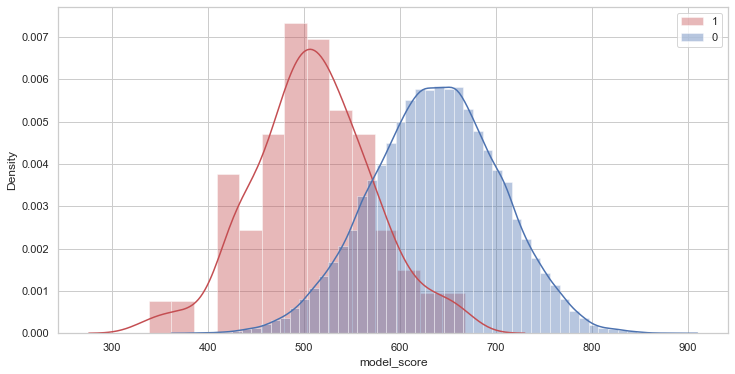

In [68]:
sns.distplot(df_wb_result[df_wb_result["data_role"].notna()].query("flag==1")["model_score"], label=1, color="r")
sns.distplot(df_wb_result[df_wb_result["data_role"].notna()].query("flag==0")["model_score"], label=0, color="b")
# sns.distplot(df_wb_result.query("flag==1")["model_score"], label=1, color="r")
# sns.distplot(df_wb_result.query("flag==0")["model_score"], label=0, color="b")
plt.legend()

In [69]:
# # all
# ks, crossdens = func_calc_ks_cross(
#     y_labels=df_wb_result[df_wb_result["flag"].notna()]["flag"].apply(lambda s0: ("0_good" if s0==0 else "1_bad")),
#     y_pred=df_wb_result[df_wb_result["flag"].notna()]["model_prob"],
#     plot=True,
# )
# print(ks)

# _auc = func_calc_auc_roc(
#     y_labels=df_wb_result[df_wb_result["flag"].notna()]["flag"],
#     y_pred=df_wb_result[df_wb_result["flag"].notna()]["model_prob"],
#     plot=True,
# )
# print(_auc)

In [70]:
# # train
# df_train_result = df_wb_result.query("data_role in ['01_train']") \
#     .reset_index(drop=True)
# df_train_result["predict"] = df_train_result["model_prob"]

# # train
# ks, crossdens = func_calc_ks_cross(
#     y_labels=df_train_result["flag"].apply(lambda s0: ("0_good" if s0==0 else "1_bad")),
#     y_pred=df_train_result["predict"],
#     plot=True,
# )
# print(ks)

# auc = func_calc_auc_roc(
#     y_labels=df_train_result["flag"],
#     y_pred=df_train_result["predict"],
#     plot=True,
# )
# print(auc)

# # test
# df_test_result = df_wb_result.query("data_role in ['02_test']") \
#     .reset_index(drop=True)
# df_test_result["predict"] = df_test_result["model_prob"]

# # test
# ks, crossdens = func_calc_ks_cross(
#     y_labels=df_test_result["flag"].apply(lambda s0: ("0_good" if s0==0 else "1_bad")),
#     y_pred=df_test_result["predict"],
#     plot=True,
# )
# print(ks)

# auc = func_calc_auc_roc(
#     y_labels=df_test_result["flag"],
#     y_pred=df_test_result["predict"],
#     plot=True,
# )
# print(auc)

# # oot
# df_oot_result = df_wb_result.query("data_role in ['03_oot']") \
#     .reset_index(drop=True)
# df_oot_result = df_wb_result[-df_wb_result["companycode"].isin(df_wb_result.query("data_role in ['01_train', '02_test']")["companycode"].unique())].query("data_role in ['03_oot']") \
#     .reset_index(drop=True)
# df_oot_result["predict"] = df_oot_result["model_prob"]

# # oot
# ks, crossdens = func_calc_ks_cross(
#     y_labels=df_oot_result["flag"].apply(lambda s0: ("0_good" if s0==0 else "1_bad")),
#     y_pred=df_oot_result["predict"],
#     plot=True,
# )
# print(ks)

# auc = func_calc_auc_roc(
#     y_labels=df_oot_result["flag"],
#     y_pred=df_oot_result["predict"],
#     plot=True,
# )
# print(auc)


# # # lift
# # crosstab = func_calc_lift(
# #     y_labels=pd.concat([df_train_result, df_test_result, df_oot_result], ignore_index=True)["flag"],
# #     y_pred=pd.concat([df_train_result, df_test_result, df_oot_result], ignore_index=True)["predict"],
# #     bucket_cnt=20, bad_label=1, plot=True,
# # )

# # crosstab.to_clipboard(index=False)
# # crosstab

# # # lift
# # crosstab = func_calc_lift(
# #     y_labels=pd.concat([df_oot_result], ignore_index=True)["flag"],
# #     y_pred=pd.concat([df_oot_result], ignore_index=True)["predict"],
# #     bucket_cnt=20, bad_label=1, plot=True,
# # )

# # crosstab.to_clipboard(index=False)
# # crosstab

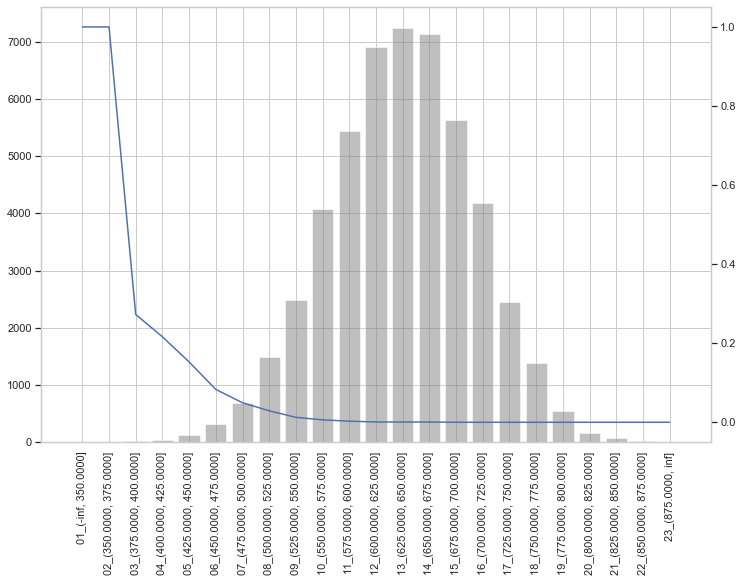

,0_good_#,1_bad_#,0_good_%,1_bad_%,WOE,IV,total,total_pct,bad_rate
"01_(-inf, 350.0000]",0,2,0.000000,0.008850,0.633904,5.609773e-03,2,0.000040,1.000000
"02_(350.0000, 375.0000]",0,3,0.000000,0.013274,0.844766,1.121371e-02,3,0.000060,1.000000
"03_(375.0000, 400.0000]",8,3,0.000159,0.013274,0.828953,1.087167e-02,11,0.000218,0.272727
"04_(400.0000, 425.0000]",29,8,0.000578,0.035398,1.456716,5.072350e-02,37,0.000734,0.216216
"05_(425.0000, 450.0000]",111,20,0.002212,0.088496,2.087629,1.801291e-01,131,0.002598,0.152672
"06_(450.0000, 475.0000]",287,26,0.005718,0.115044,2.073851,2.267260e-01,313,0.006208,0.083067
"07_(475.0000, 500.0000]",654,34,0.013030,0.150442,1.941128,2.667348e-01,688,0.013646,0.049419
"08_(500.0000, 525.0000]",1440,43,0.028690,0.190265,1.644052,2.656379e-01,1483,0.029415,0.028995
"09_(525.0000, 550.0000]",2450,31,0.048814,0.137168,0.917204,8.103918e-02,2481,0.049210,0.012495
"10_(550.0000, 575.0000]",4057,25,0.080831,0.110619,0.283638,8.449066e-03,4082,0.080965,0.006124


In [71]:
# _df = df_wb_result[df_wb_result["data_role"].isin(["01_train", "02_test"])] \
#     .reset_index(drop=True)
# _df = df_wb_result[df_wb_result["data_role"].isin(["03_oot"])] \
#     .reset_index(drop=True)
_df = df_wb_result[df_wb_result["data_role"].isin(["01_train", "02_test", "03_oot"])] \
    .reset_index(drop=True)

# # _bin = [-inf, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, inf]
# # _bin = [-inf]+list(range(350, 900, 50))+[inf]
# _bin = [-inf]+list(range(350, 900, 25))+[inf]

# _crosstab = func_woe_report_v1(
#     in_var=func_binning_continuous_v1(
#         in_data=_df["model_score"],
#         bins=_bin, right_border=True, include_lowest=True,
#     ),
#     in_target=_df["target_label"],
#     with_total=True, good_label_val="0_good", bad_label_val="1_bad", floating_point=0.01,
# )

_crosstab = func_woe_report_v1(
#     in_var=_df["model_score_bin_ew50"],
    in_var=_df["model_score_bin_ew25"],
#     in_var=_df["model_rating"],
#     in_var=_df["model_risk_desc"],
    in_target=_df["target_label"],
    with_total=True, good_label_val="0_good", bad_label_val="1_bad", floating_point=0.01,
)



func_plot_woe(_crosstab, plot_badrate=True)
_crosstab.to_clipboard()
_crosstab

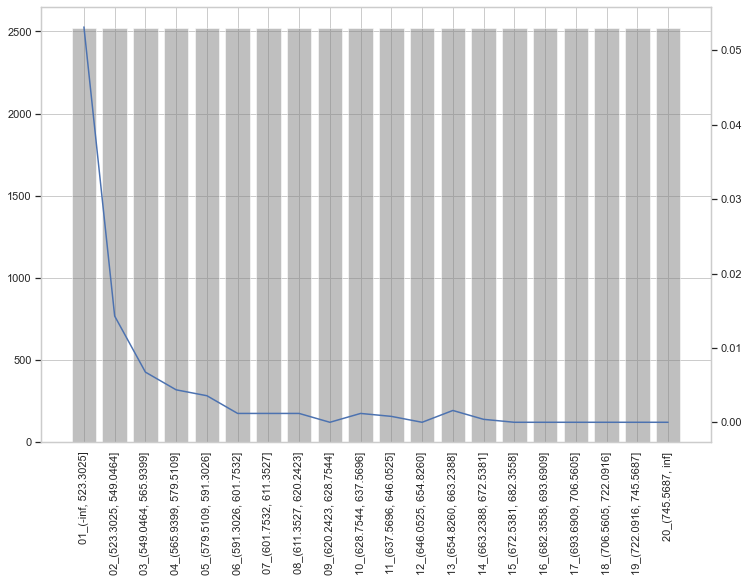

,0_good_#,1_bad_#,0_good_%,1_bad_%,WOE,IV,total,total_pct,bad_rate
"01_(-inf, 523.3025]",2387,134,0.047558,0.592920,2.348986,1.281048,2521,0.050003,0.053154
"02_(523.3025, 549.0464]",2485,36,0.049511,0.159292,1.045466,0.114773,2521,0.050003,0.014280
"03_(549.0464, 565.9399]",2504,17,0.049889,0.075221,0.352751,0.008936,2521,0.050003,0.006743
"04_(565.9399, 579.5109]",2510,11,0.050009,0.048673,-0.022522,0.000030,2521,0.050003,0.004363
"05_(579.5109, 591.3026]",2512,9,0.050049,0.039823,-0.186681,0.001909,2521,0.050003,0.003570
"06_(591.3026, 601.7532]",2517,3,0.050148,0.013274,-0.949464,0.035011,2520,0.049983,0.001190
"07_(601.7532, 611.3527]",2518,3,0.050168,0.013274,-0.949795,0.035042,2521,0.050003,0.001190
"08_(611.3527, 620.2423]",2518,3,0.050168,0.013274,-0.949795,0.035042,2521,0.050003,0.001190
"09_(620.2423, 628.7544]",2521,0,0.050228,0.000000,-1.795554,0.090187,2521,0.050003,0.000000
"10_(628.7544, 637.5696]",2518,3,0.050168,0.013274,-0.949795,0.035042,2521,0.050003,0.001190


In [72]:
# _df = df_wb_result[df_wb_result["data_role"].isin(["01_train", "02_test"])] \
#     .reset_index(drop=True)
# _df = df_wb_result[df_wb_result["data_role"].isin(["03_oot"])] \
#     .reset_index(drop=True)
_df = df_wb_result[df_wb_result["data_role"].isin(["01_train", "02_test", "03_oot"])] \
    .reset_index(drop=True)

_crosstab = func_woe_report_v1(
    in_var=func_auto_binning_continuous_v1(
        in_var=_df["model_score"],
        in_target=_df["target_label"],
#         min_pct=0.01, max_bins_cnt=21,
        min_pct=0.01, max_bins_cnt=20,
        right_border=True, include_lowest=True,
#         method="02_decision_tree",
        method="01_equal_freq",
#         method="03_best_ks",
    )[0],
    in_target=_df["target_label"],
    with_total=True, good_label_val="0_good", bad_label_val="1_bad", floating_point=0.01,
)

func_plot_woe(_crosstab, plot_badrate=True)
_crosstab.to_clipboard()
_crosstab

In [73]:
# df_wb_result \
#     [df_wb_result["companycode"].isin(df_wb_result.query("flag_obs_aft==1")["companycode"].unique())] \
#     [
#         [
#             "data_role", "model_score_bin_ew25", "model_score_bin_ew50", "model_rating", "model_risk_desc", "model_score", "model_prob",
#             "companycode", "issuer", "observation_dt", "observation_dt_YM", "obs_data_type", "obs_data_type_ms",
#             "busi_date", "totalsize",
#             "flag_obs_bef", "flag_obs_aft", "flag_obs_aft06m", "list_defaultdate_aft", "flag", "target_label",
#         ]+
#         model_cols_0+
#         [
#             "model_trans_binning", "model_trans_score",
#             "sc01_qyjbsx", "sc02_qyfzxw", "sc03_qydfxw", "sc04_cznl", "sc05_yyyylnl", "sc06_zczl", "sc07_jywdx",
#         ]
#     ] \
#     .to_clipboard(index=False)

# df_wb_result \
#     [-df_wb_result["companycode"].isin(df_wb_result.query("flag_obs_aft==1")["companycode"].unique())] \
#     [
#         [
#             "data_role", "model_score_bin_ew25", "model_score_bin_ew50", "model_rating", "model_risk_desc", "model_score", "model_prob",
#             "companycode", "issuer", "observation_dt", "observation_dt_YM", "obs_data_type", "obs_data_type_ms",
#             "busi_date", "totalsize",
#             "flag_obs_bef", "flag_obs_aft", "flag_obs_aft06m", "list_defaultdate_aft", "flag", "target_label",
#         ]+
#         model_cols_0+
#         [
#             "model_trans_binning", "model_trans_score",
#             "sc01_qyjbsx", "sc02_qyfzxw", "sc03_qydfxw", "sc04_cznl", "sc05_yyyylnl", "sc06_zczl", "sc07_jywdx",
#         ]
#     ] \
#     .to_clipboard(index=False)

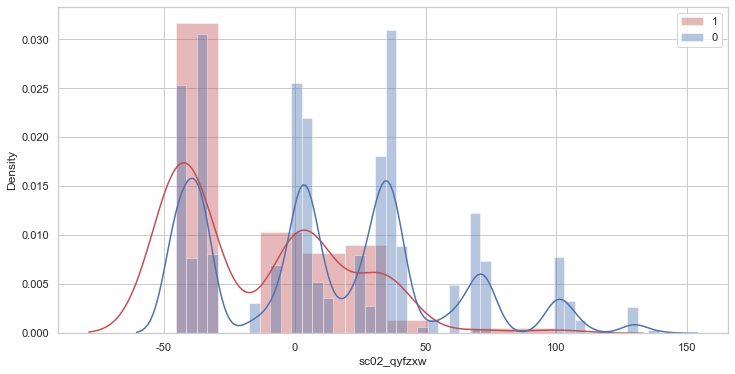

In [116]:
sns.distplot(df_wb_result[df_wb_result["data_role"].notna()].query("flag==1")["sc02_qyfzxw"], label=1, color="r")
sns.distplot(df_wb_result[df_wb_result["data_role"].notna()].query("flag==0")["sc02_qyfzxw"], label=0, color="b")
# sns.distplot(df_wb_result.query("flag==1")["model_score"], label=1, color="r")
# sns.distplot(df_wb_result.query("flag==0")["model_score"], label=0, color="b")
plt.legend()

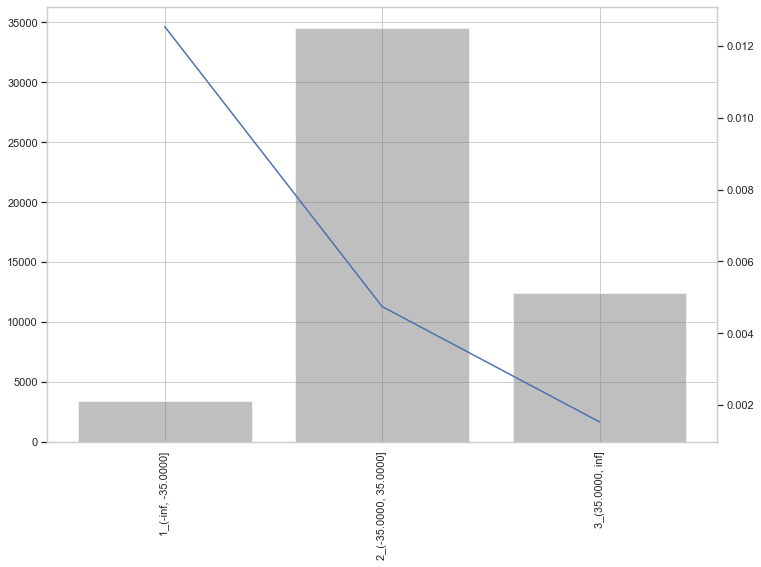

,0_good_#,1_bad_#,0_good_%,1_bad_%,WOE,IV,total,total_pct,bad_rate
"1_(-inf, -35.0000]",3387,43,0.067482,0.190265,0.949595,0.116594,3430,0.068033,0.012536
"2_(-35.0000, 35.0000]",34416,164,0.685701,0.725664,0.055854,0.002232,34580,0.685880,0.004743
"3_(35.0000, inf]",12388,19,0.246817,0.084071,-1.004317,0.163449,12407,0.246088,0.001531
total,50191,226,1.000000,1.000000,NaN,0.282275,50417,1.000000,0.004483


In [128]:
# _df = df_wb_result[df_wb_result["data_role"].isin(["01_train", "02_test"])] \
#     .reset_index(drop=True)
# _df = df_wb_result[df_wb_result["data_role"].isin(["03_oot"])] \
#     .reset_index(drop=True)
_df = df_wb_result[df_wb_result["data_role"].isin(["01_train", "02_test", "03_oot"])] \
    .reset_index(drop=True)

_crosstab = func_woe_report_v1(
    in_var=func_binning_continuous_v1(
        in_data=_df["sc07_jywdx"],
        bins=[-inf, -35, 35, inf],
    ),
    in_target=_df["target_label"],
    with_total=True, good_label_val="0_good", bad_label_val="1_bad", floating_point=0.01,
)

func_plot_woe(_crosstab, plot_badrate=True)
_crosstab.to_clipboard()
_crosstab

## 模型稳定性

In [74]:
# df_wb_result.groupby(by=["obs_data_type", "obs_data_type_ms", "observation_dt_YR"]).apply(
#         lambda s0: pd.Series(OrderedDict({
#             "cnt": s0.shape[0],
#             "company_cnt": s0["companycode"].unique().shape[0],
#             "obs_YM_avg": s0["observation_dt_YM"].apply(lambda t: float(t.split("-")[1])).mean()
#         }))
#     ).reset_index() \
#     .sort_values(by=["obs_data_type", "obs_data_type_ms", "observation_dt_YR"], ascending=[True, True, True])

### 时间维度（评分50等距）PSI

In [75]:
#########################################################################
_df = df_wb_result \
    .query("data_role in ['01_train', '02_test', '03_oot']") \
    .query("obs_data_type=='02_财报更新'") \
    .query("lst_yq_enddate==busi_date") \
    .sort_values(by=["companycode", "obs_data_type_ms", "lst_yq_enddate", "busi_date"], ascending=[True, False, False, False]) \
    .drop_duplicates(subset=["companycode", "obs_data_type_ms", "lst_yq_enddate"], keep="first") \
    .sort_values(by=["companycode", "observation_dt"], ascending=[True, False]) \
    [[
        "companycode", "observation_dt", "observation_dt_YR", "model_score", "model_prob", "model_score_bin_ew25", "model_score_bin_ew50", "model_rating", "model_risk_desc",
        "obs_data_type", "obs_data_type_ms",
        "busi_date", "lst_mon", "lst_yq_enddate",
    ]] \
    .reset_index(drop=True)


In [76]:
# ####################################################
# _t = pd.crosstab(
#     index=_df["model_score_bin_ew25"],
#     columns=_df["lst_yq_enddate"],
# )
# _t.to_clipboard()
# _t

# ####################################################
# _t = pd.crosstab(
#     index=_df["model_rating"],
#     columns=_df["lst_yq_enddate"],
# )
# _t.to_clipboard()
# _t

####################################################
_t = pd.crosstab(
    index=_df["model_risk_desc"],
    columns=_df["lst_yq_enddate"],
)
_t.to_clipboard()
_t


lst_yq_enddate,2013-09-30,2013-12-31,2014-03-31,2014-06-30,2014-09-30,2014-12-31,2015-03-31,2015-06-30,2015-09-30,2015-12-31,2016-03-31,2016-06-30,2016-09-30,2016-12-31,2017-03-31,2017-06-30,2017-09-30,2017-12-31,2018-03-31,2018-06-30,2018-09-30,2018-12-31,2019-03-31,2019-06-30,2019-09-30,2019-12-31,2020-03-31,2020-06-30,2020-09-30
model_risk_desc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1_低风险,2,80,253,358,337,115,257,324,333,139,270,309,284,142,198,262,236,150,216,295,245,174,256,368,292,180,282,438,271
2_中低风险,6,105,349,373,374,211,387,451,419,217,375,498,372,231,360,492,361,276,306,468,350,258,306,471,374,248,368,531,319
3_中风险,7,129,402,370,364,200,397,451,416,247,438,502,450,292,478,566,396,316,399,556,393,306,385,547,386,285,372,560,381
4_中高风险,4,73,230,250,244,134,299,312,276,151,302,338,285,189,307,404,301,237,306,410,279,237,276,368,256,191,252,351,257
5_高风险,0,40,125,118,116,54,126,130,122,88,161,177,149,103,166,203,162,123,199,264,206,150,181,267,151,101,148,204,155


In [77]:
_df_n1 = pd.merge(
    left=_df,
    right=_df \
        [["companycode", "observation_dt", "model_score", "model_score_bin_ew25", "model_score_bin_ew50", "model_rating", "model_risk_desc", "lst_yq_enddate"]] \
        .rename(columns={
            "observation_dt": "lag_observation_dt",
            "model_score": "lag_model_score",
            "model_score_bin_ew25": "lag_model_score_bin_ew25",
            "model_score_bin_ew50": "lag_model_score_bin_ew50",
            "model_rating": "lag_model_rating",
            "model_risk_desc": "lag_model_risk_desc",
            "lst_yq_enddate": "lag_lst_yq_enddate",
        }),
    how="left", left_on=["companycode"], right_on=["companycode"],
) \
    .query("observation_dt<lag_observation_dt") \
    .sort_values(by=["companycode", "observation_dt", "lag_observation_dt"], ascending=[True, False, False]) \
    .reset_index(drop=True)

_df_n1["lag_obs_mon_diff"] = _df_n1.apply(
    lambda s0: (
        np.NaN if pd.isna(s0["lag_observation_dt"]) else
        12*(int(s0["lag_observation_dt"][0:4])-int(s0["observation_dt"][0:4]))+(int(s0["lag_observation_dt"][5:7])-int(s0["observation_dt"][5:7]))
    ), axis=1,
)
_df_n1["lag_yq_mon_diff"] = _df_n1.apply(
    lambda s0: (
        np.NaN if pd.isna(s0["lag_observation_dt"]) else
        12*(int(s0["lag_lst_yq_enddate"][0:4])-int(s0["lst_yq_enddate"][0:4]))+(int(s0["lag_lst_yq_enddate"][5:7])-int(s0["lst_yq_enddate"][5:7]))
    ), axis=1,
)


In [78]:
####################################################
_t = pd.crosstab(
#     index=_df_n1.query("lag_yq_mon_diff in [3]")["model_risk_desc"],
    index=_df_n1.query("lag_yq_mon_diff<=36")["model_risk_desc"],
#     columns=_df_n1.query("lag_yq_mon_diff in [3]")["lag_model_risk_desc"],
    columns=_df_n1.query("lag_yq_mon_diff<=36")["lag_model_risk_desc"],
)
_t.to_clipboard()
_t

# ####################################################
# _t = pd.crosstab(
# #     index=_df_n1.query("lag_yq_mon_diff in [3]")["model_rating"],
#     index=_df_n1.query("lag_yq_mon_diff<=36")["model_rating"],
# #     columns=_df_n1.query("lag_yq_mon_diff in [3]")["lag_model_rating"],
#     columns=_df_n1.query("lag_yq_mon_diff<=36")["lag_model_rating"],
# )
# _t.to_clipboard()
# _t

# ####################################################
# _t = pd.crosstab(
#     index=_df_n1.query("lag_yq_mon_diff in [3, 6]")["model_score_bin_ew25"],
#     columns=_df_n1.query("lag_yq_mon_diff in [3, 6]")["lag_model_score_bin_ew25"],
# )
# _t.to_clipboard()
# _t


lag_model_risk_desc,1_低风险,2_中低风险,3_中风险,4_中高风险,5_高风险
model_risk_desc,,,,,
1_低风险,19102,13716,8766,3100,769
2_中低风险,13197,20437,18050,8204,2627
3_中风险,7106,16255,23716,15309,6083
4_中高风险,1892,6166,13527,15502,9126
5_高风险,235,1168,3871,7263,10624


In [98]:
_df_n1 \
    .query("companycode==58") \
    .head(1000) \
    .sort_values(by=["companycode", "lag_observation_dt", "observation_dt"], ascending=[True, False, False]) \
    .groupby(by=["companycode", "lag_observation_dt", "lag_model_score", "lag_model_rating", "lag_lst_yq_enddate"]) \
    .apply(
        lambda s0: pd.Series(OrderedDict({
#             "l12m_observation_dt": s0.query("lag_yq_mon_diff<=12")["observation_dt"].tolist(),
            "l12m_model_rating": s0.query("lag_yq_mon_diff<=12")["model_rating"].tolist(),
            "l12m_lst_yq_enddate": s0.query("lag_yq_mon_diff<=12")["lst_yq_enddate"].tolist(),
            
#             "l24m_observation_dt": s0.query("lag_yq_mon_diff<=24")["observation_dt"].tolist(),
            "l24m_model_rating": s0.query("lag_yq_mon_diff<=24")["model_rating"].tolist(),
            "l24m_lst_yq_enddate": s0.query("lag_yq_mon_diff<=24")["lst_yq_enddate"].tolist(),
        }))
    )


l12m_model_rating  \
companycode lag_observation_dt lag_model_score lag_model_rating lag_lst_yq_enddate                                    
58.0        2016-03-25         599.865842      05_BB            2015-12-31                                  [08_CC]   
            2016-04-16         597.116278      05_BB            2016-03-31                           [05_BB, 08_CC]   
            2016-08-27         523.976269      07_CCC           2016-06-30                    [05_BB, 05_BB, 08_CC]   
            2016-10-31         523.976269      07_CCC           2016-09-30            [07_CCC, 05_BB, 05_BB, 08_CC]   
            2017-04-17         616.782454      04_BBB           2016-12-31           [07_CCC, 07_CCC, 05_BB, 05_BB]   
            2017-04-28         599.389656      05_BB            2017-03-31          [04_BBB, 07_CCC, 07_CCC, 05_BB]   
            2017-08-31         532.011121      07_CCC           2017-06-30          [05_BB, 04_BBB, 07_CCC, 07_CCC]   
            2017-10-31         497.159355      08_CC            2017-09-30          [07_CCC, 05_BB, 04_BBB, 07_CCC]   

                                                                                                                 l12m_lst_yq_enddate  \
companycode lag_observation_dt lag_model_score lag_model_rating lag_lst_yq_enddate                                                     
58.0        2016-03-25         599.865842      05_BB            2015-12-31                                              [2015-09-30]   
            2016-04-16         597.116278      05_BB            2016-03-31                                  [2015-12-31, 2015-09-30]   
            2016-08-27         523.976269      07_CCC           2016-06-30                      [2016-03-31, 2015-12-31, 2015-09-30]   
            2016-10-31         523.976269      07_CCC           2016-09-30          [2016-06-30, 2016-03-31, 2015-12-31, 2015-09-30]   
            2017-04-17         616.782454      04_BBB           2016-12-31          [2016-09-30, 2016-06-30, 2016-03-31, 2015-12-31]   
            2017-04-28         599.389656      05_BB            2017-03-31          [2016-12-31, 2016-09-30, 2016-06-30, 2016-03-31]   
            2017-08-31         532.011121      07_CCC           2017-06-30          [2017-03-31, 2016-12-31, 2016-09-30, 2016-06-30]   
            2017-10-31         497.159355      08_CC            2017-09-30          [2017-06-30, 2017-03-31, 2016-12-31, 2016-09-30]   

                                                                                                                    l24m_model_rating  \
companycode lag_observation_dt lag_model_score lag_model_rating lag_lst_yq_enddate                                                      
58.0        2016-03-25         599.865842      05_BB            2015-12-31                                                    [08_CC]   
            2016-04-16         597.116278      05_BB            2016-03-31                                             [05_BB, 08_CC]   
            2016-08-27         523.976269      07_CCC           2016-06-30                                      [05_BB, 05_BB, 08_CC]   
            2016-10-31         523.976269      07_CCC           2016-09-30                              [07_CCC, 05_BB, 05_BB, 08_CC]   
            2017-04-17         616.782454      04_BBB           2016-12-31                      [07_CCC, 07_CCC, 05_BB, 05_BB, 08_CC]   
            2017-04-28         599.389656      05_BB            2017-03-31              [04_BBB, 07_CCC, 07_CCC, 05_BB, 05_BB, 08_CC]   
            2017-08-31         532.011121      07_CCC           2017-06-30          [05_BB, 04_BBB, 07_CCC, 07_CCC, 05_BB, 05_BB, ...   
            2017-10-31         497.159355      08_CC            2017-09-30          [07_CCC, 05_BB, 04_BBB, 07_CCC, 07_CCC, 05_BB,...   

                                                                                                                  l24m_lst_yq_enddate  
companycode lag_observation_dt lag_mode